In [2]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import sys
import pandas as pd
sys.path.insert(0, str(Path.cwd().parent))

In [3]:
def repo_root_from_cwd() -> Path:
    p = Path.cwd().resolve()
    for q in (p, *p.parents):
        if (q / ".git").exists():          # best if present
            return q
        if (q / "pyproject.toml").exists(): # also good
            return q
        if (q / "dreamingnetz").is_dir():   # if that's your package dir
            return q
    raise RuntimeError("Could not locate repo root")

ROOT = repo_root_from_cwd()

In [4]:
# notebook cell 1: import your loader
from dreamingnetz.data_extraction import f

# notebook cell 2: import the plotting utilities (wherever you saved them)
from dreamingnetz.viz import (
    plot_mabs_heatmap,
    plot_Pq_stacked,
    analyze_q_binder,
    plot_q_binder,
    plot_pt_graph_avg_acceptance,
    magnetization_report,
)

from dreamingnetz.viz import (
    plot_m_summary_vs_T,
    plot_winner_entropy_vs_T,
    plot_switching_rates_vs_T,
    plot_mmax_time_T_heatmap,
    plot_mmax_stacked_hist,
    plot_joint_mmax_q,
    plot_joint_mmax_E,
    analyze_mmax_across_disorders,
    plot_mmax_across_disorders,
    plot_mmax_timeseries_at_k,
    plot_mmax_hist_at_k,
)


In [5]:

run_root_1d = str((ROOT / "runs" / "prova2_edge_off_alpha04_N500_pool").resolve())
run_root_2d = str((ROOT / "runs" / "prova2_alpha04_N500_pool").resolve())



In [6]:
run_root = run_root_2d

In [7]:
from dreamingnetz.data_extraction import f
from dreamingnetz.viz import plot_mmax_stacked_hist_compare_two_t_two_windows_single_rid


In [8]:
meta=f(run_root,'meta')

In [9]:
t_grid=meta[0].t_grid

In [ ]:
meta[0].edge_list

Meta(rdir=PosixPath('/home/blazek_137/unipd/PMLS_project/runs/prova2_alpha04_N500_pool/r000'), N=500, P=20, R=111, B=5, t_grid=array([0.  , 0.05, 0.11, 0.25, 0.5 ]), K=array([22, 23, 22, 23, 21]), k_start=array([  0,  22,  45,  67,  90, 111]), beta=array([0.3       , 0.54974517, 0.71991007, 0.82833864, 0.90777413,
       0.9851304 , 1.07186136, 1.16647763, 1.27065368, 1.38529876,
       1.50658091, 1.62776911, 1.74193738, 1.85242053, 1.96490577,
       2.0759564 , 2.2086235 , 2.35497208, 2.65285331, 3.00387592,
       3.98504971, 9.        , 0.3       , 0.53107218, 0.67396977,
       0.78622283, 0.86790551, 0.94020074, 1.02132491, 1.10352596,
       1.19341991, 1.29109515, 1.39786059, 1.51225978, 1.61794545,
       1.70989189, 1.79999121, 1.87892272, 1.95785424, 2.14677262,
       2.41987827, 2.73936368, 3.38183549, 4.27993007, 9.        ,
       0.3       , 0.53214703, 0.70114086, 0.78152826, 0.85434951,
       0.9436432 , 1.0271018 , 1.11612213, 1.21142491, 1.31260261,
       1.42265

/home/blazek_137/unipd/PMLS_project/dreamingnetz/viz.py:2079: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(


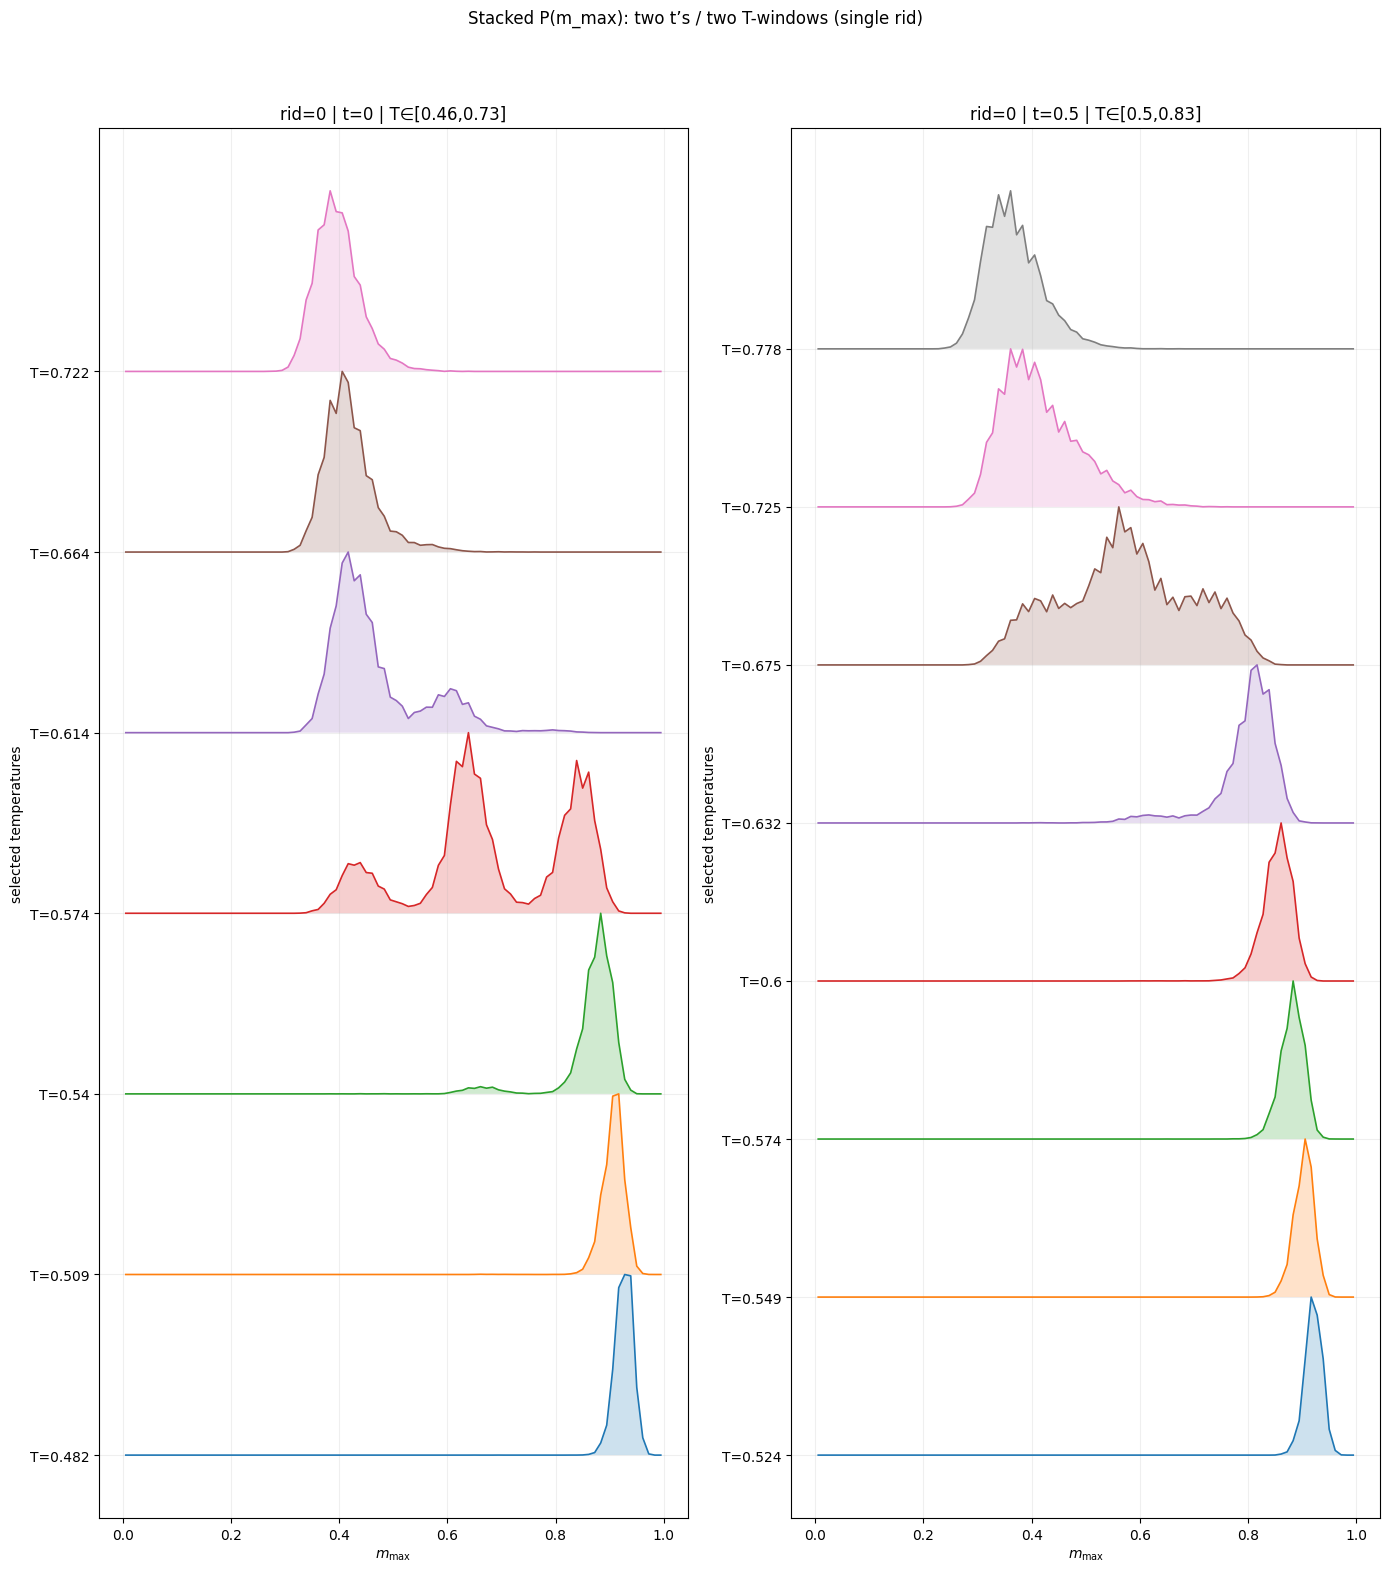

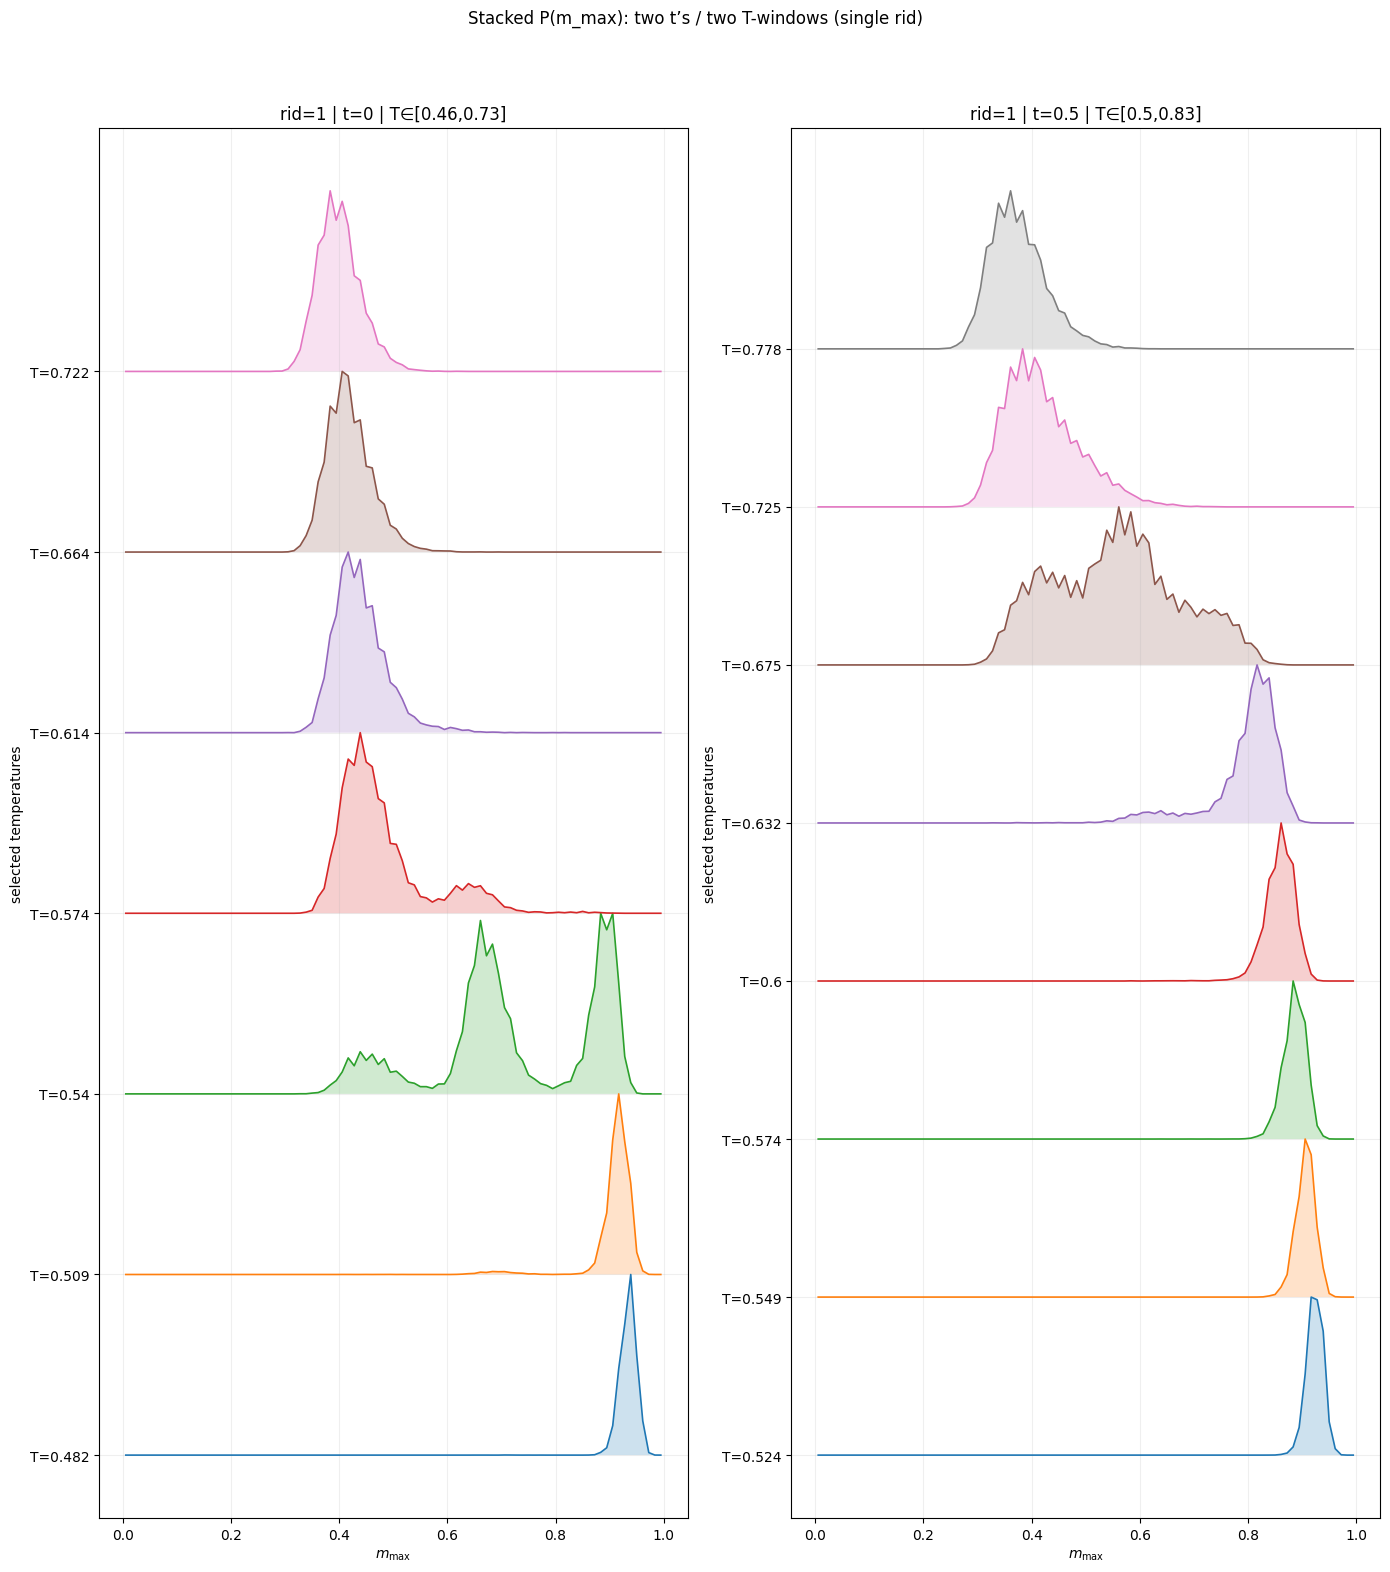

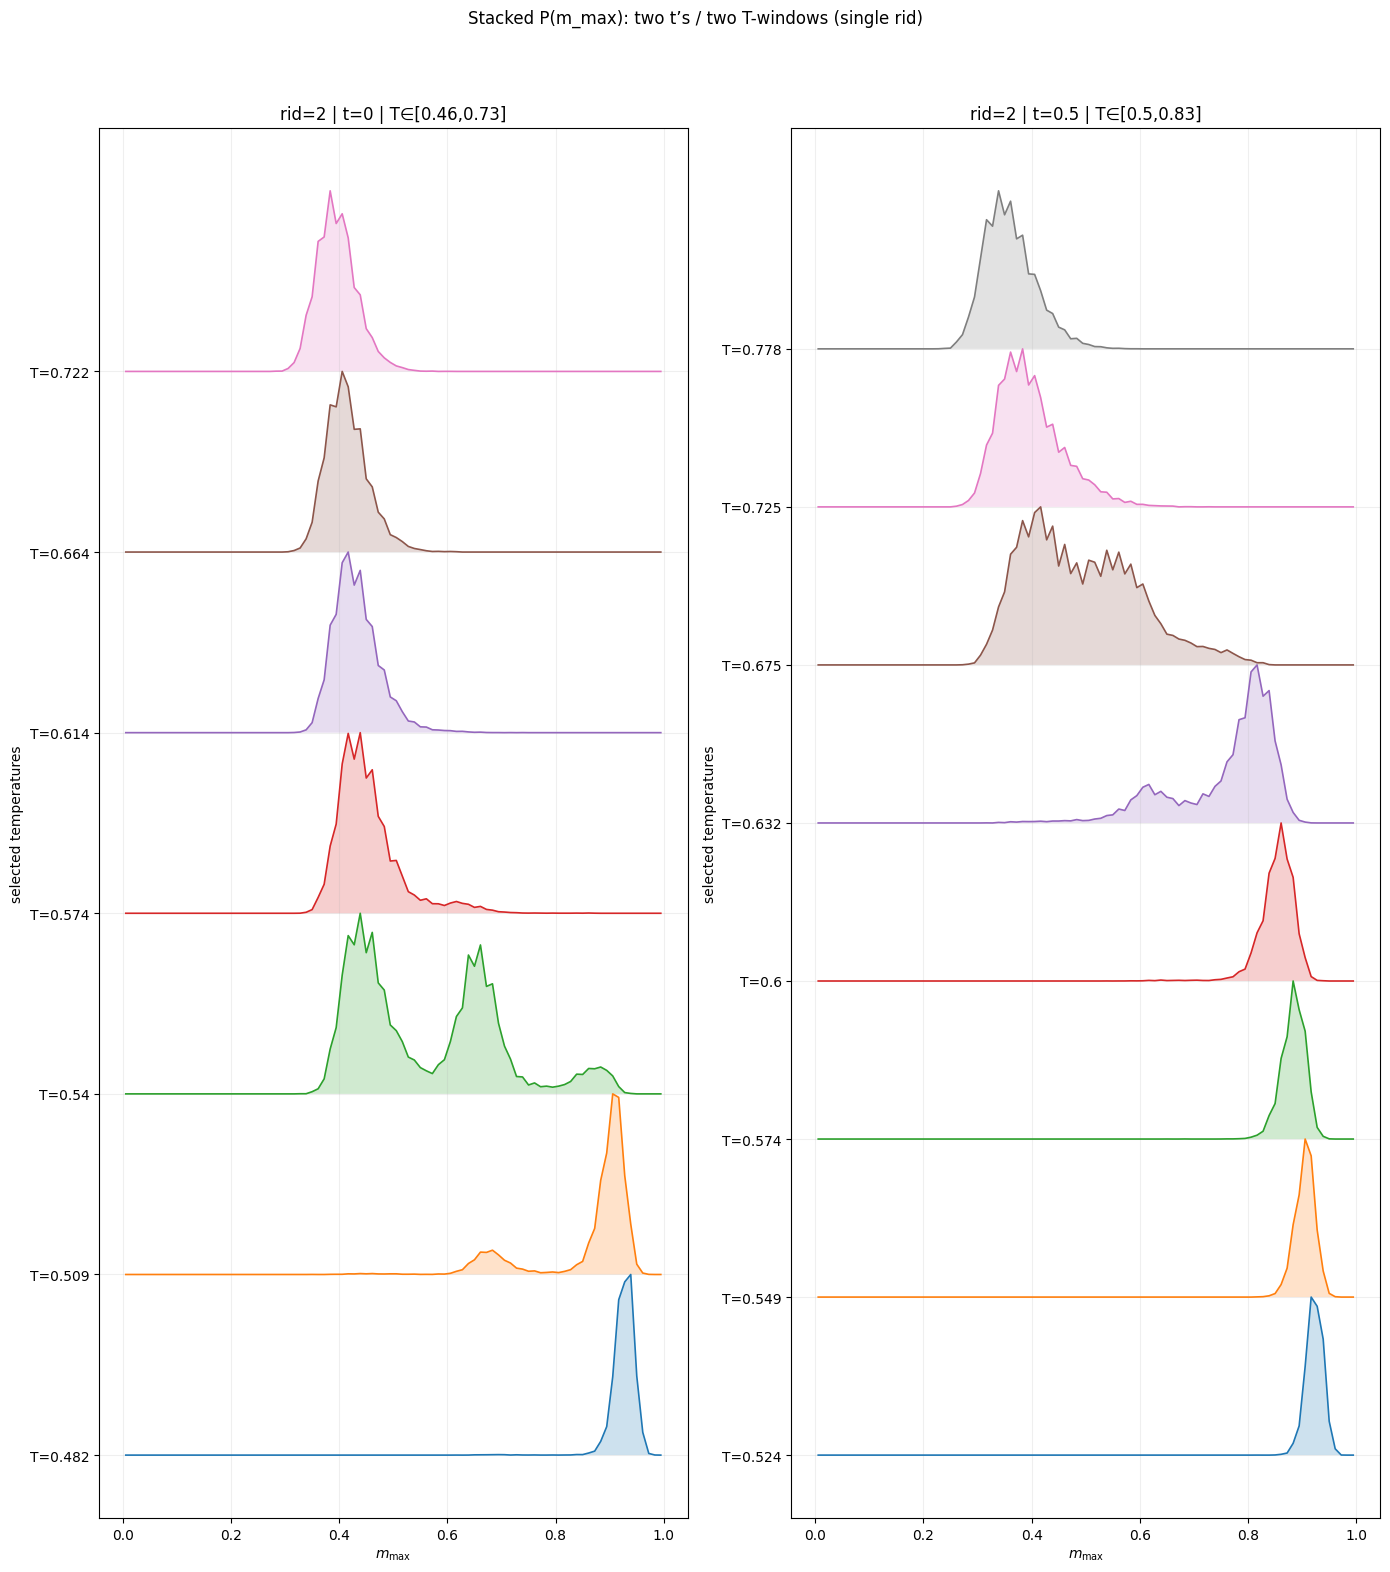

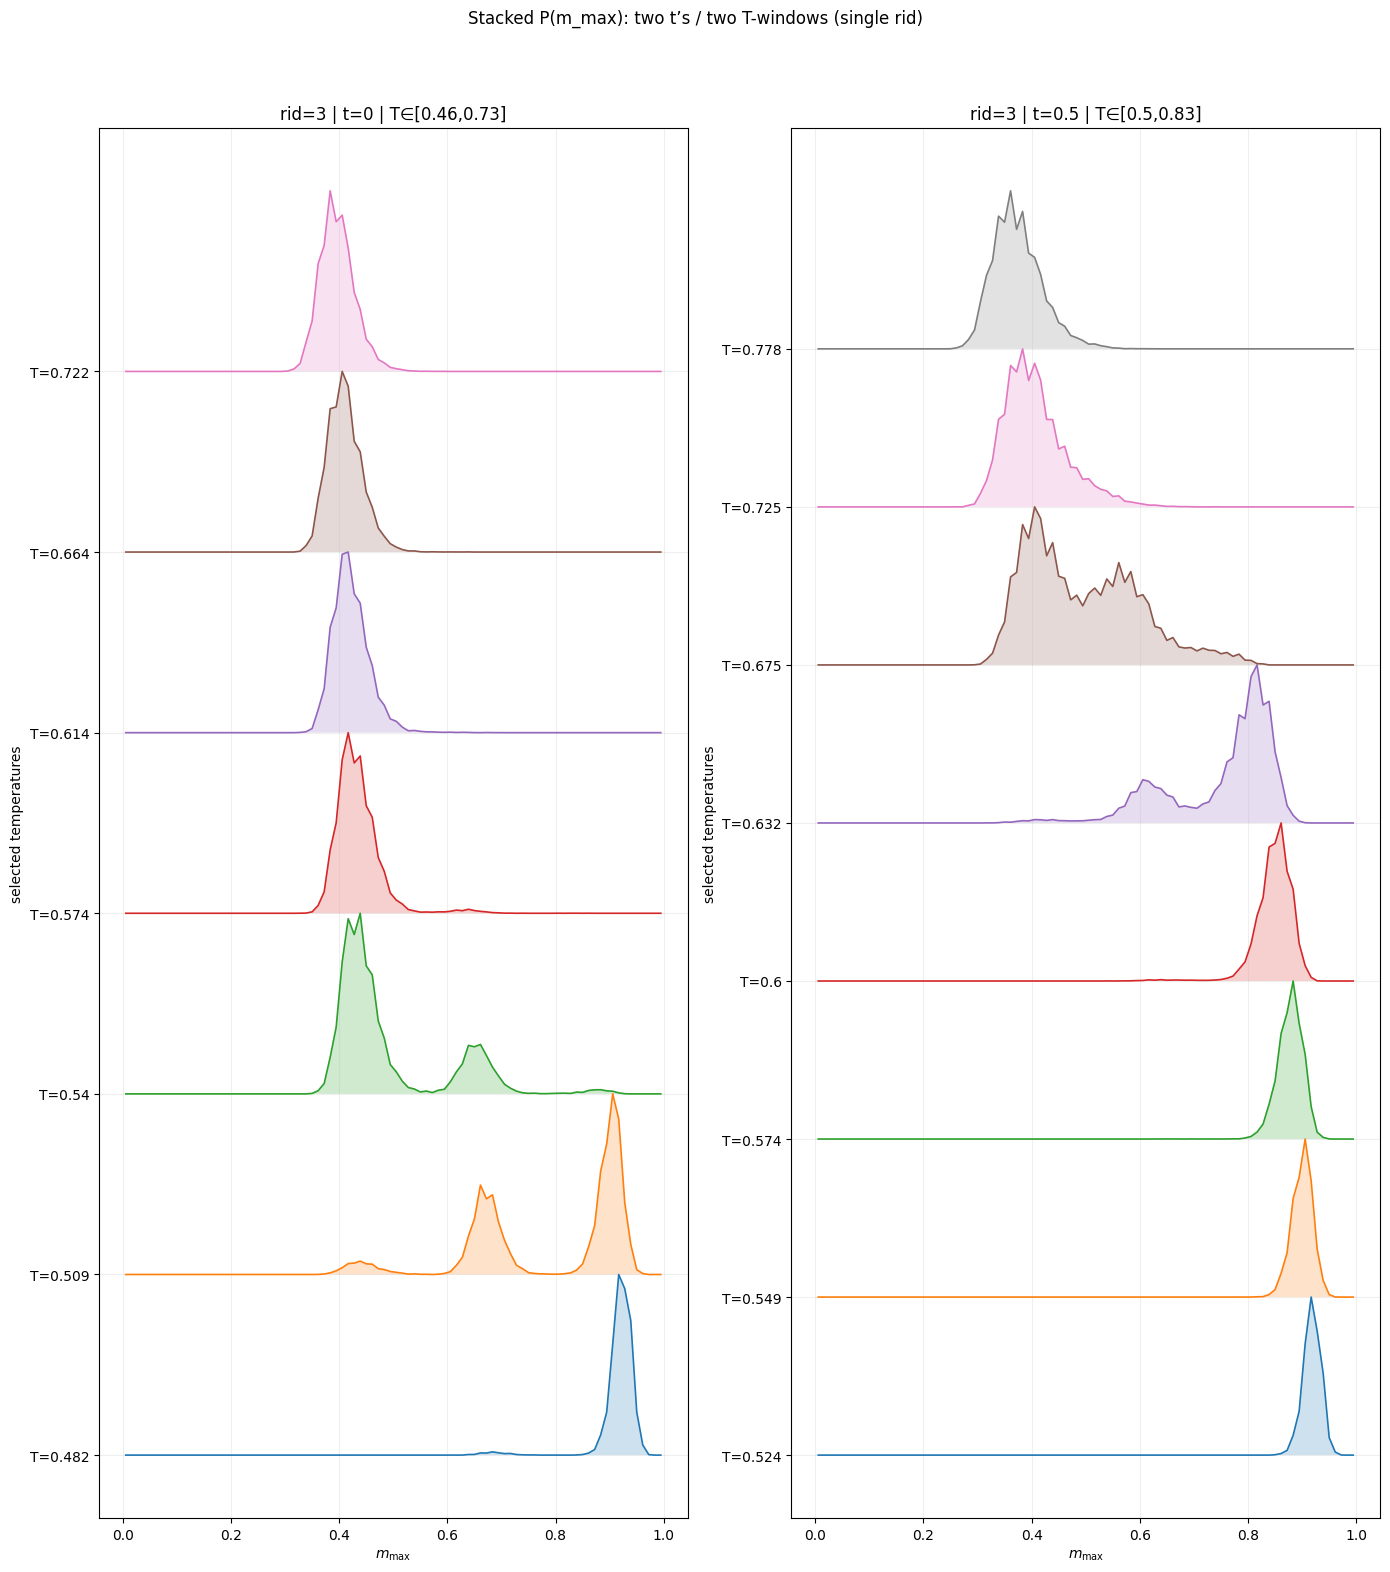

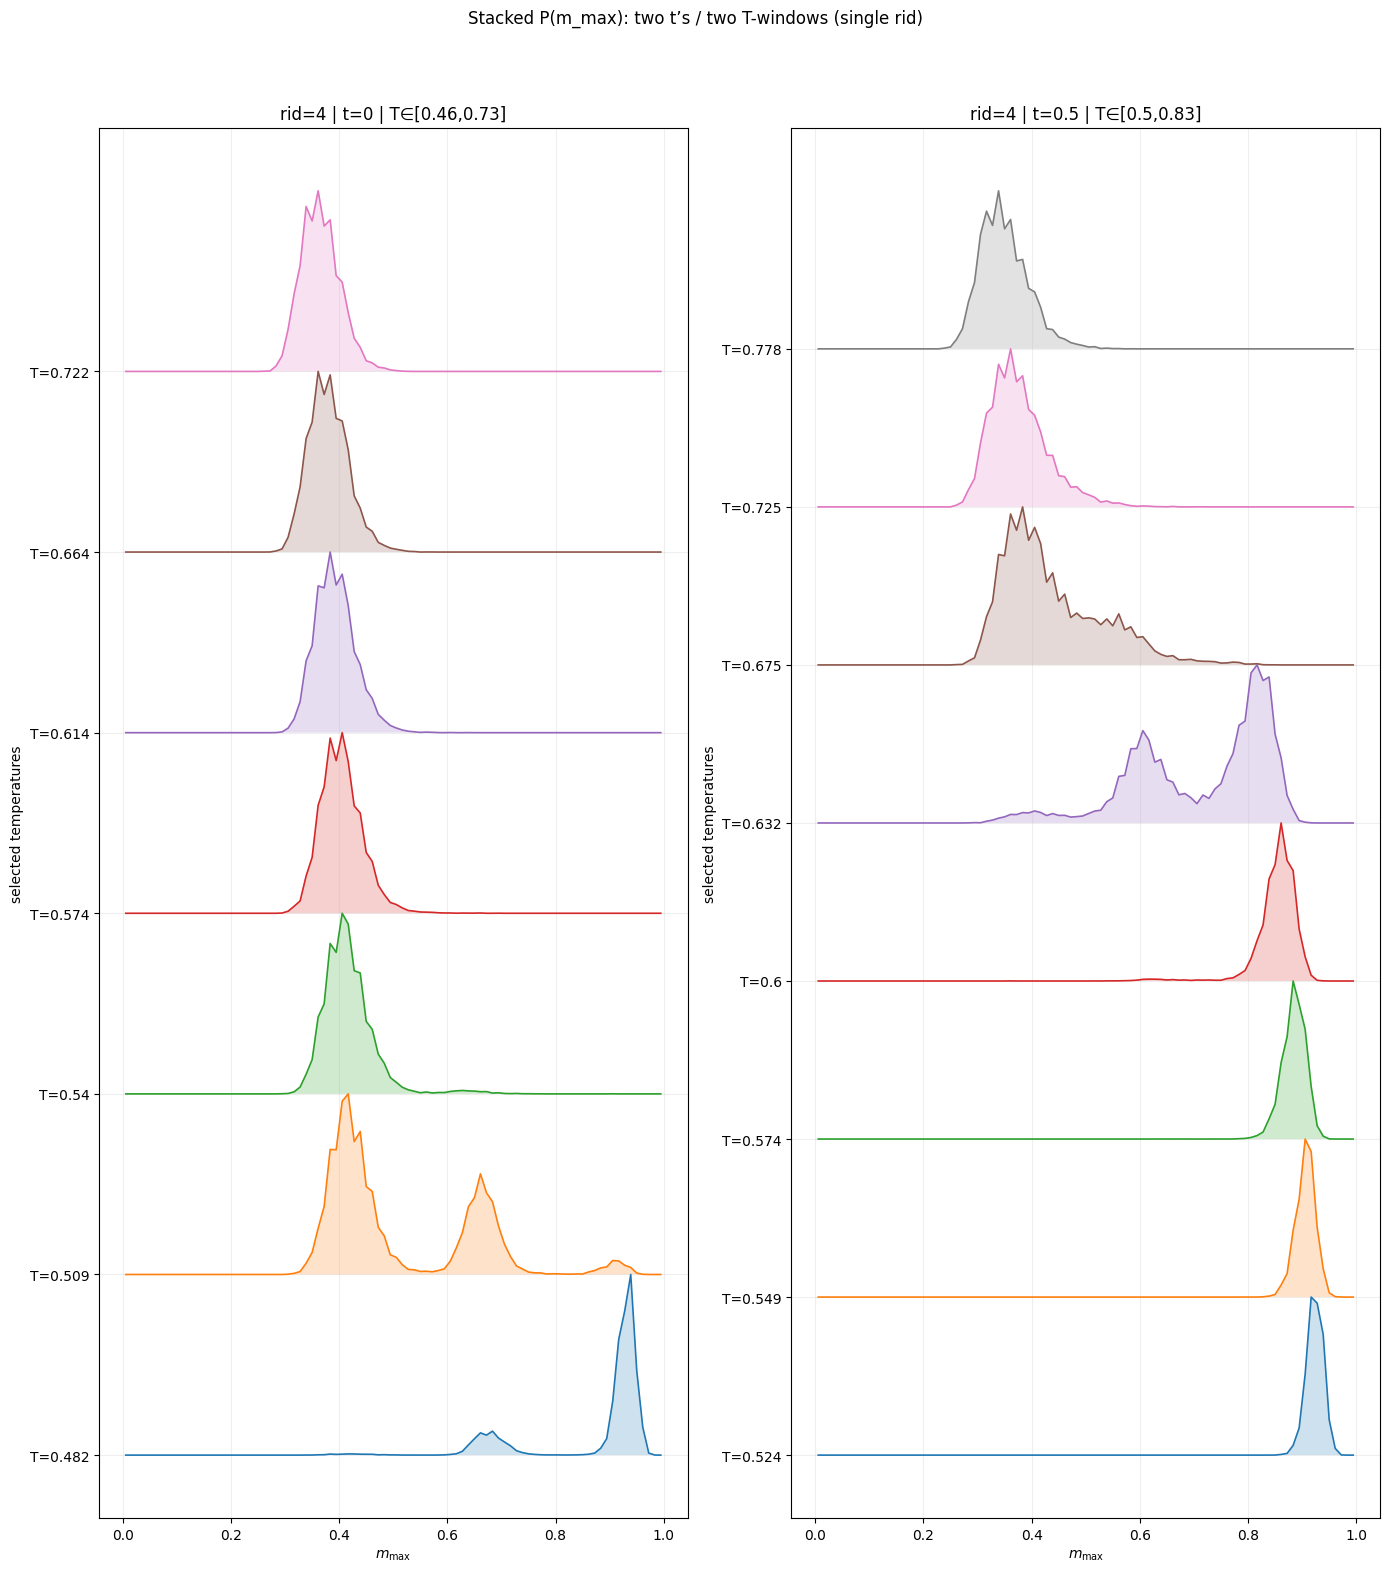

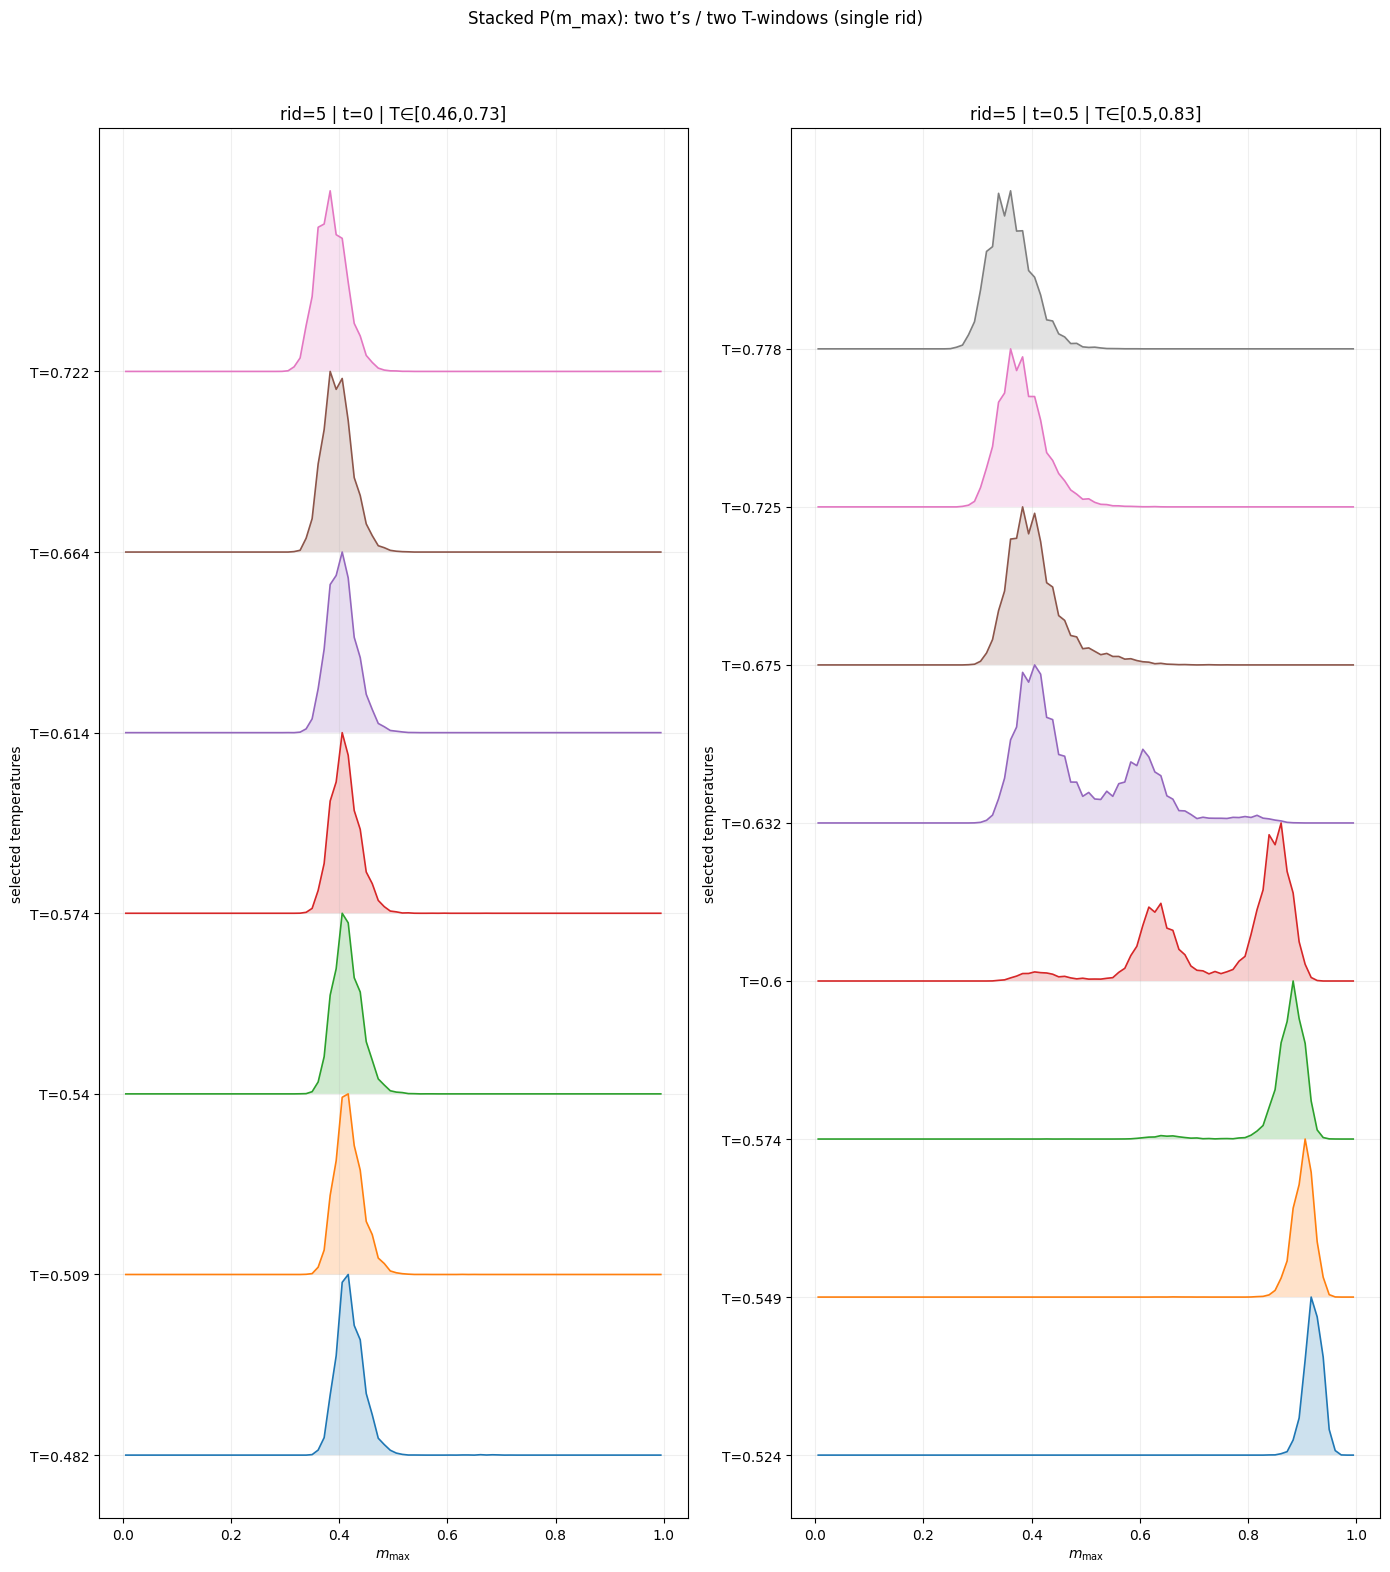

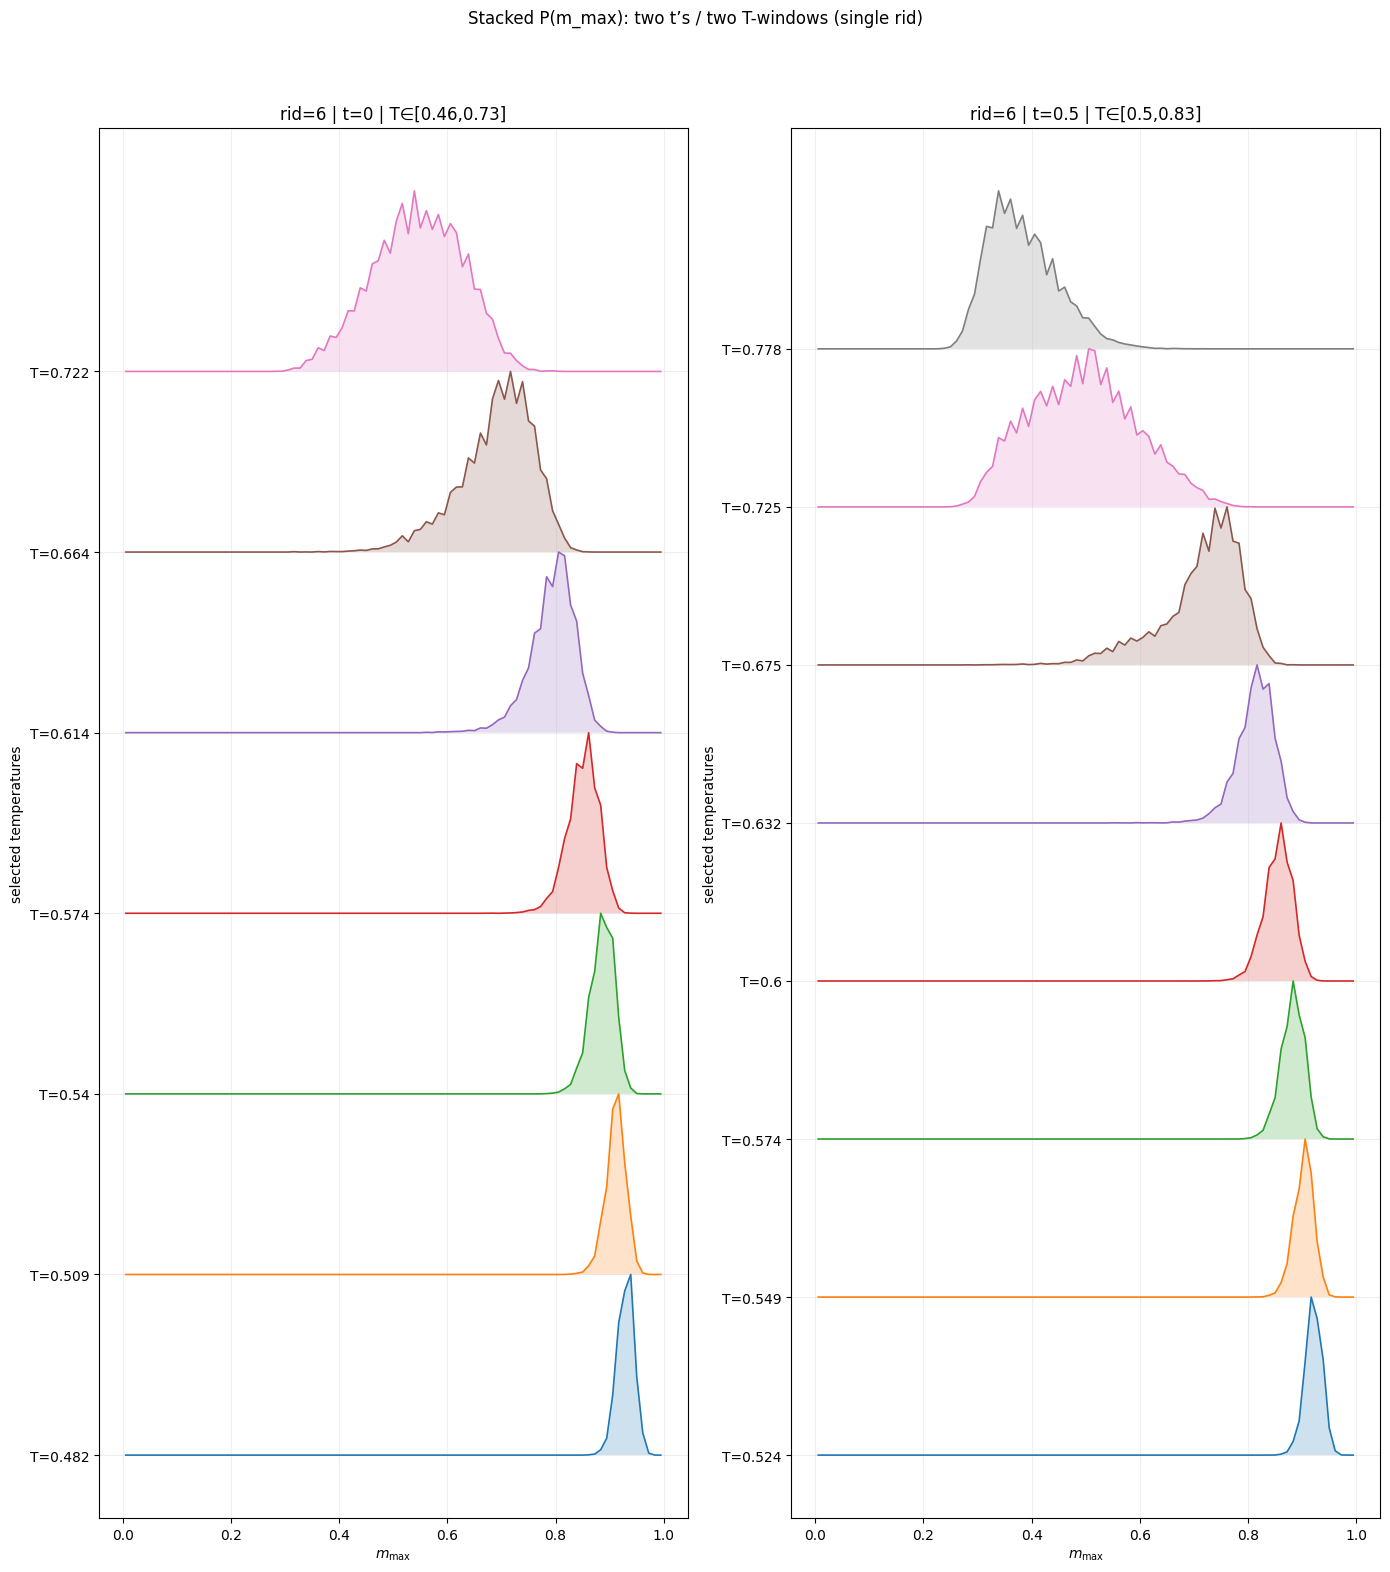

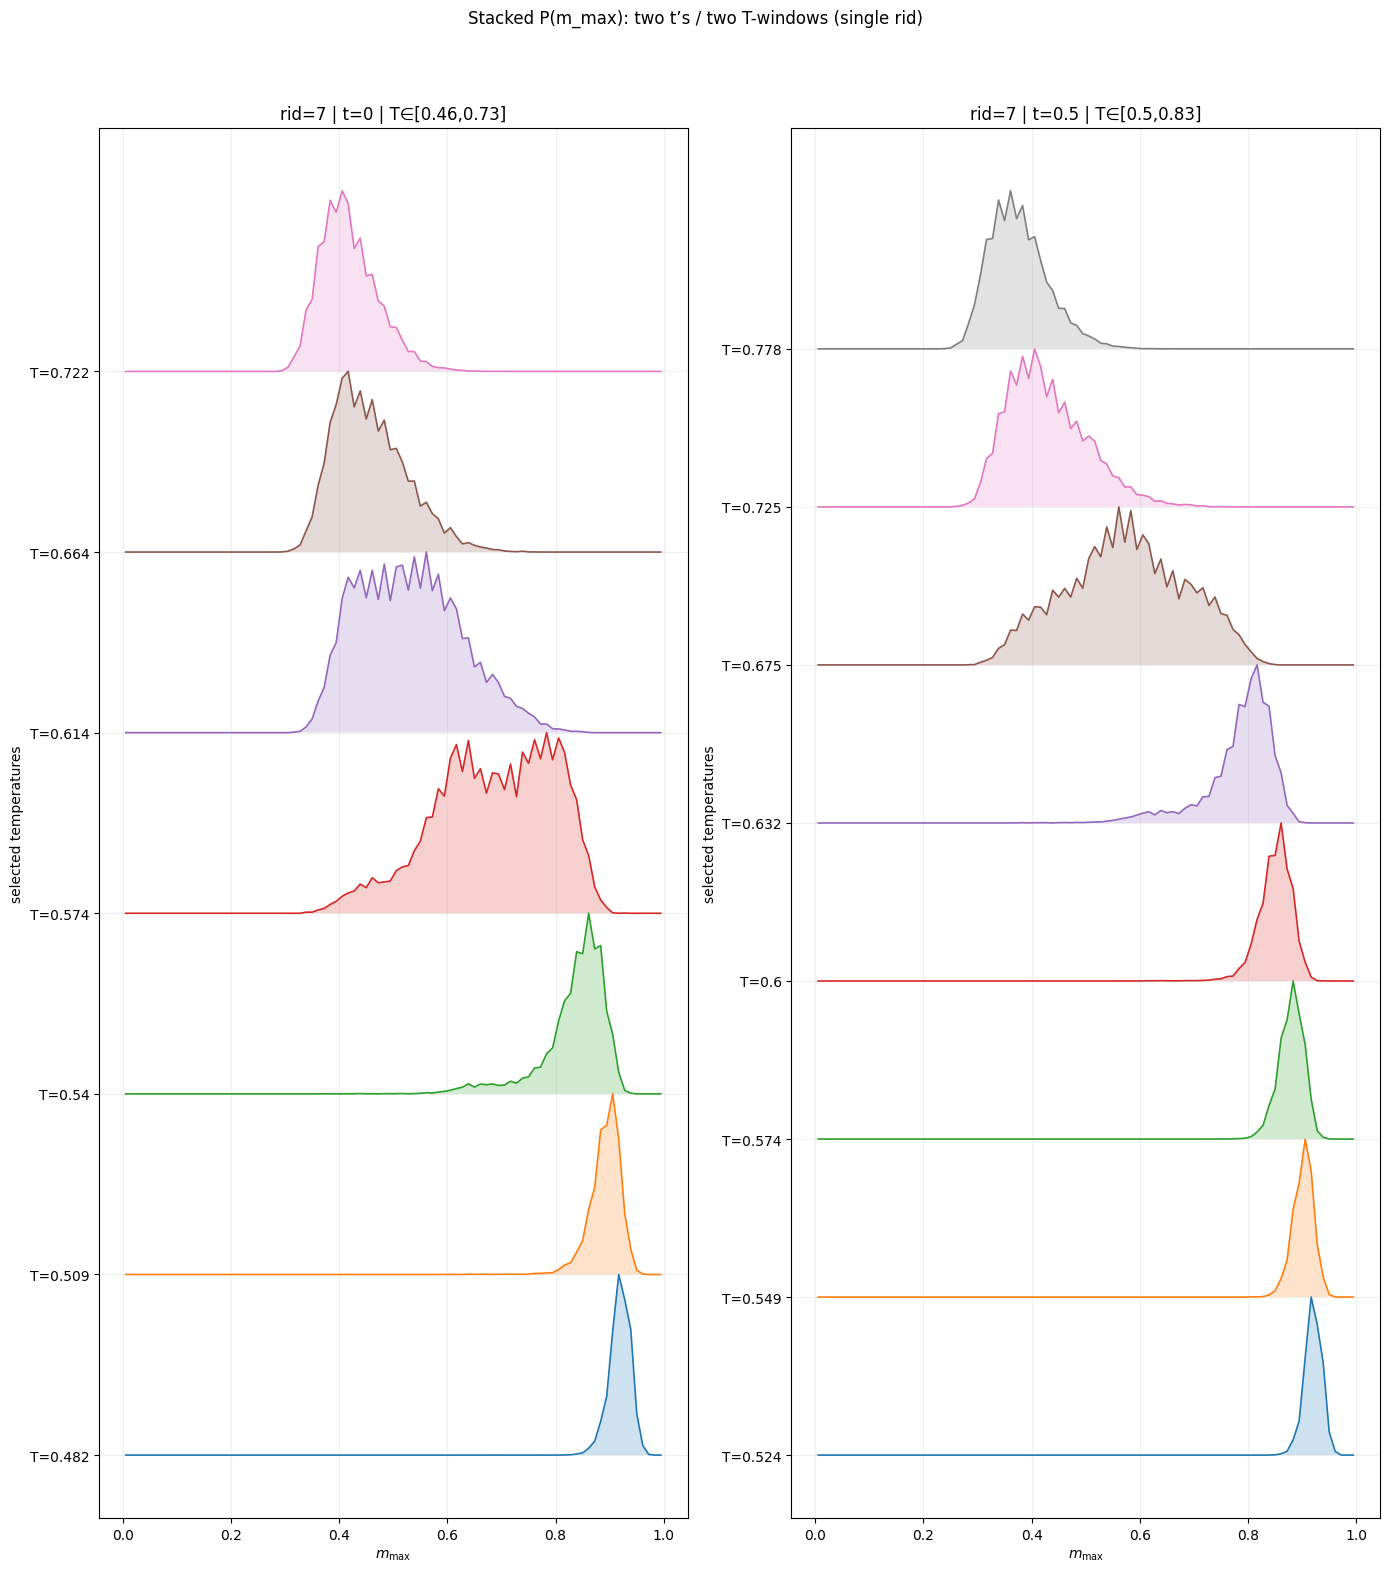

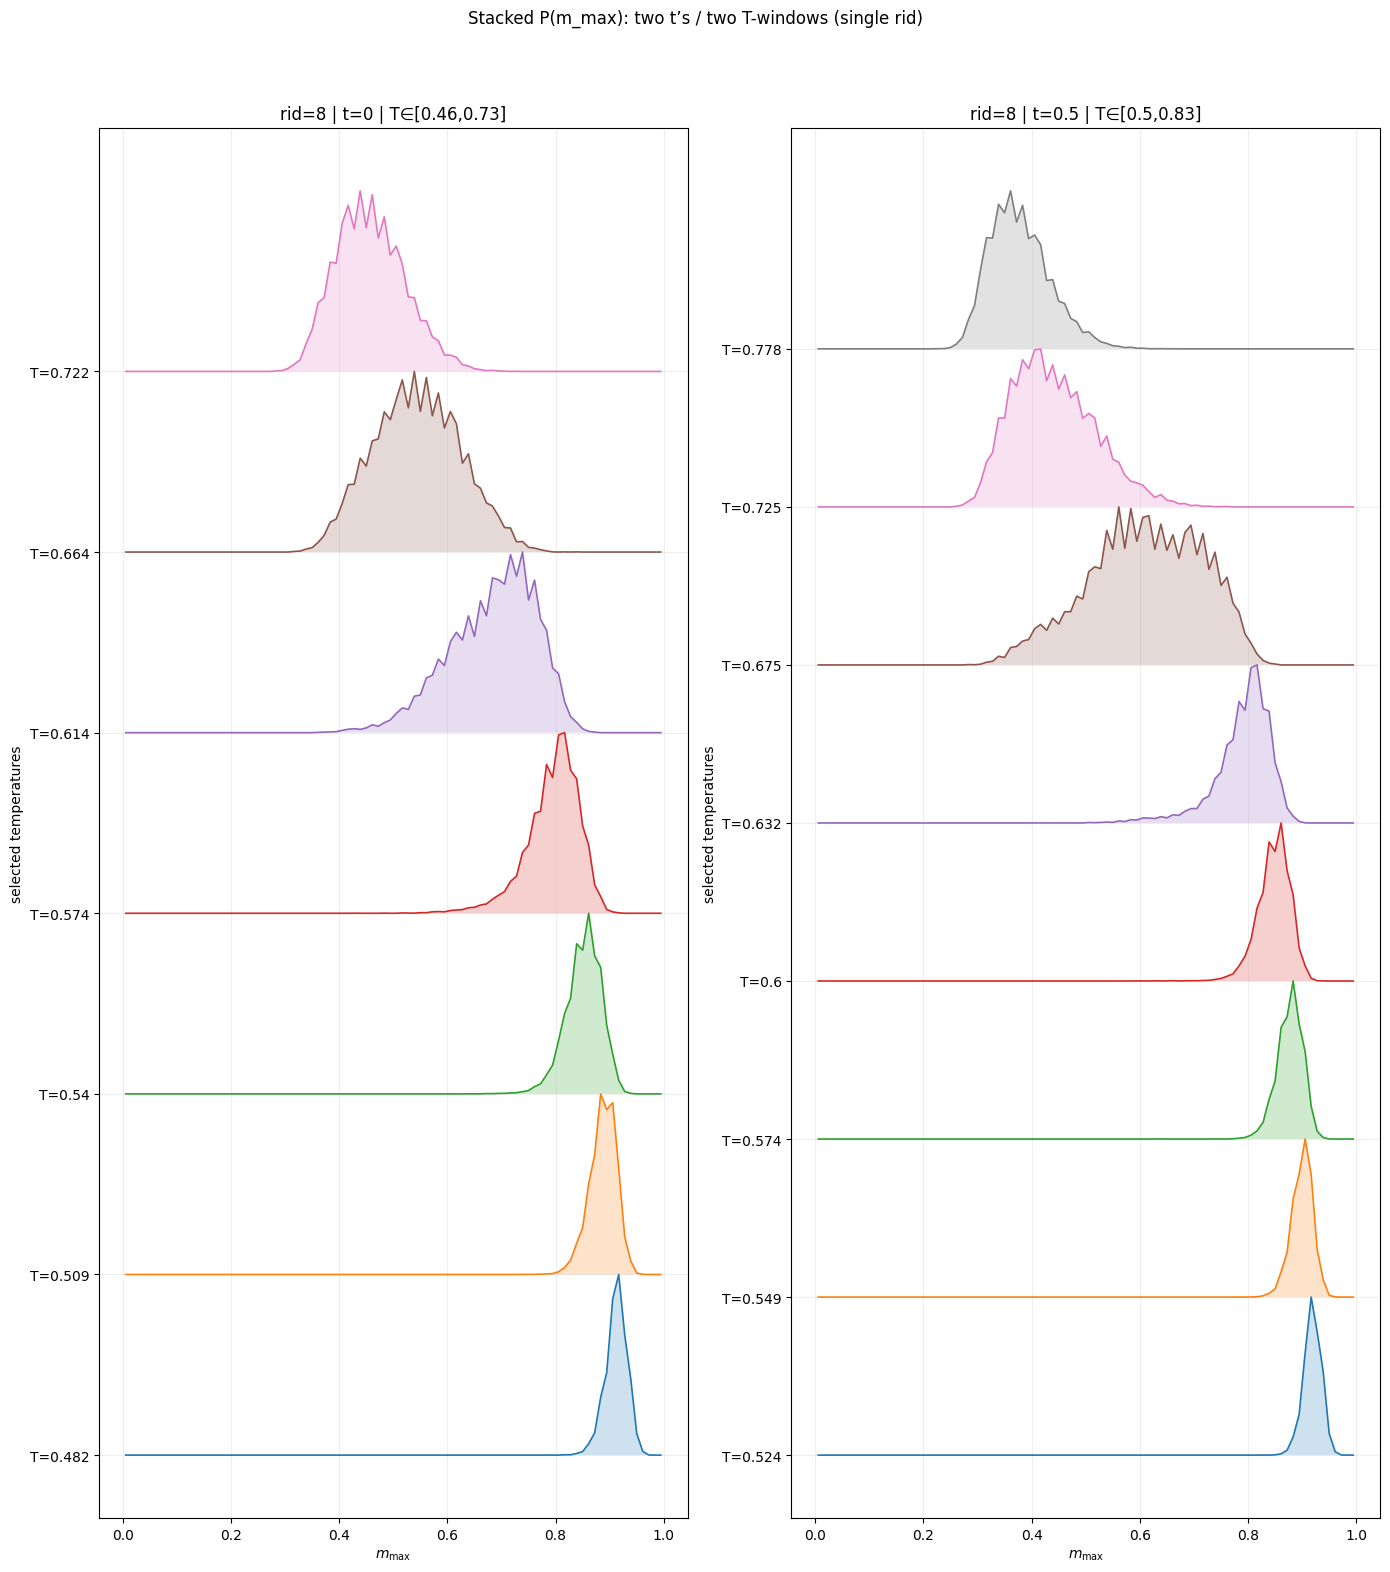

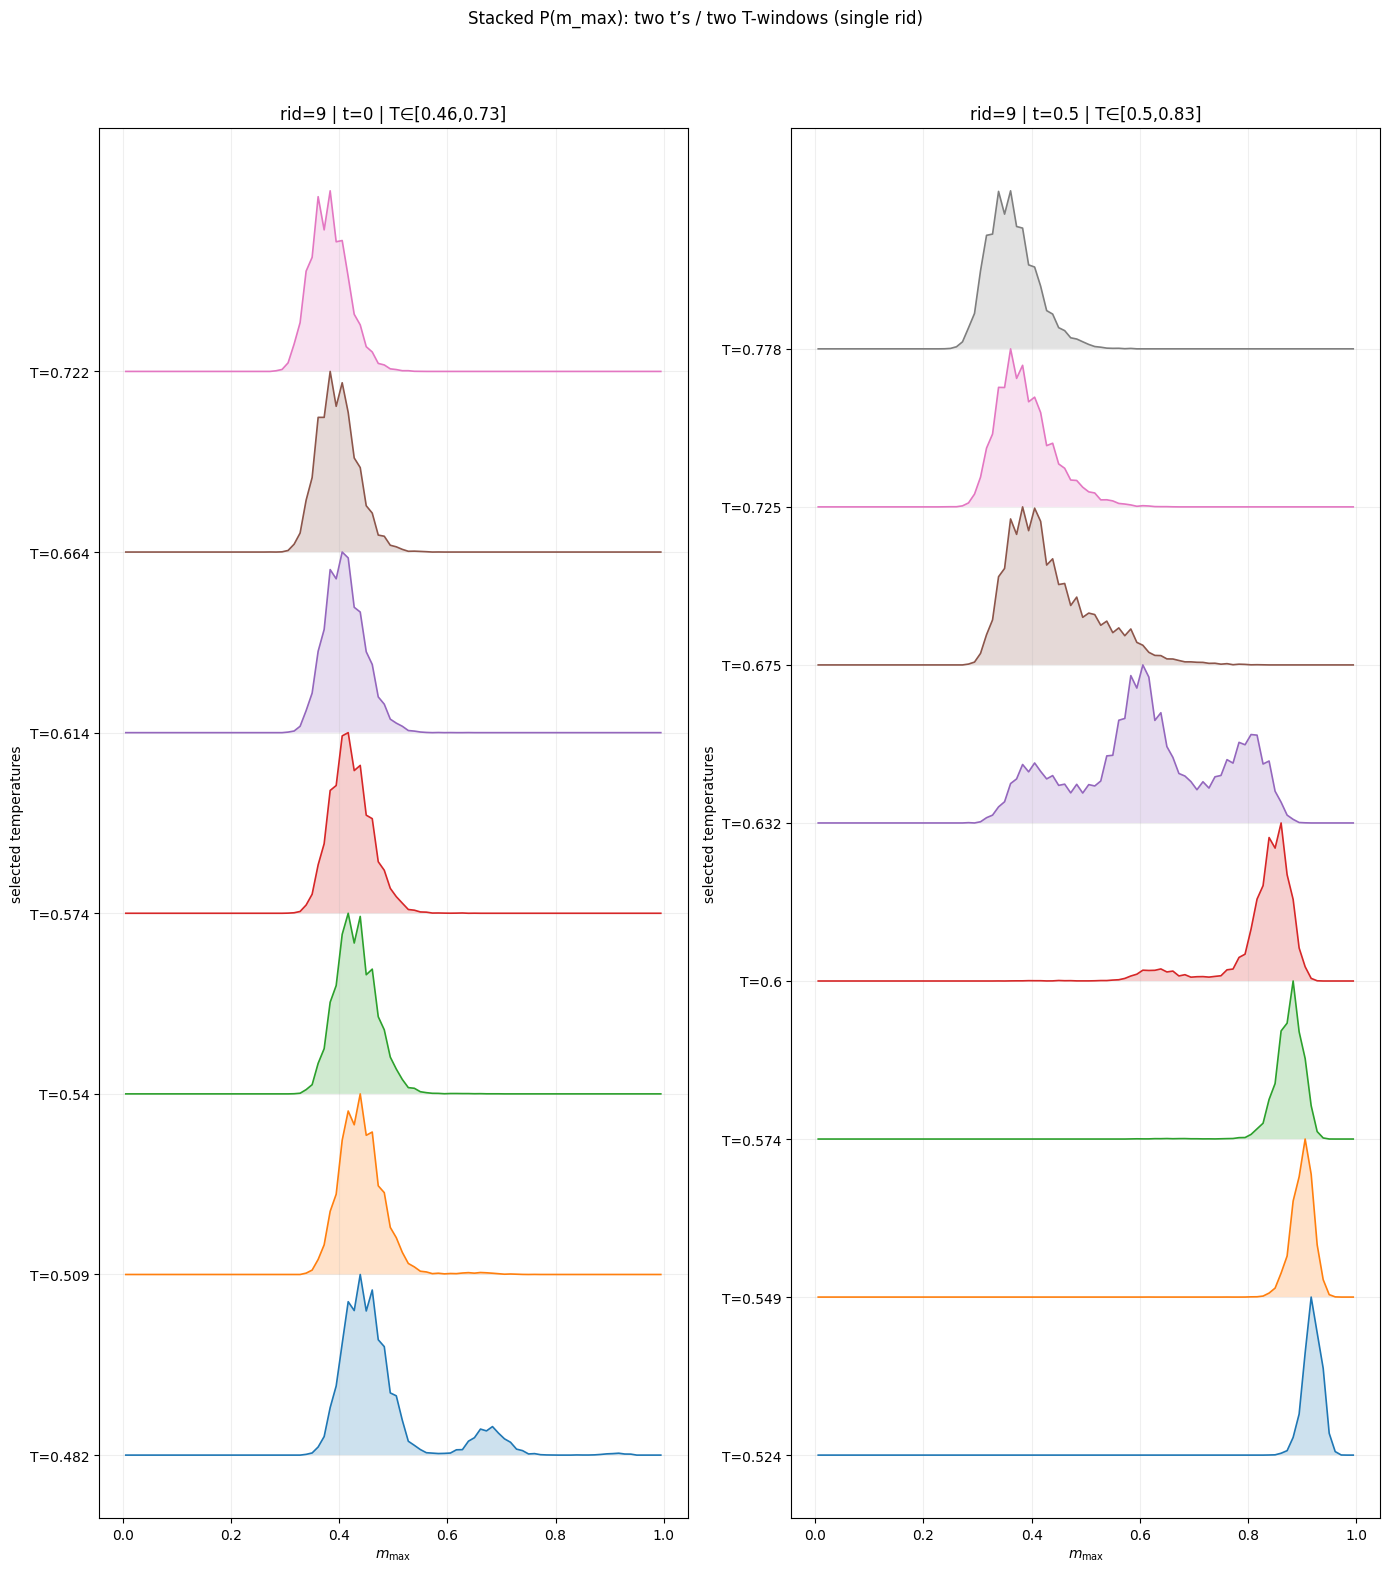

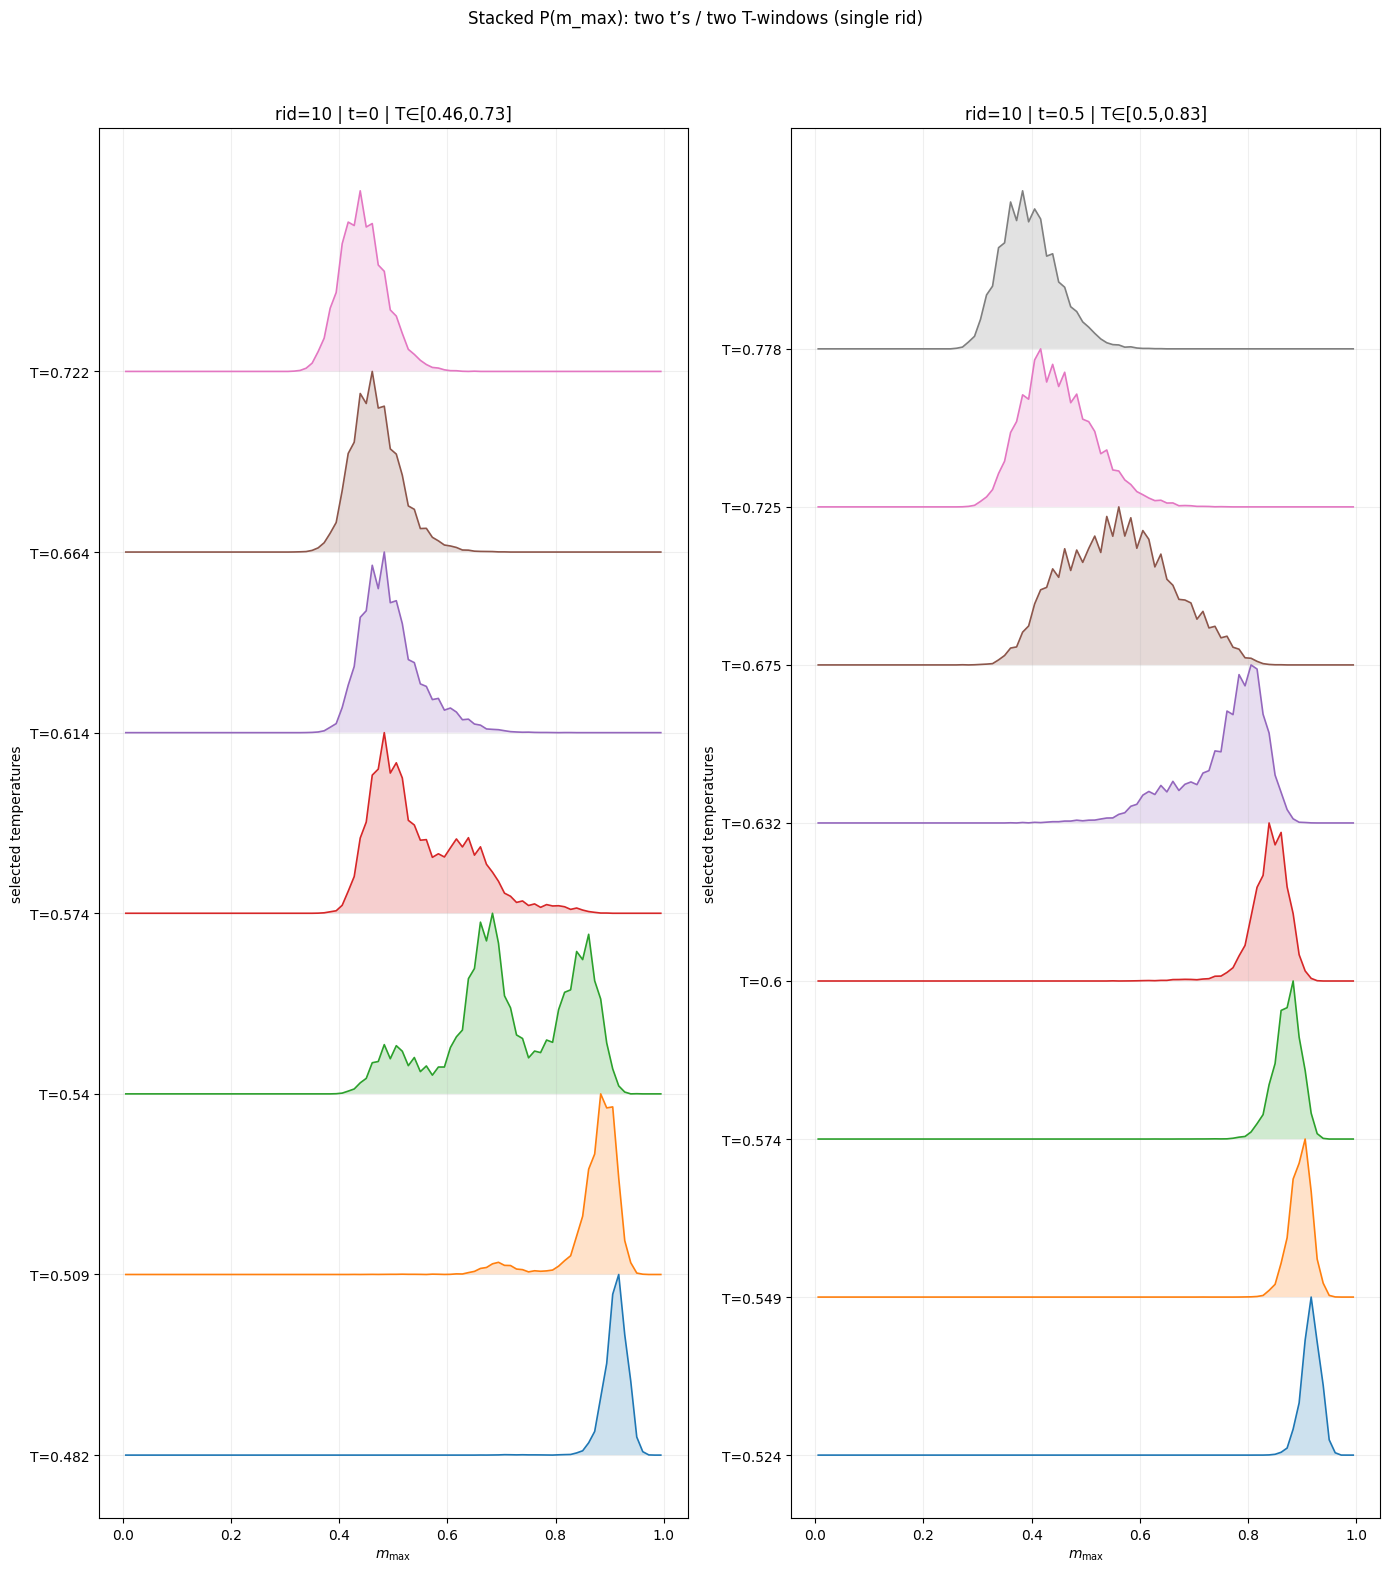

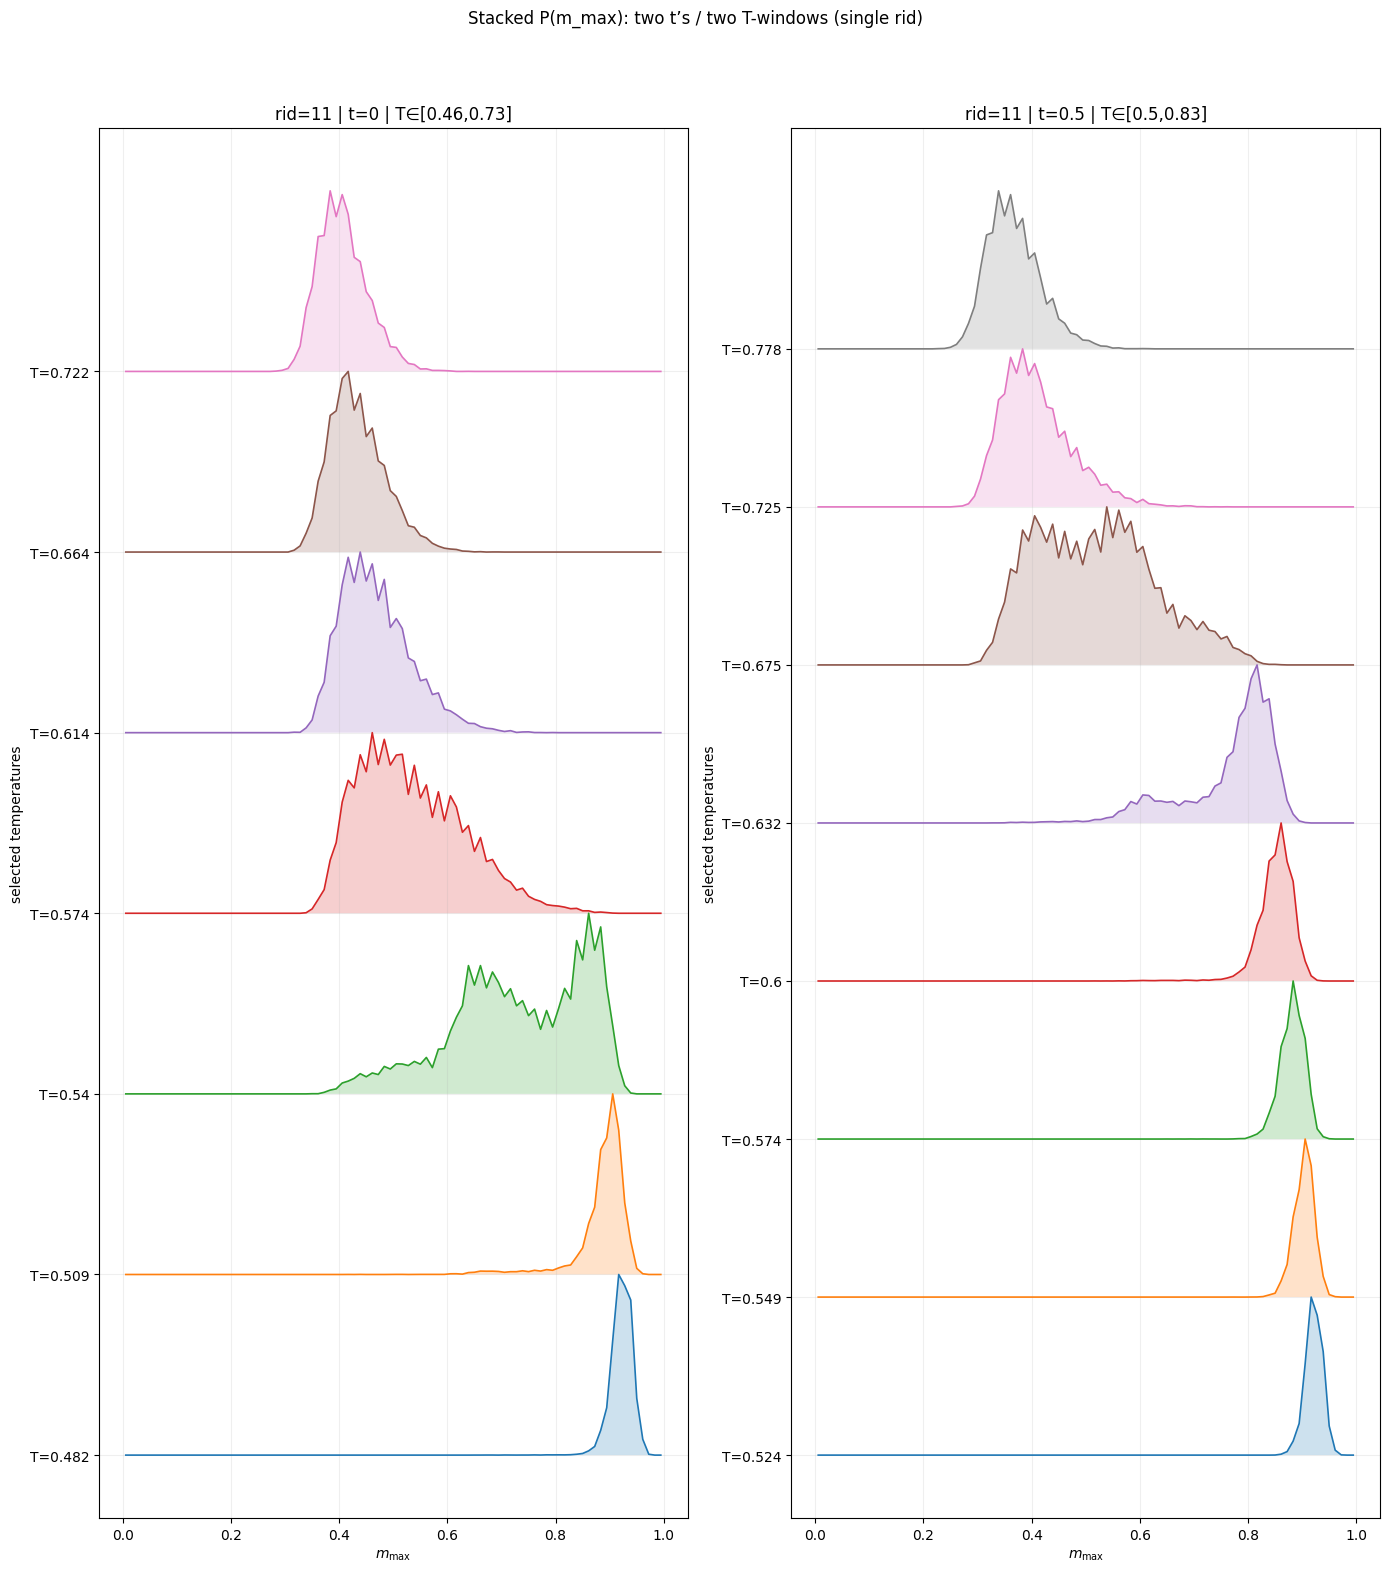

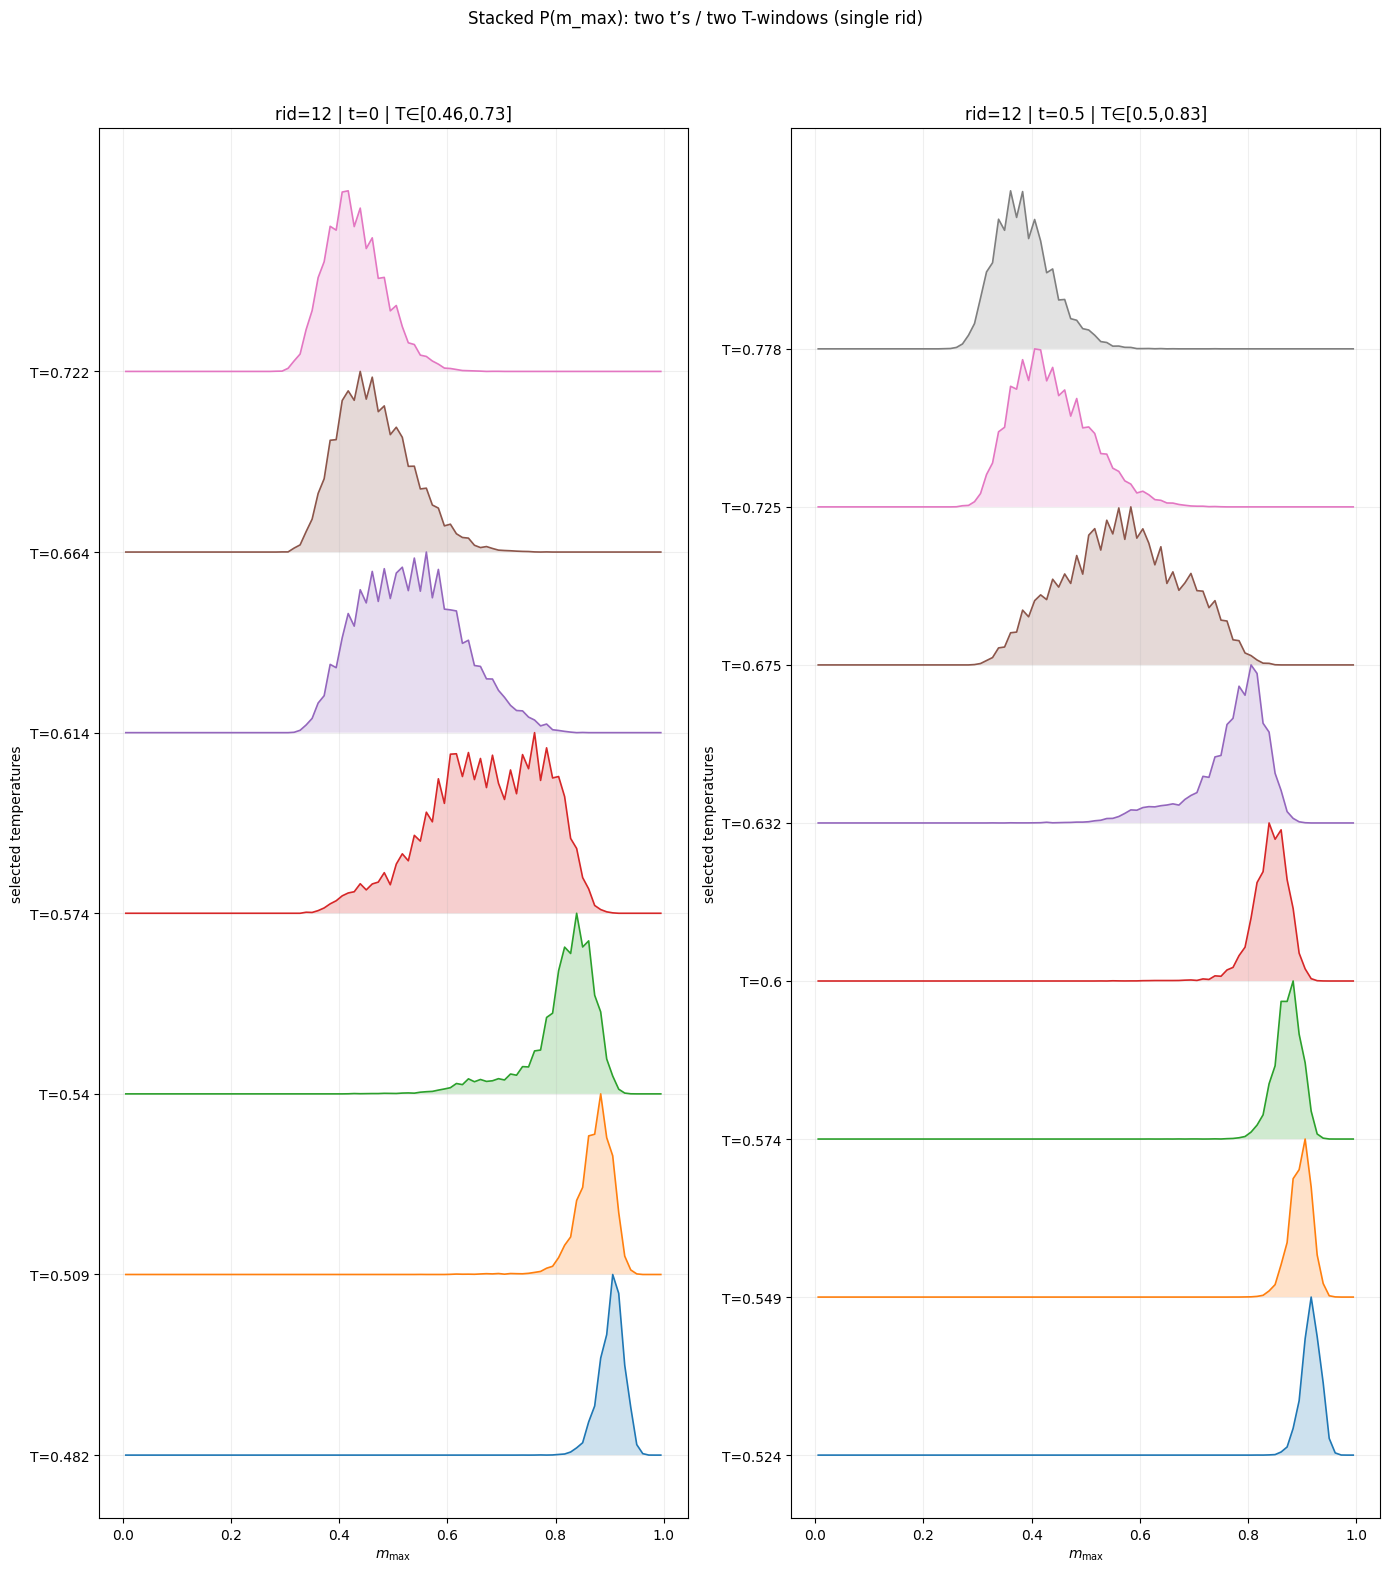

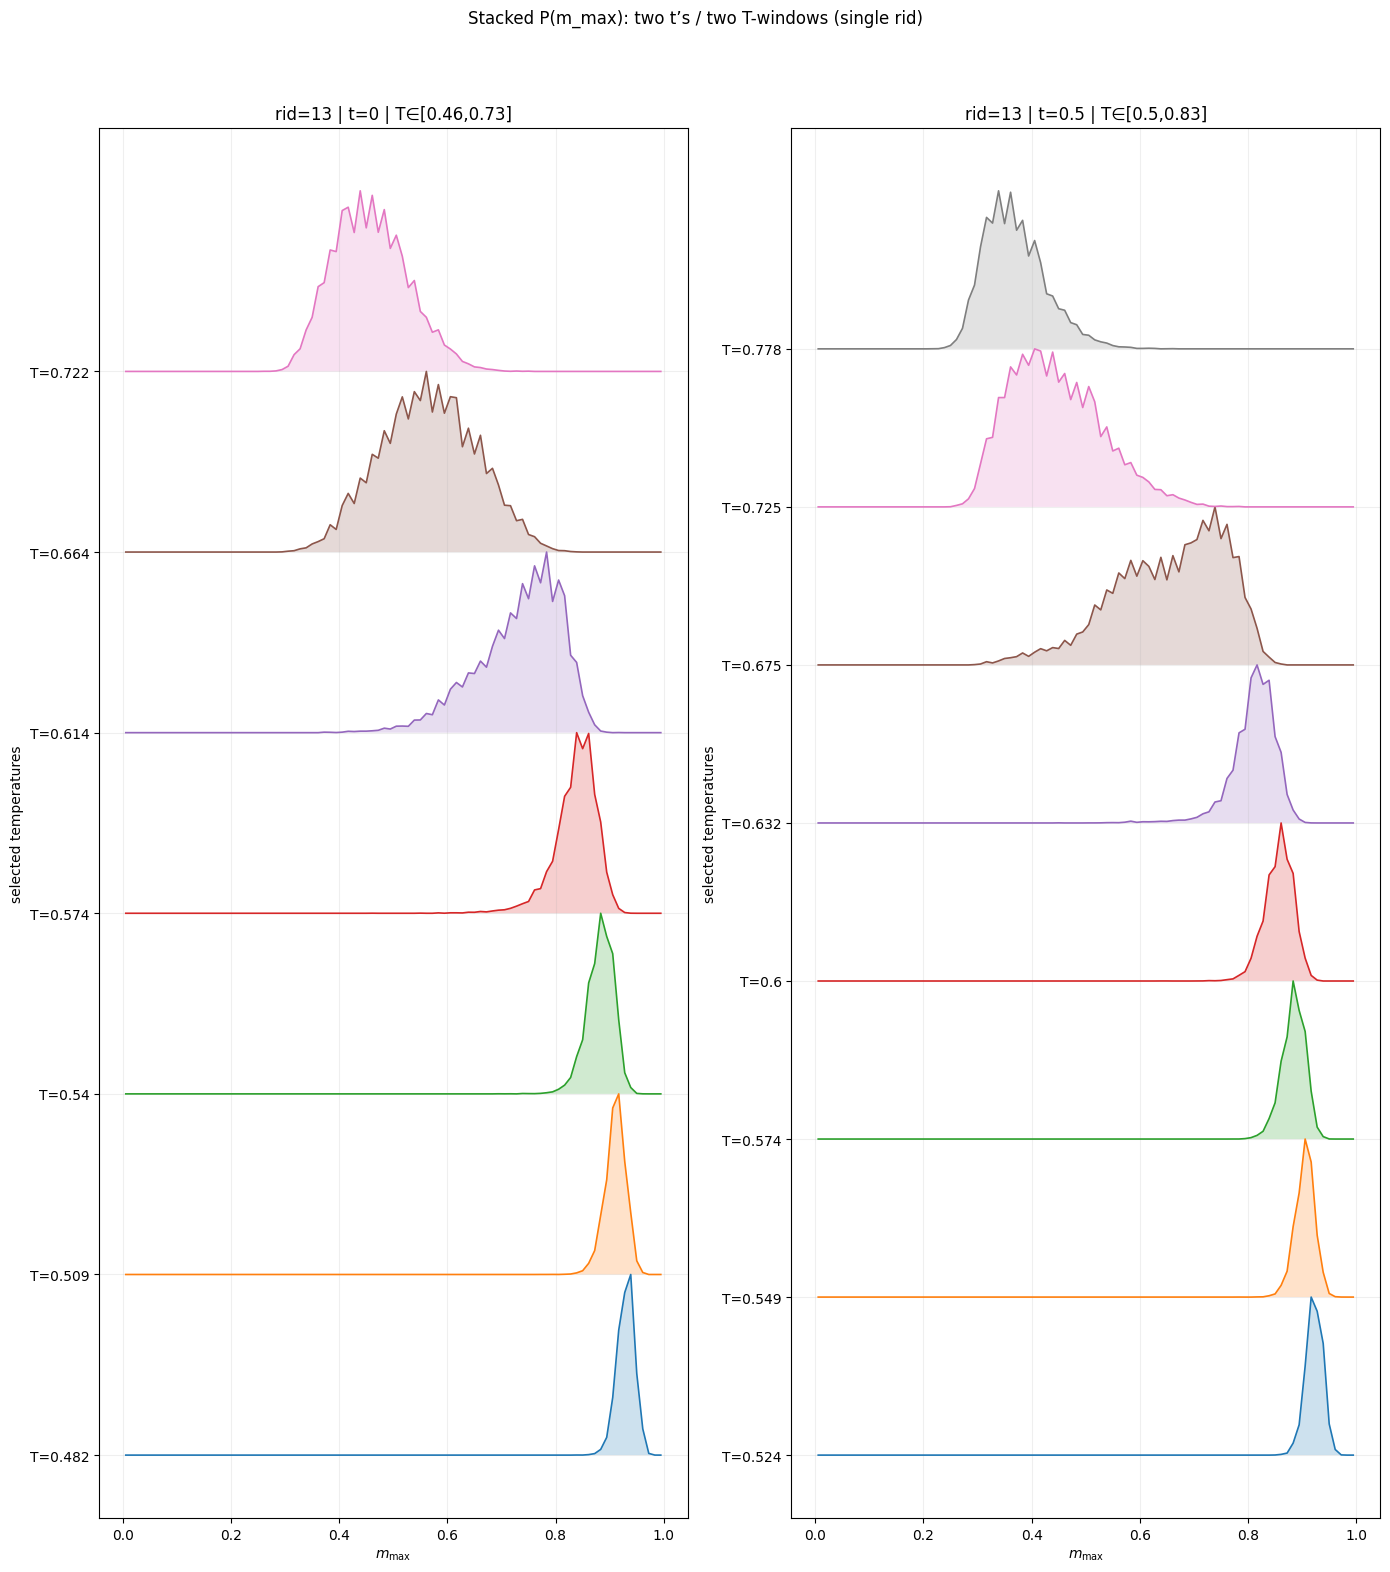

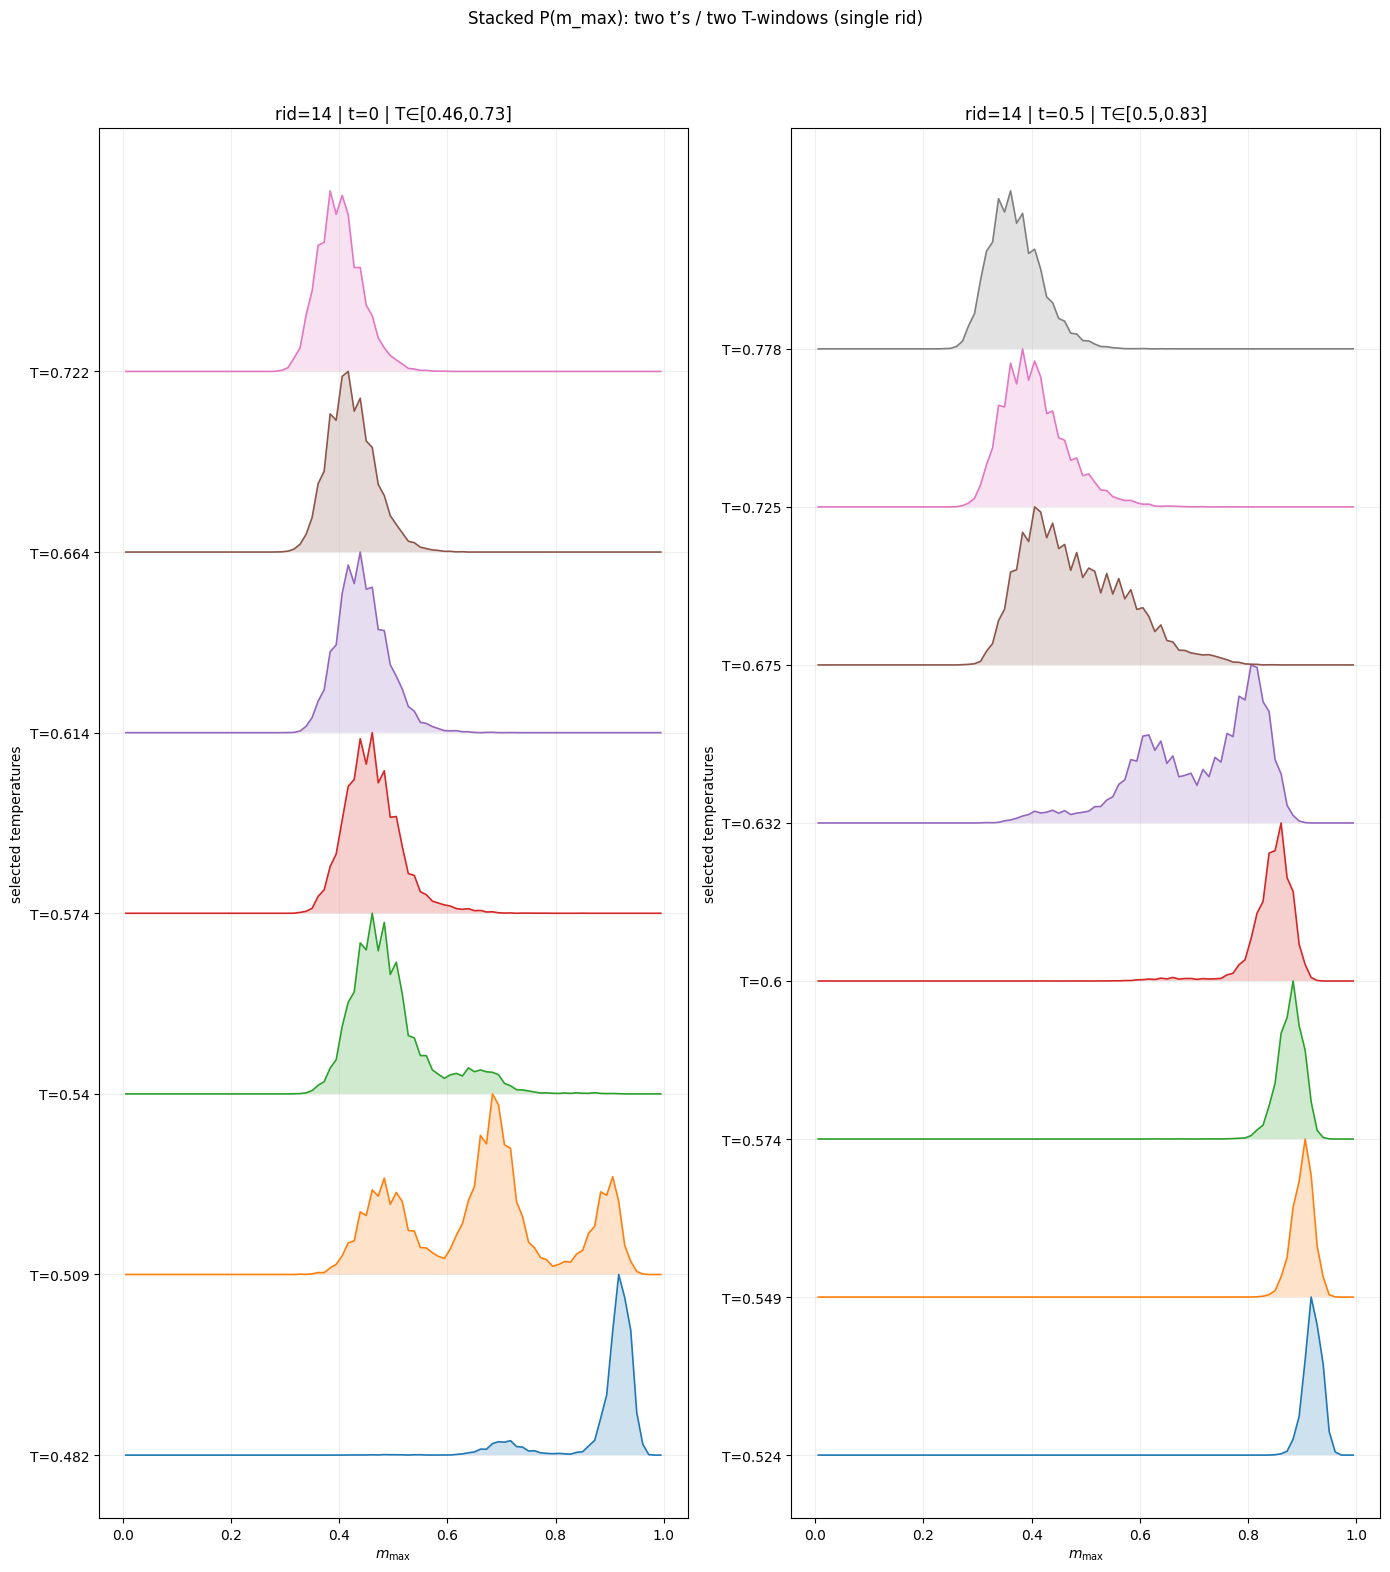

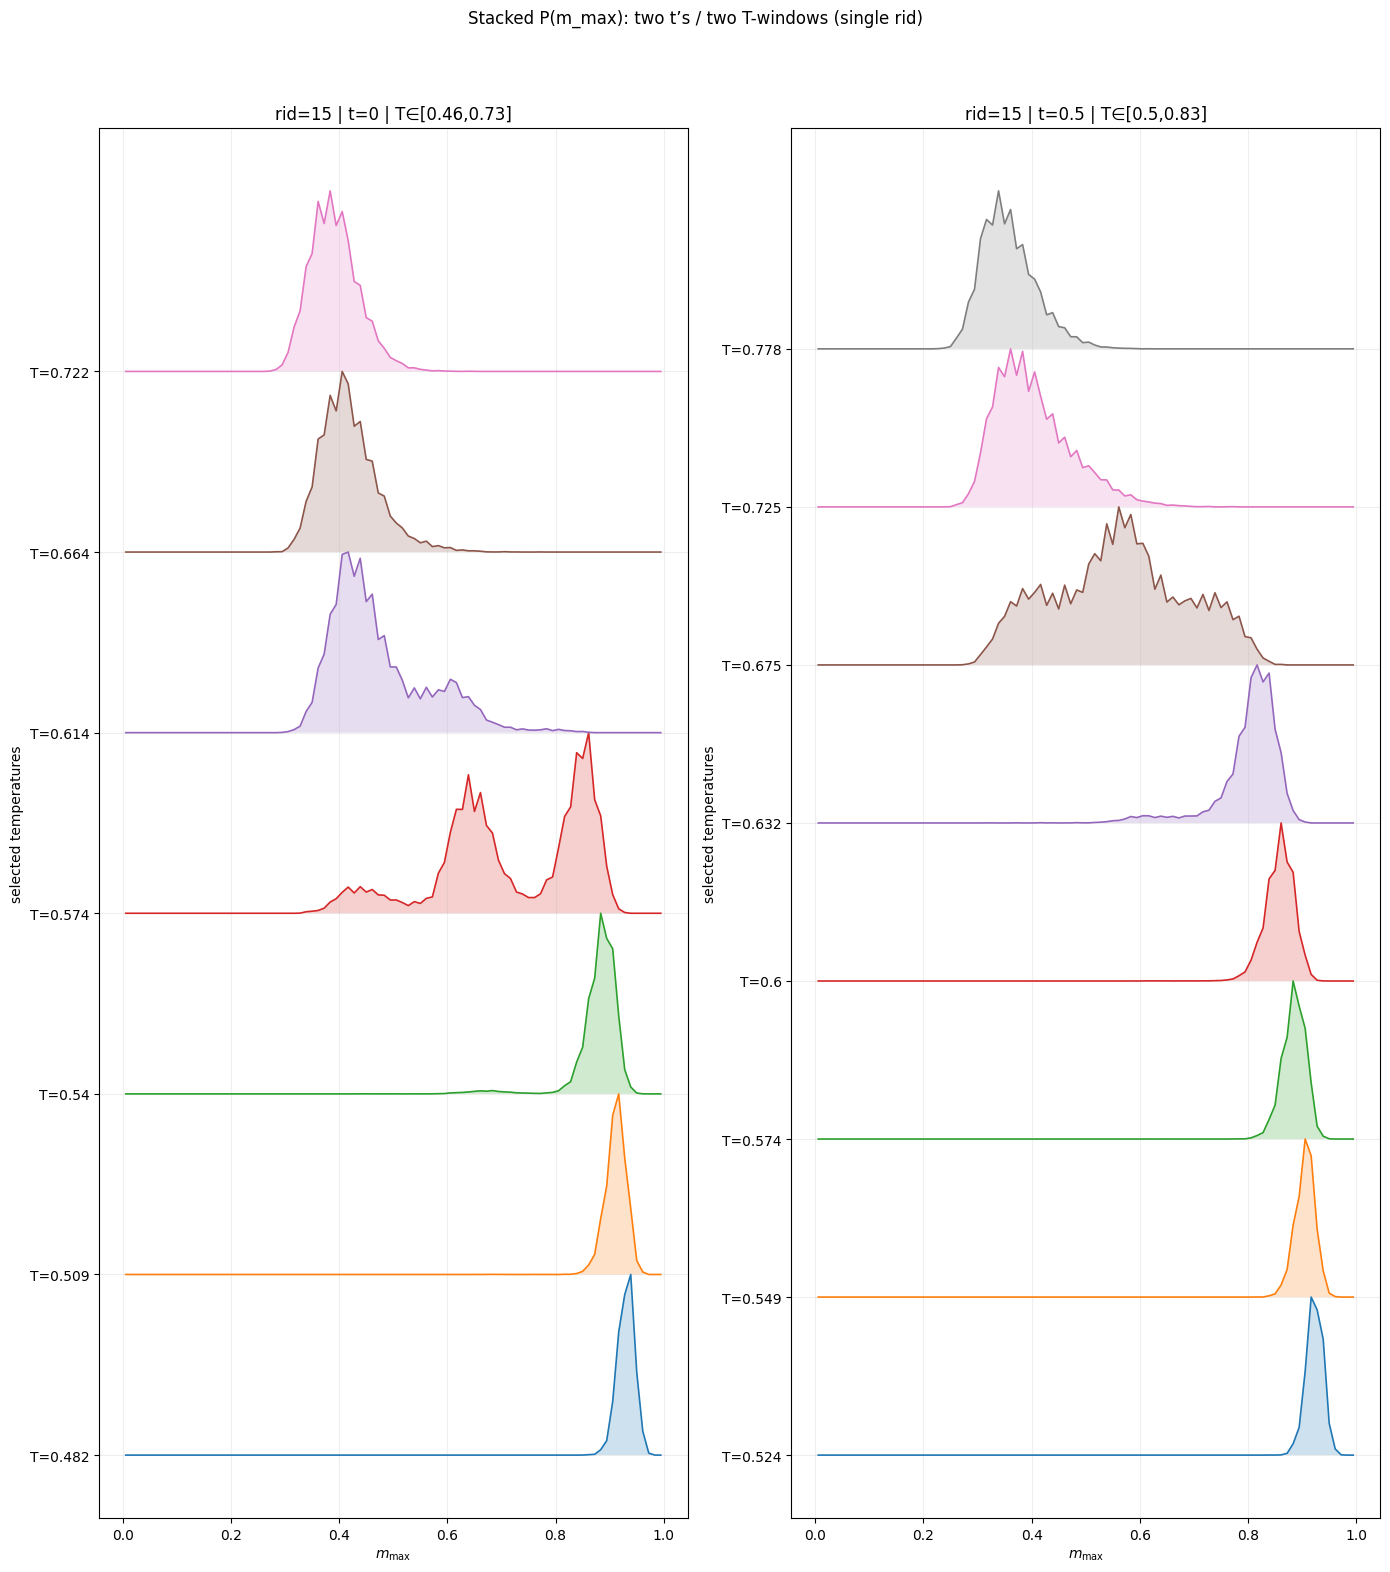

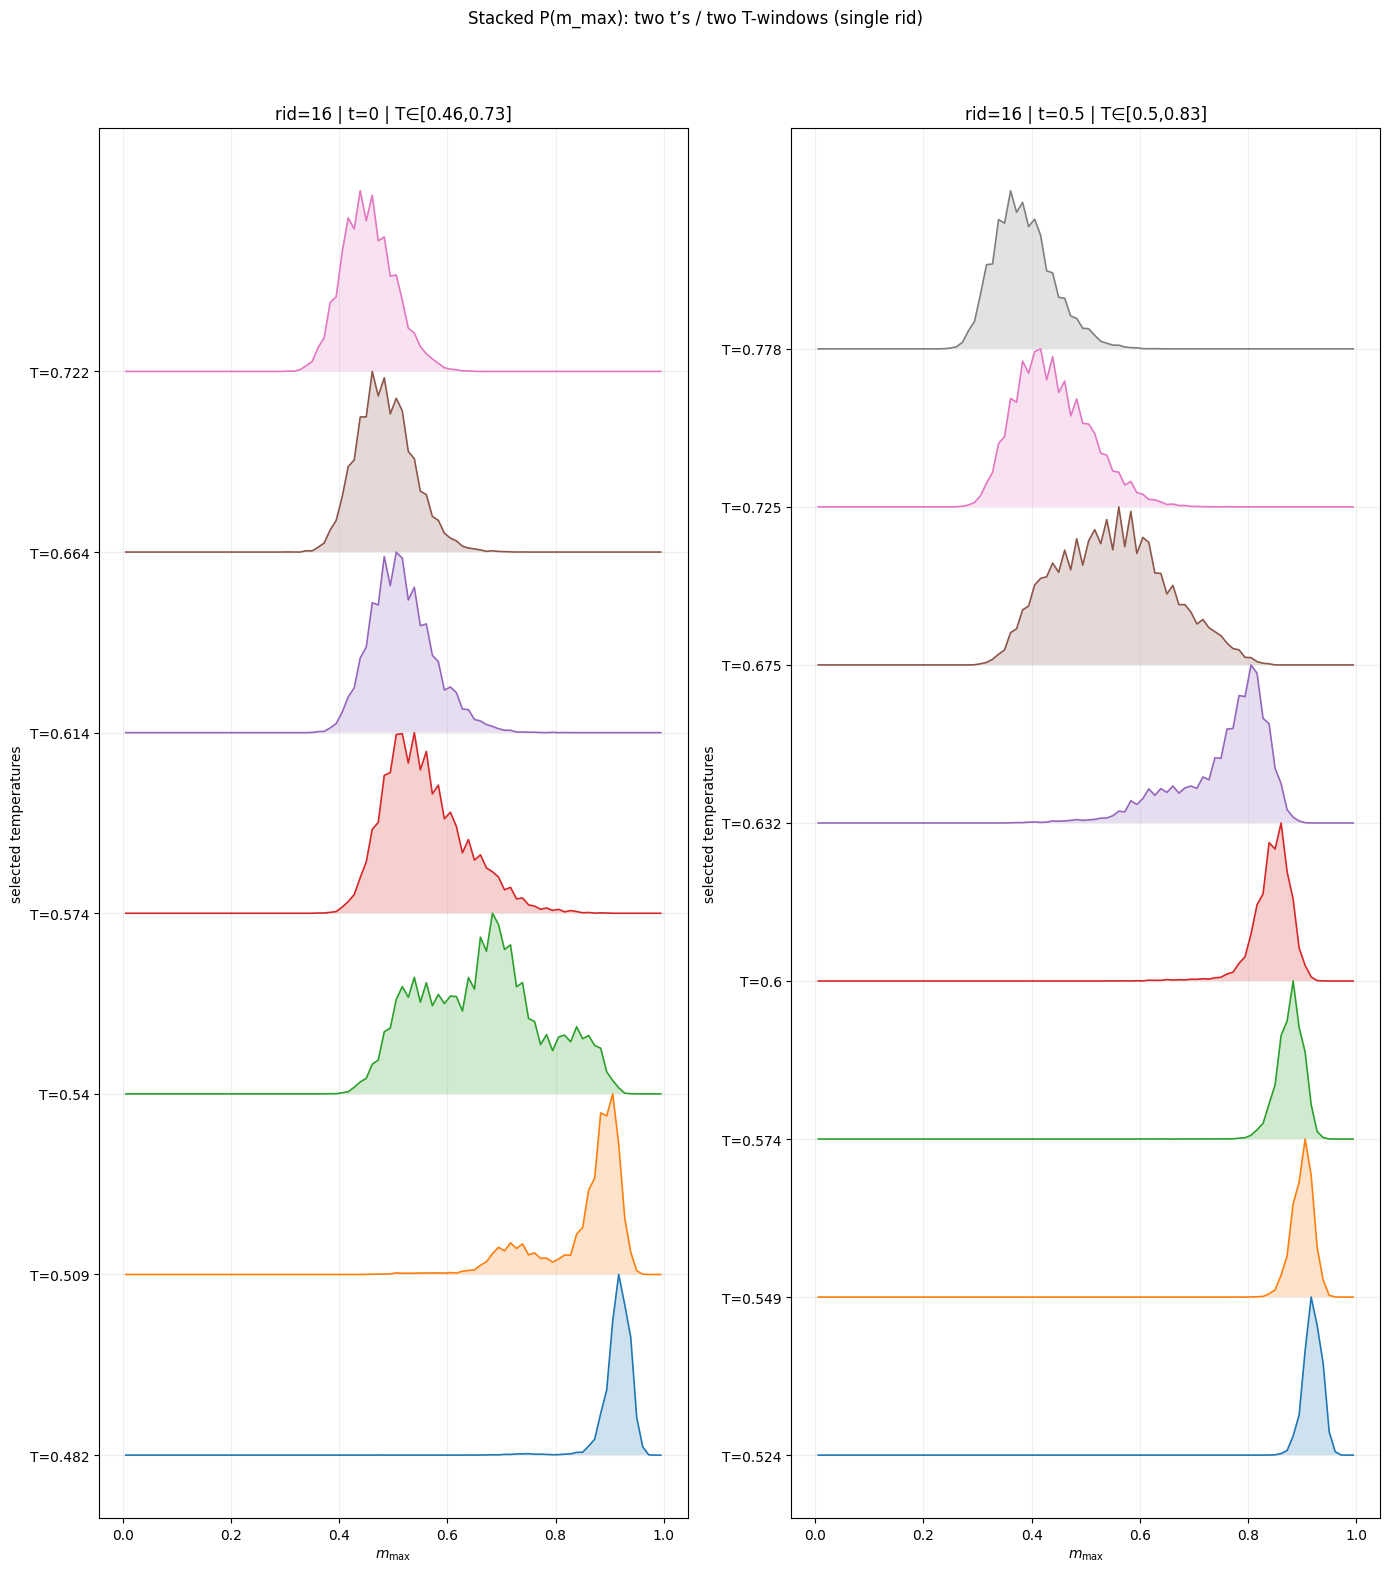

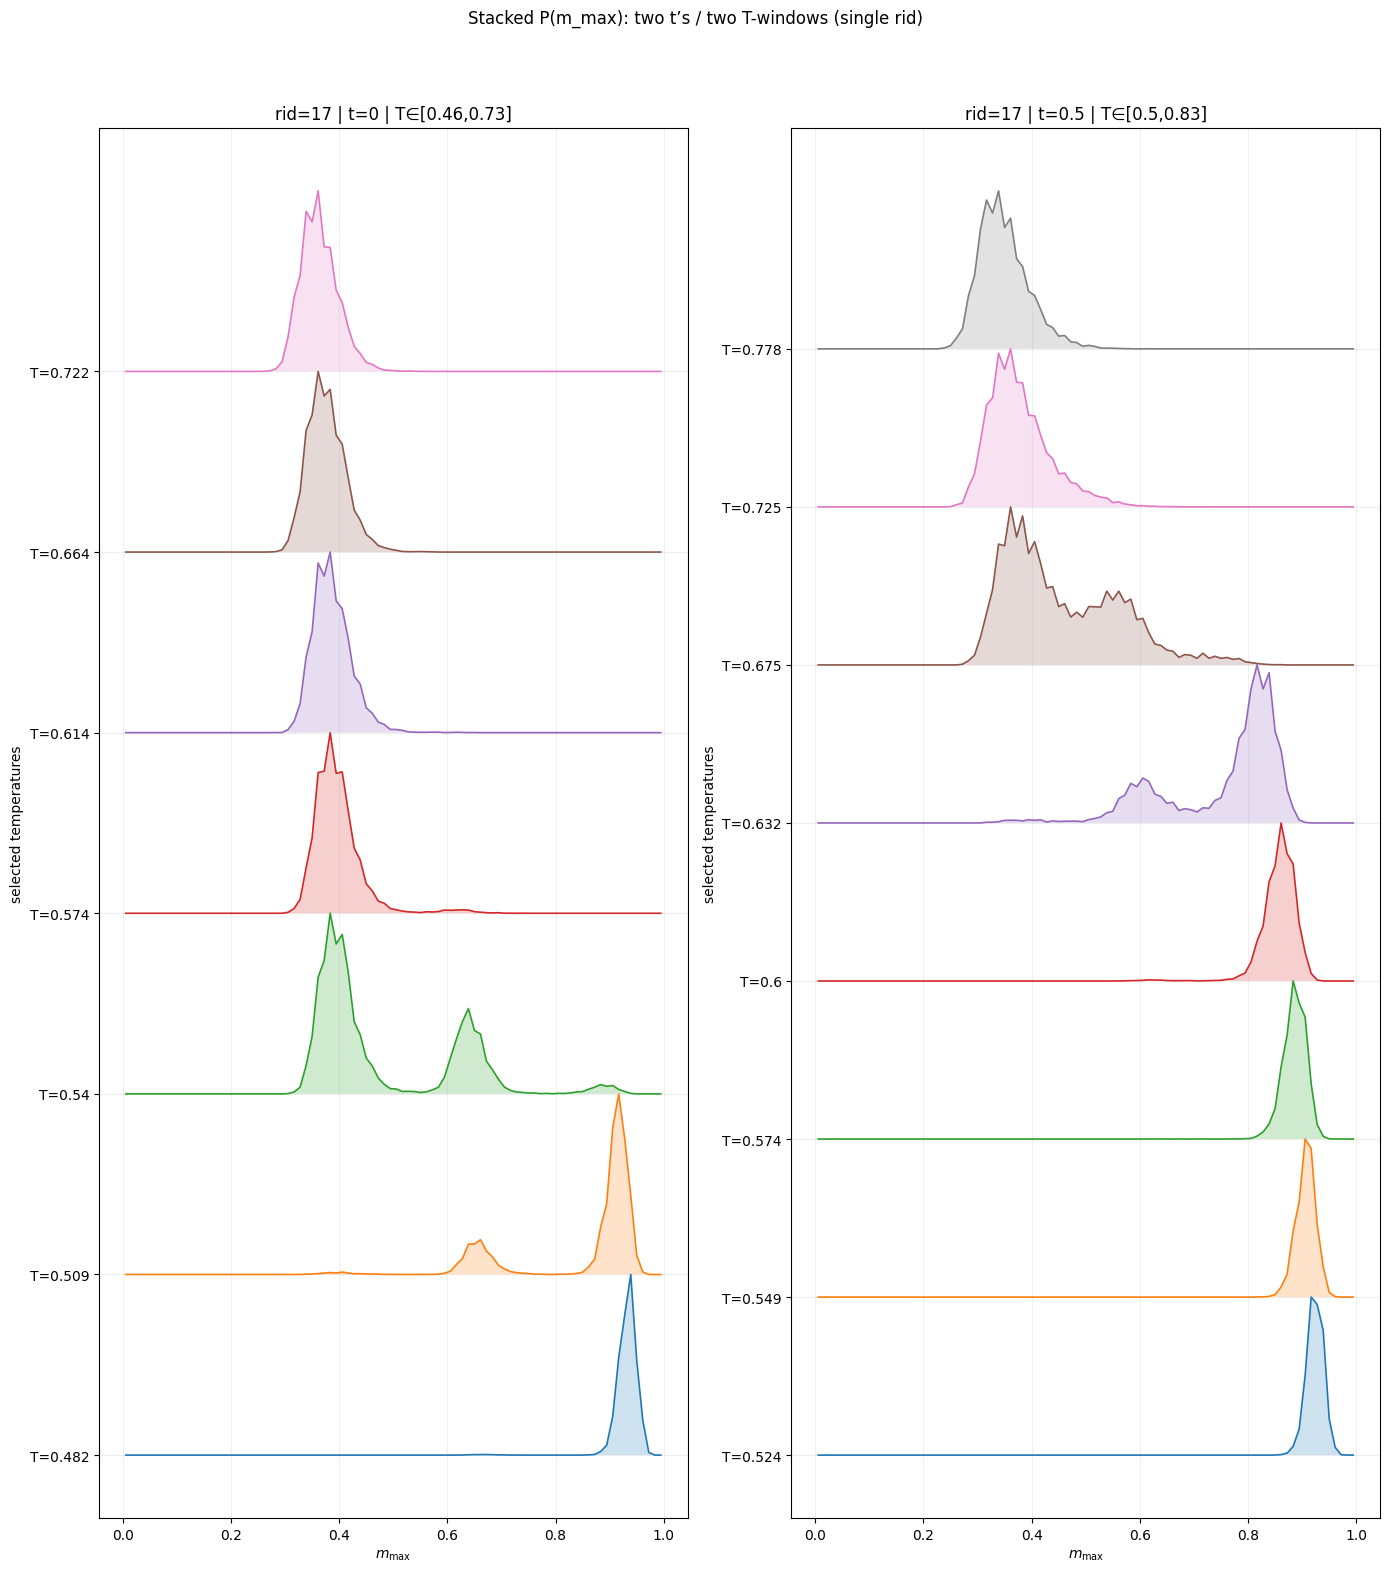

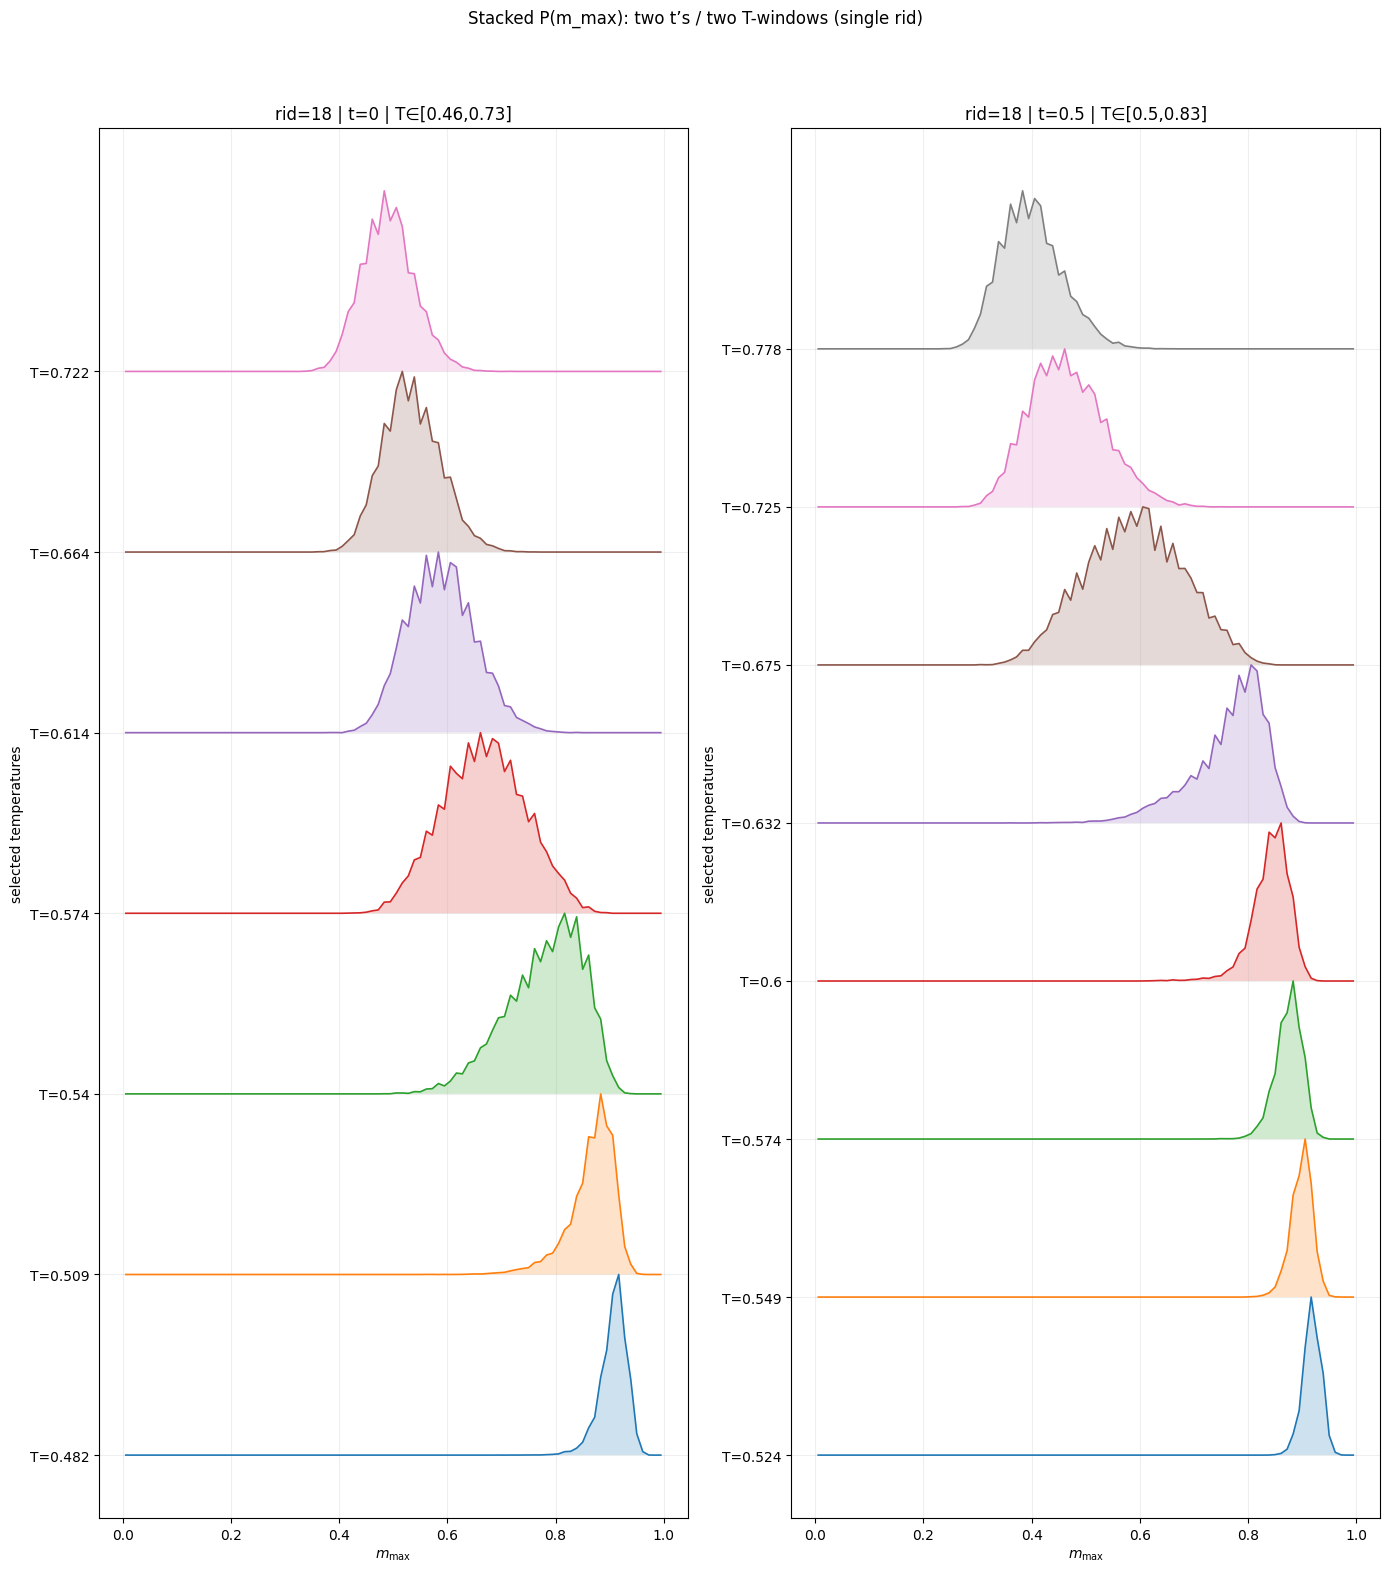

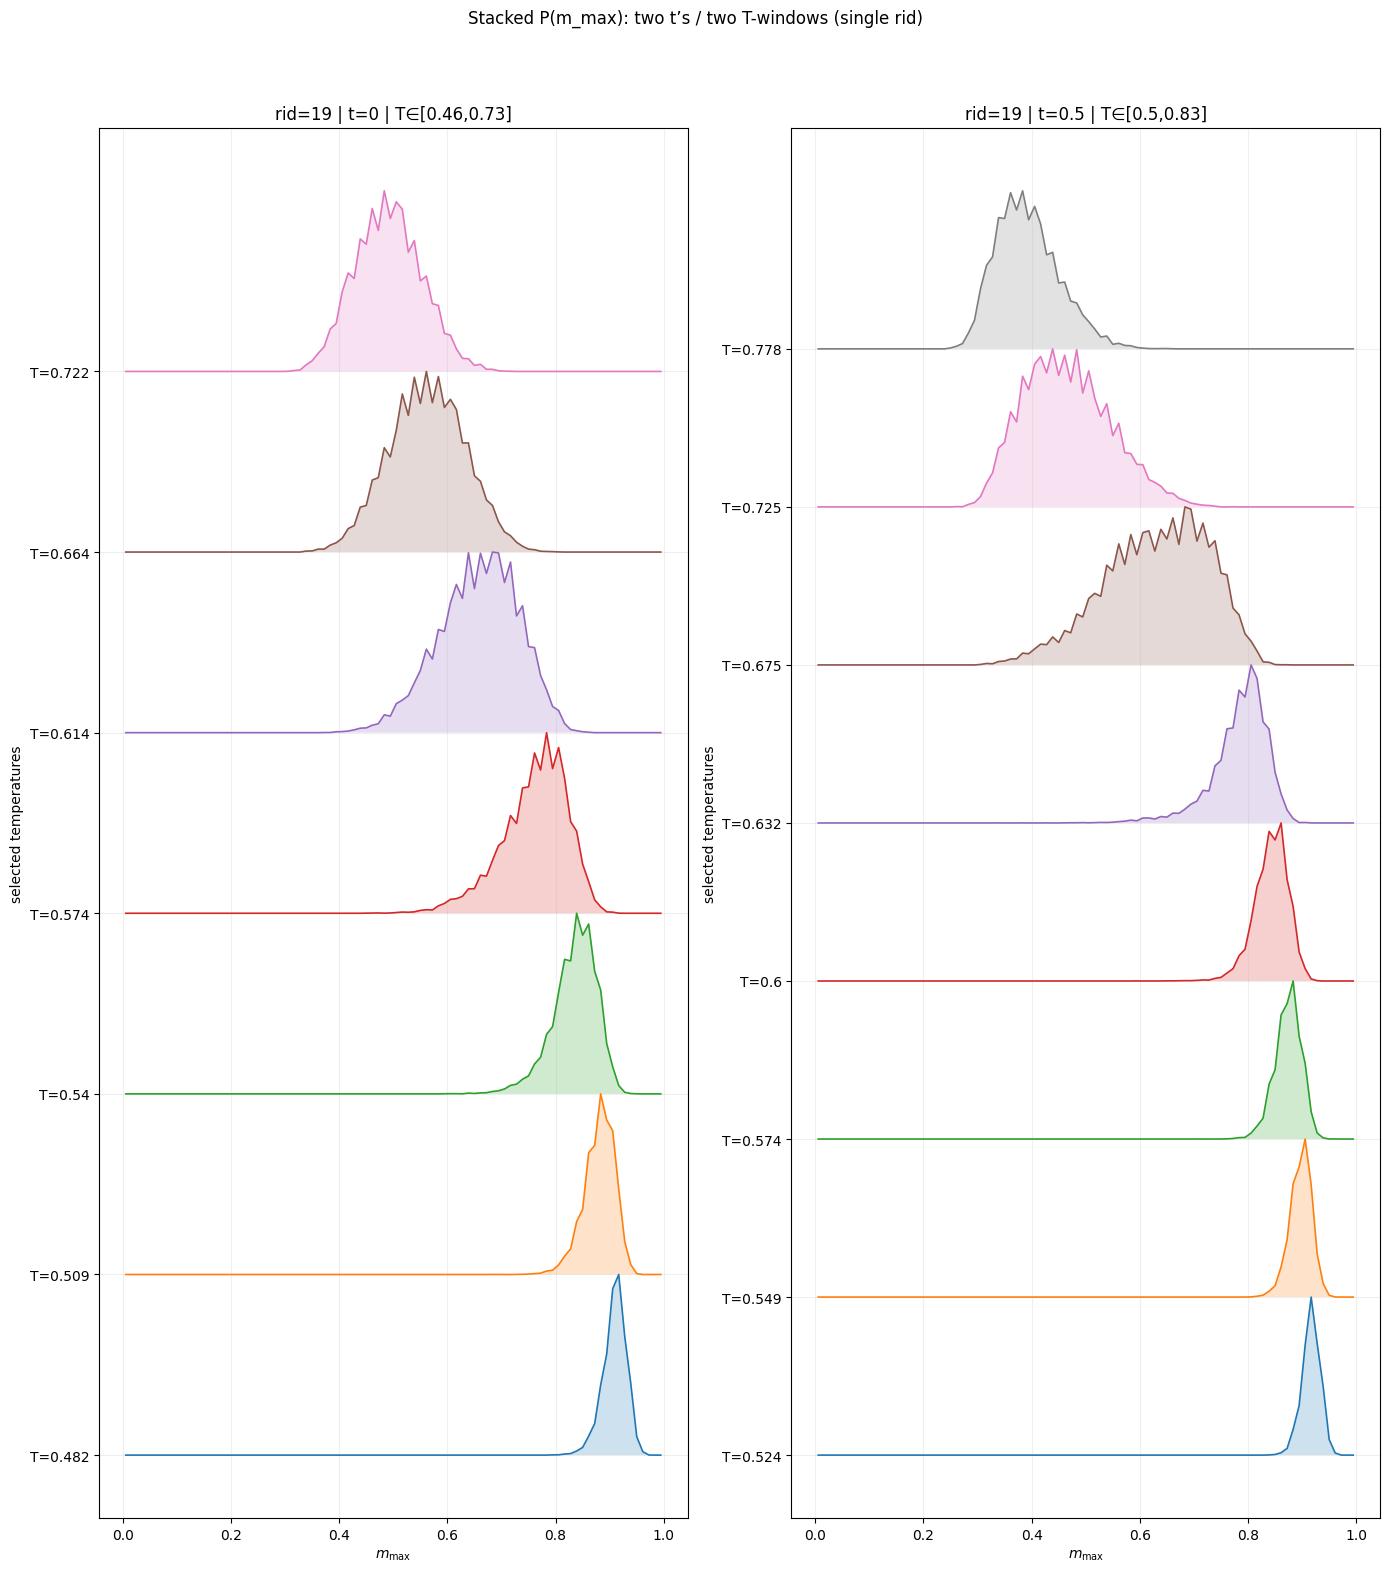

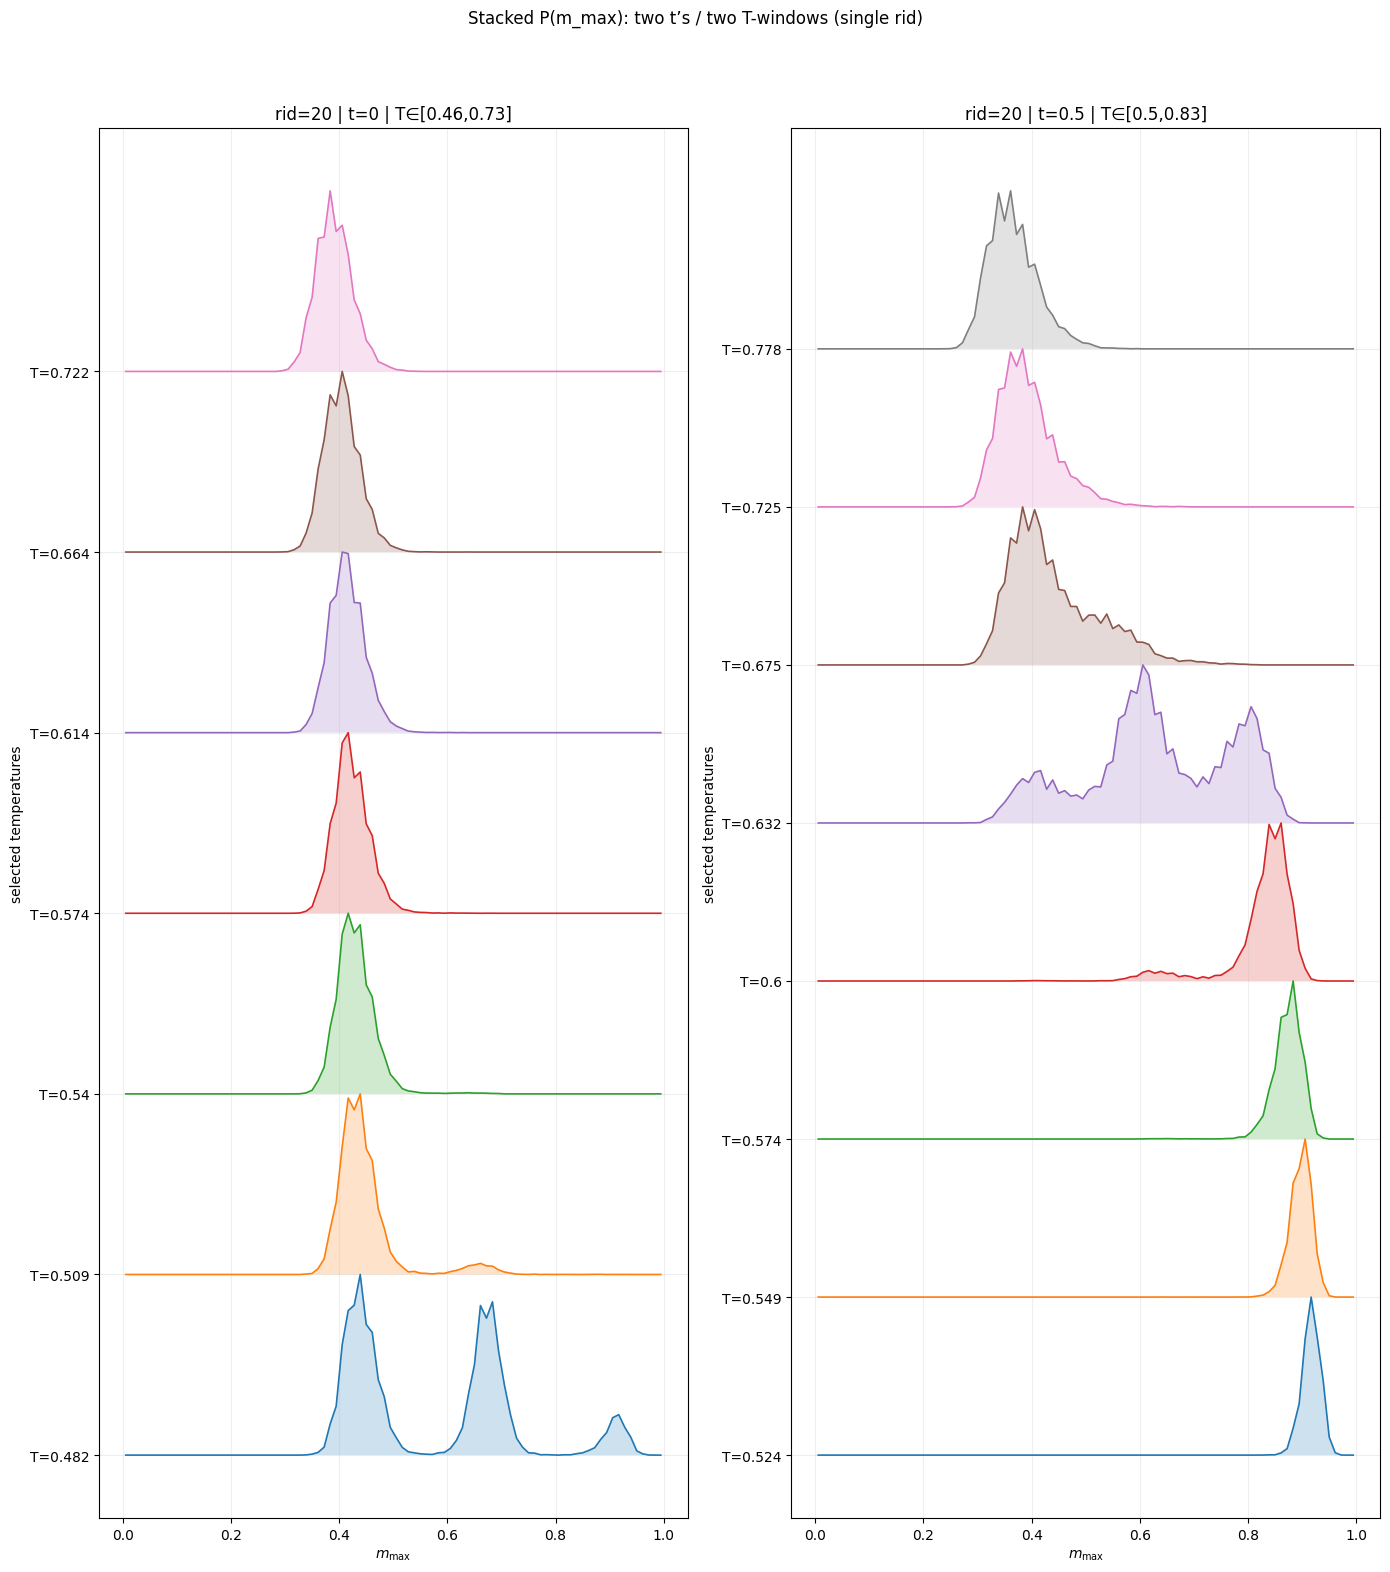

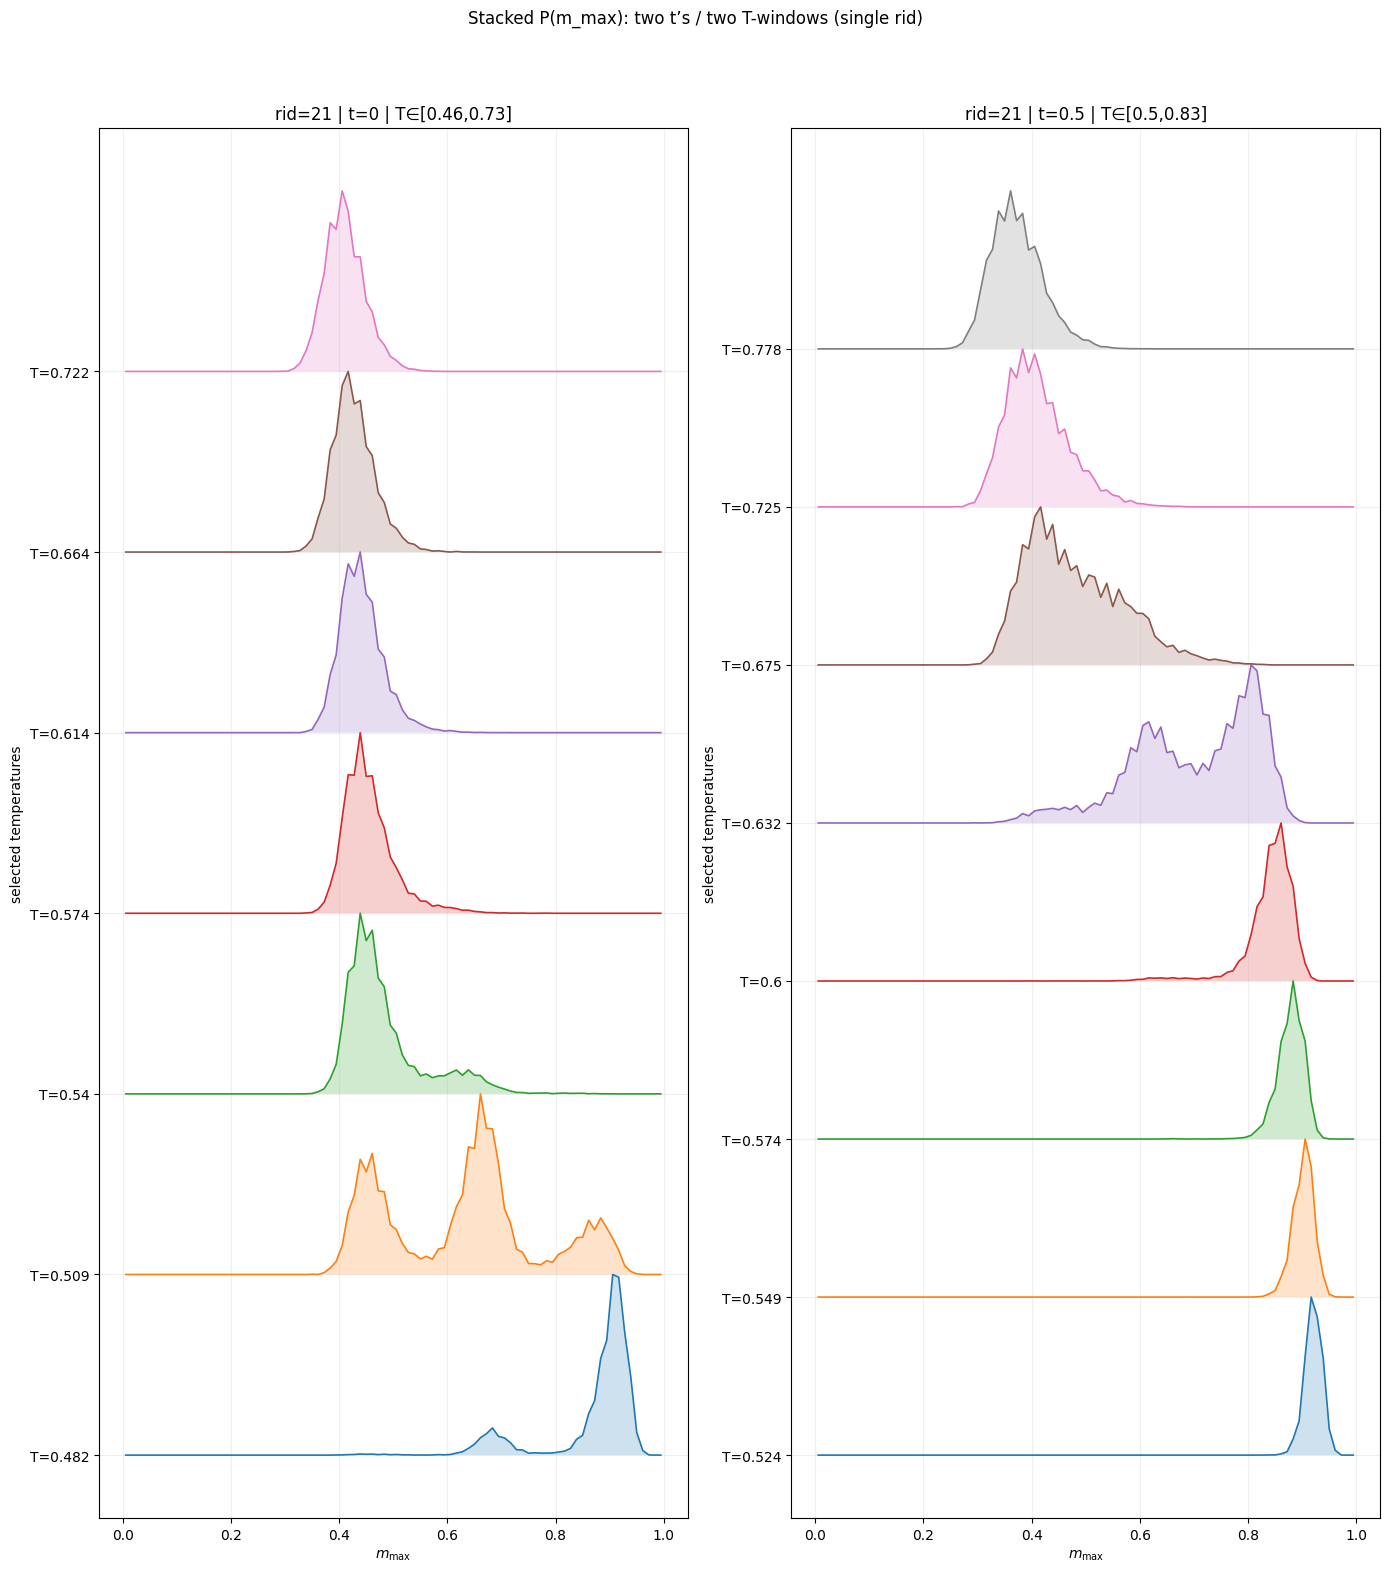

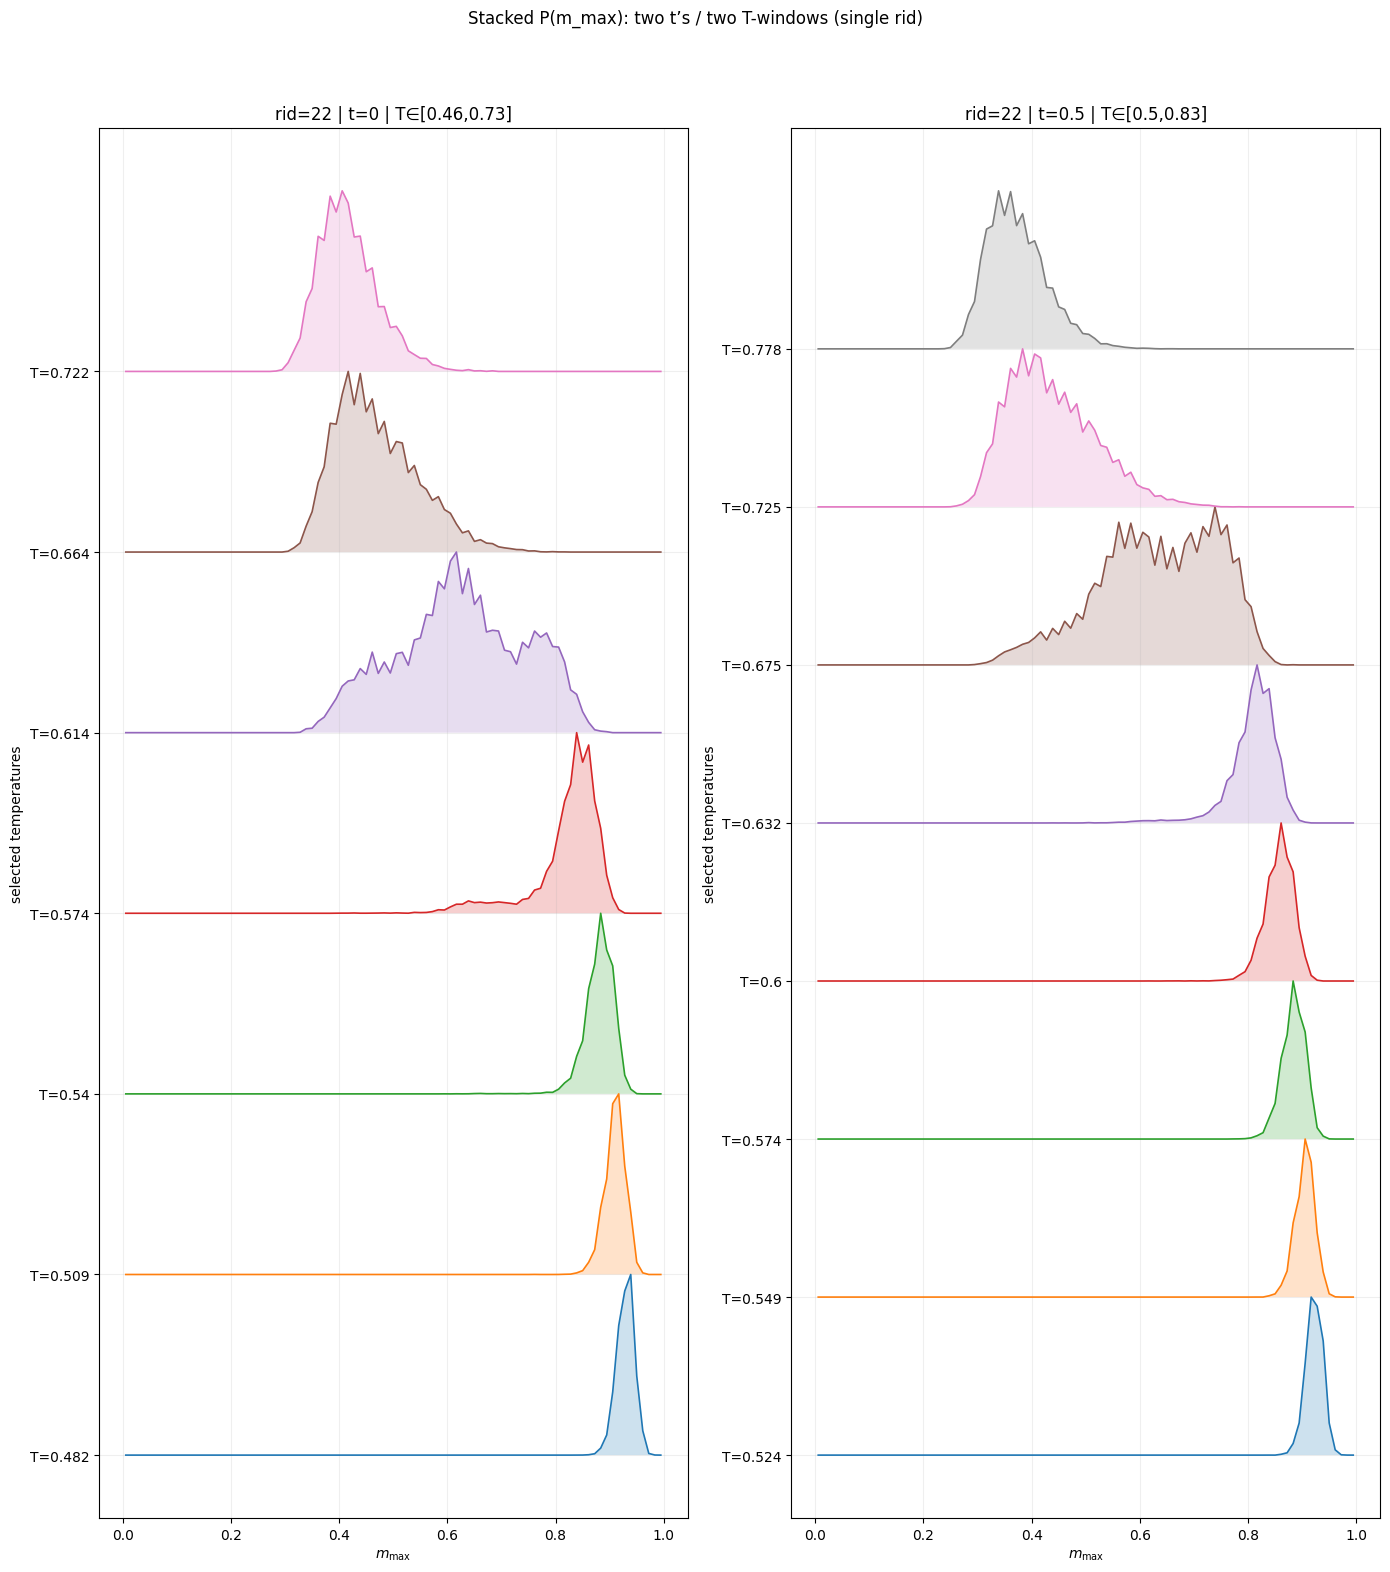

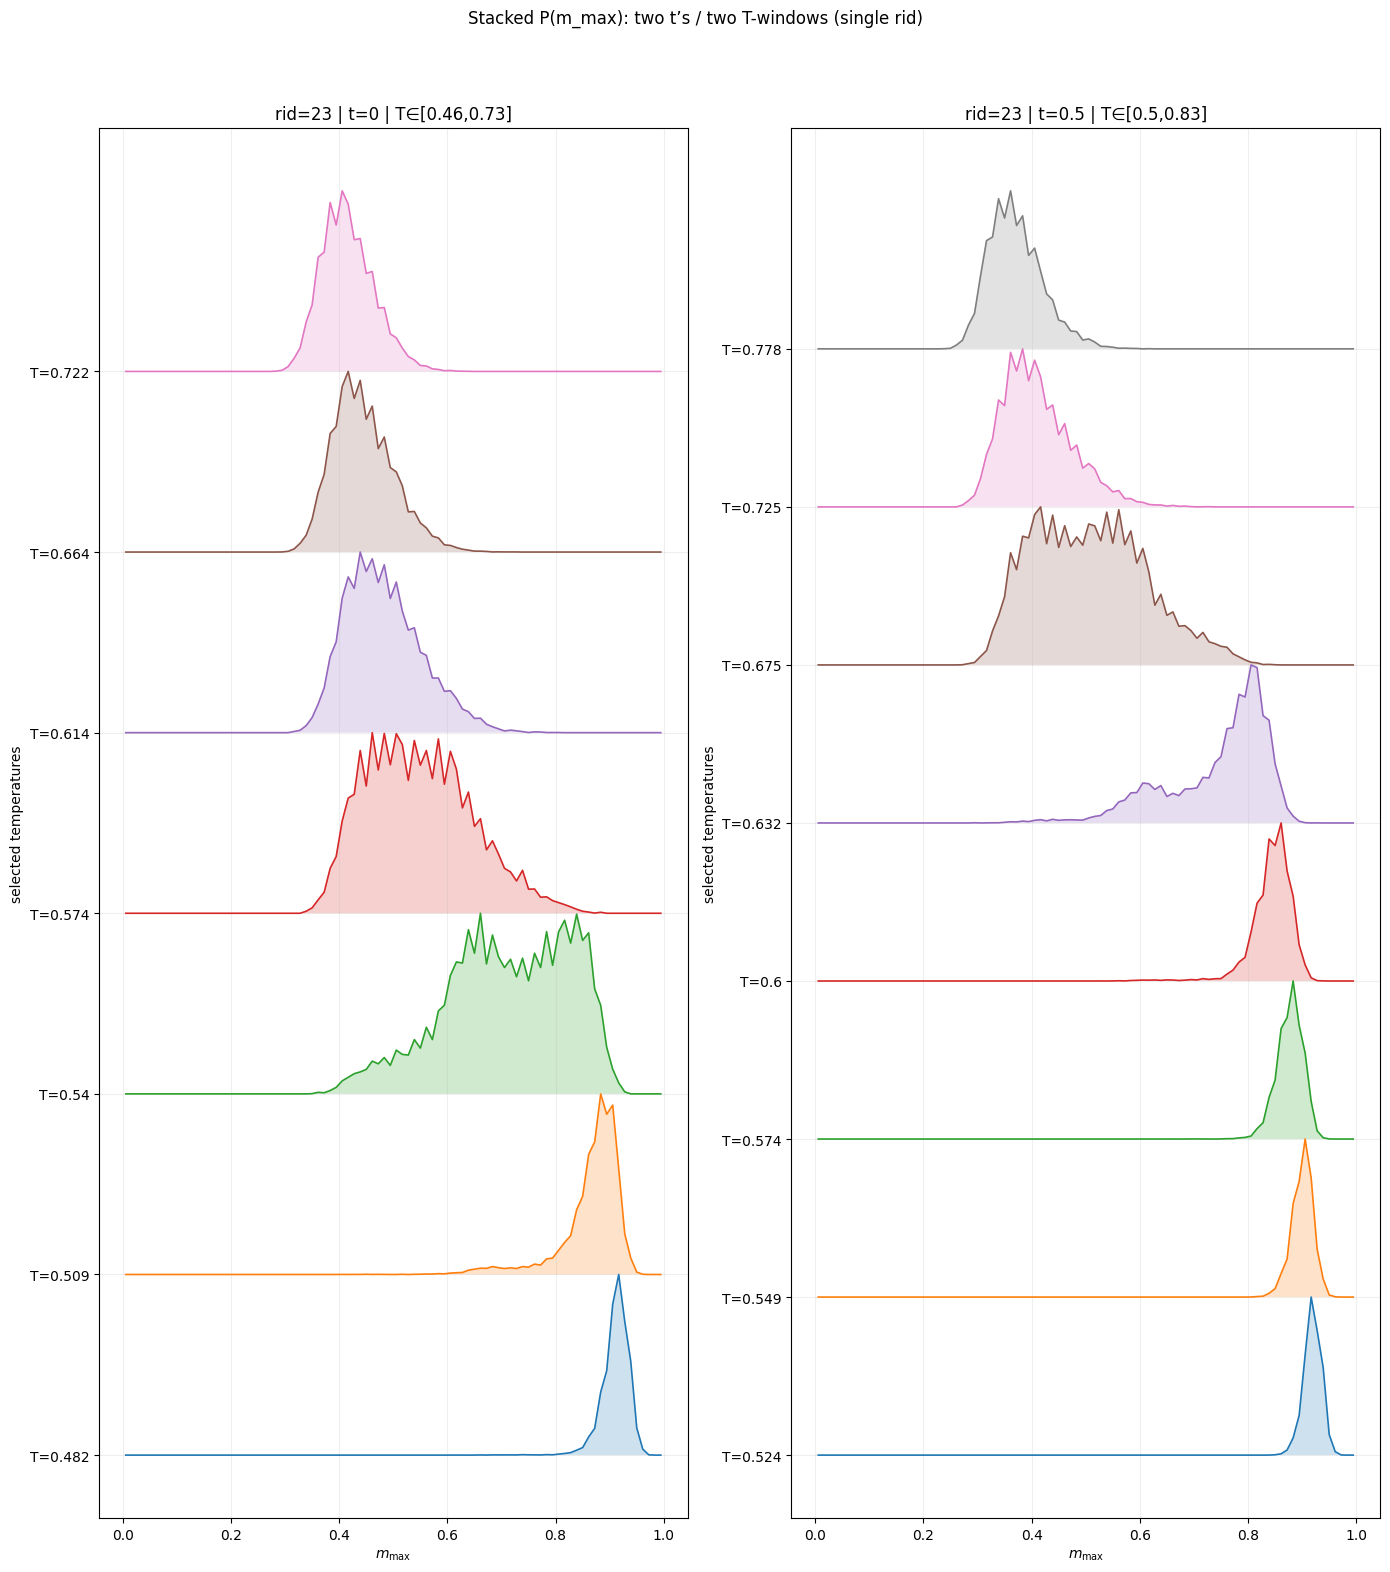

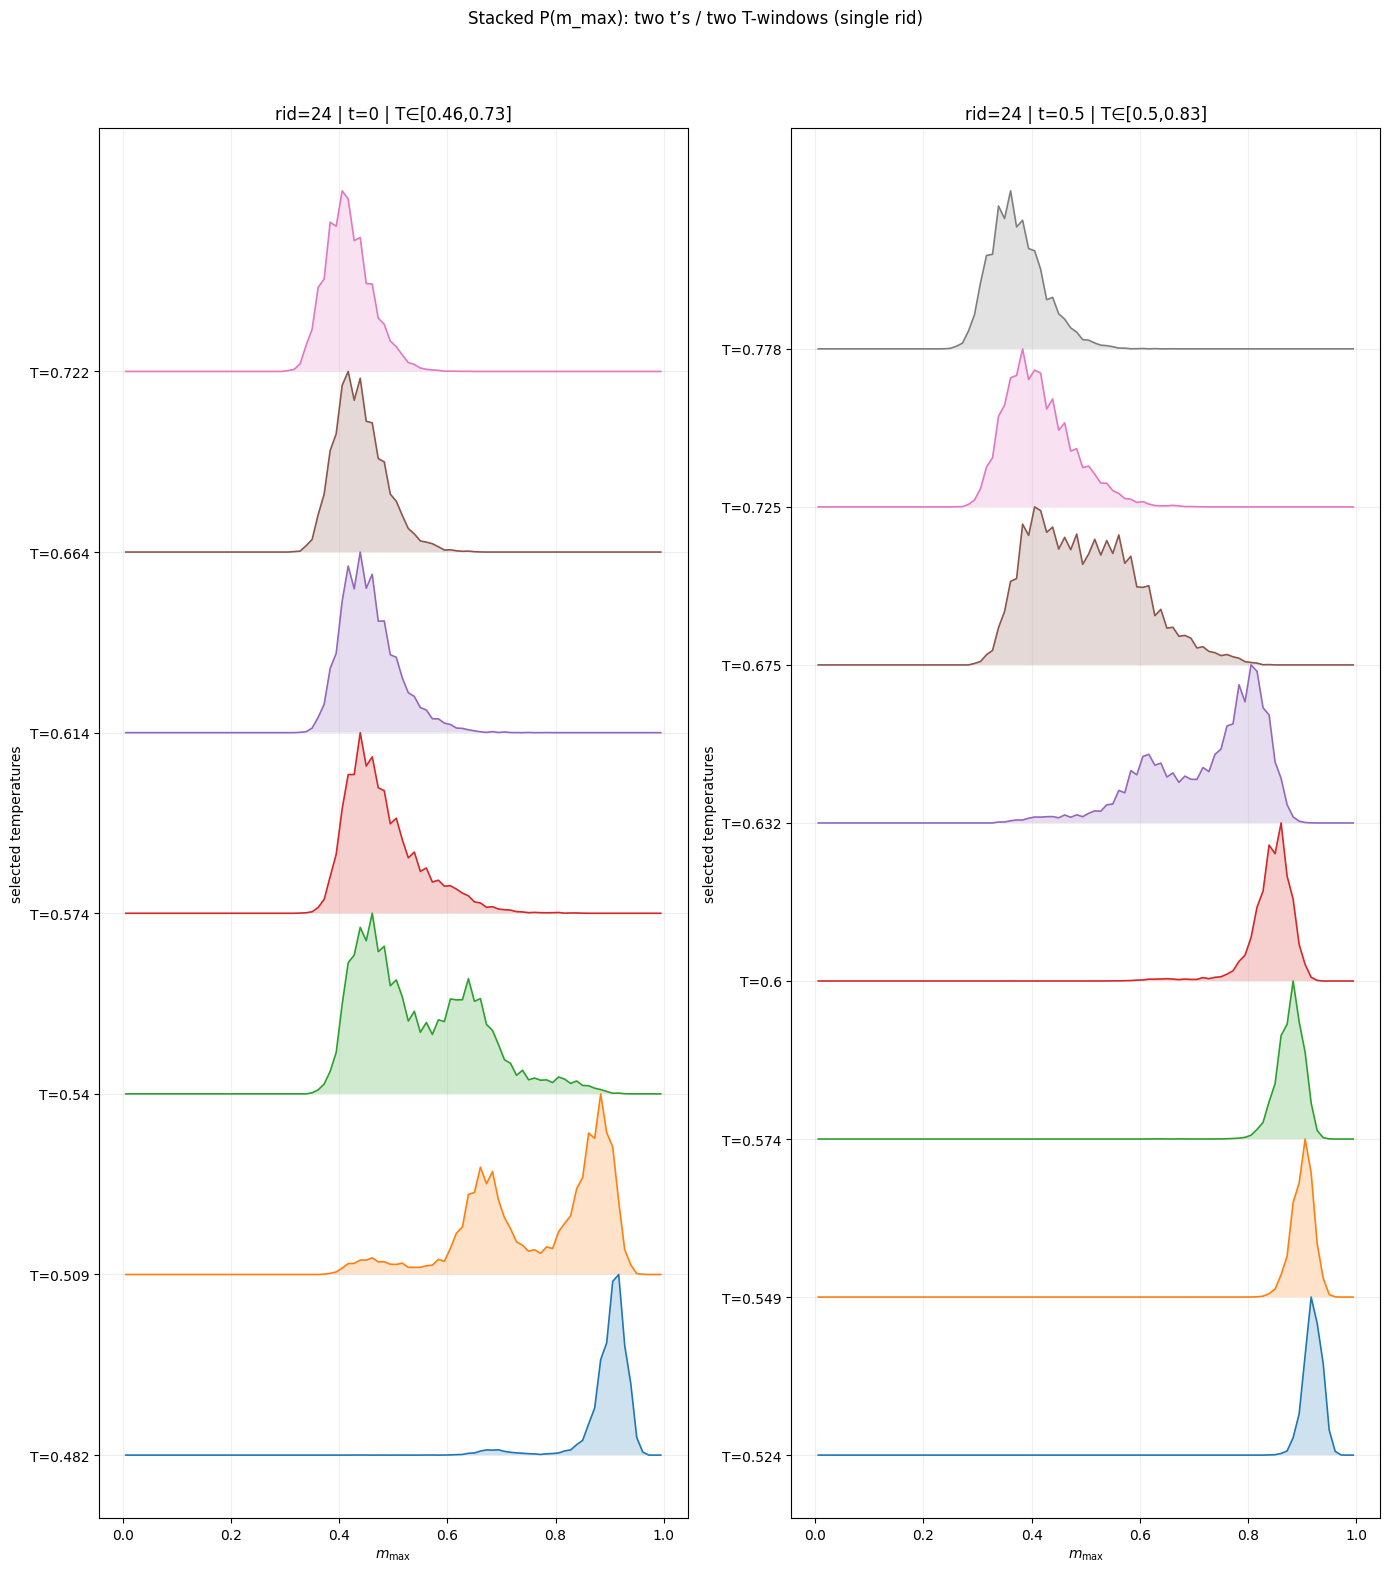

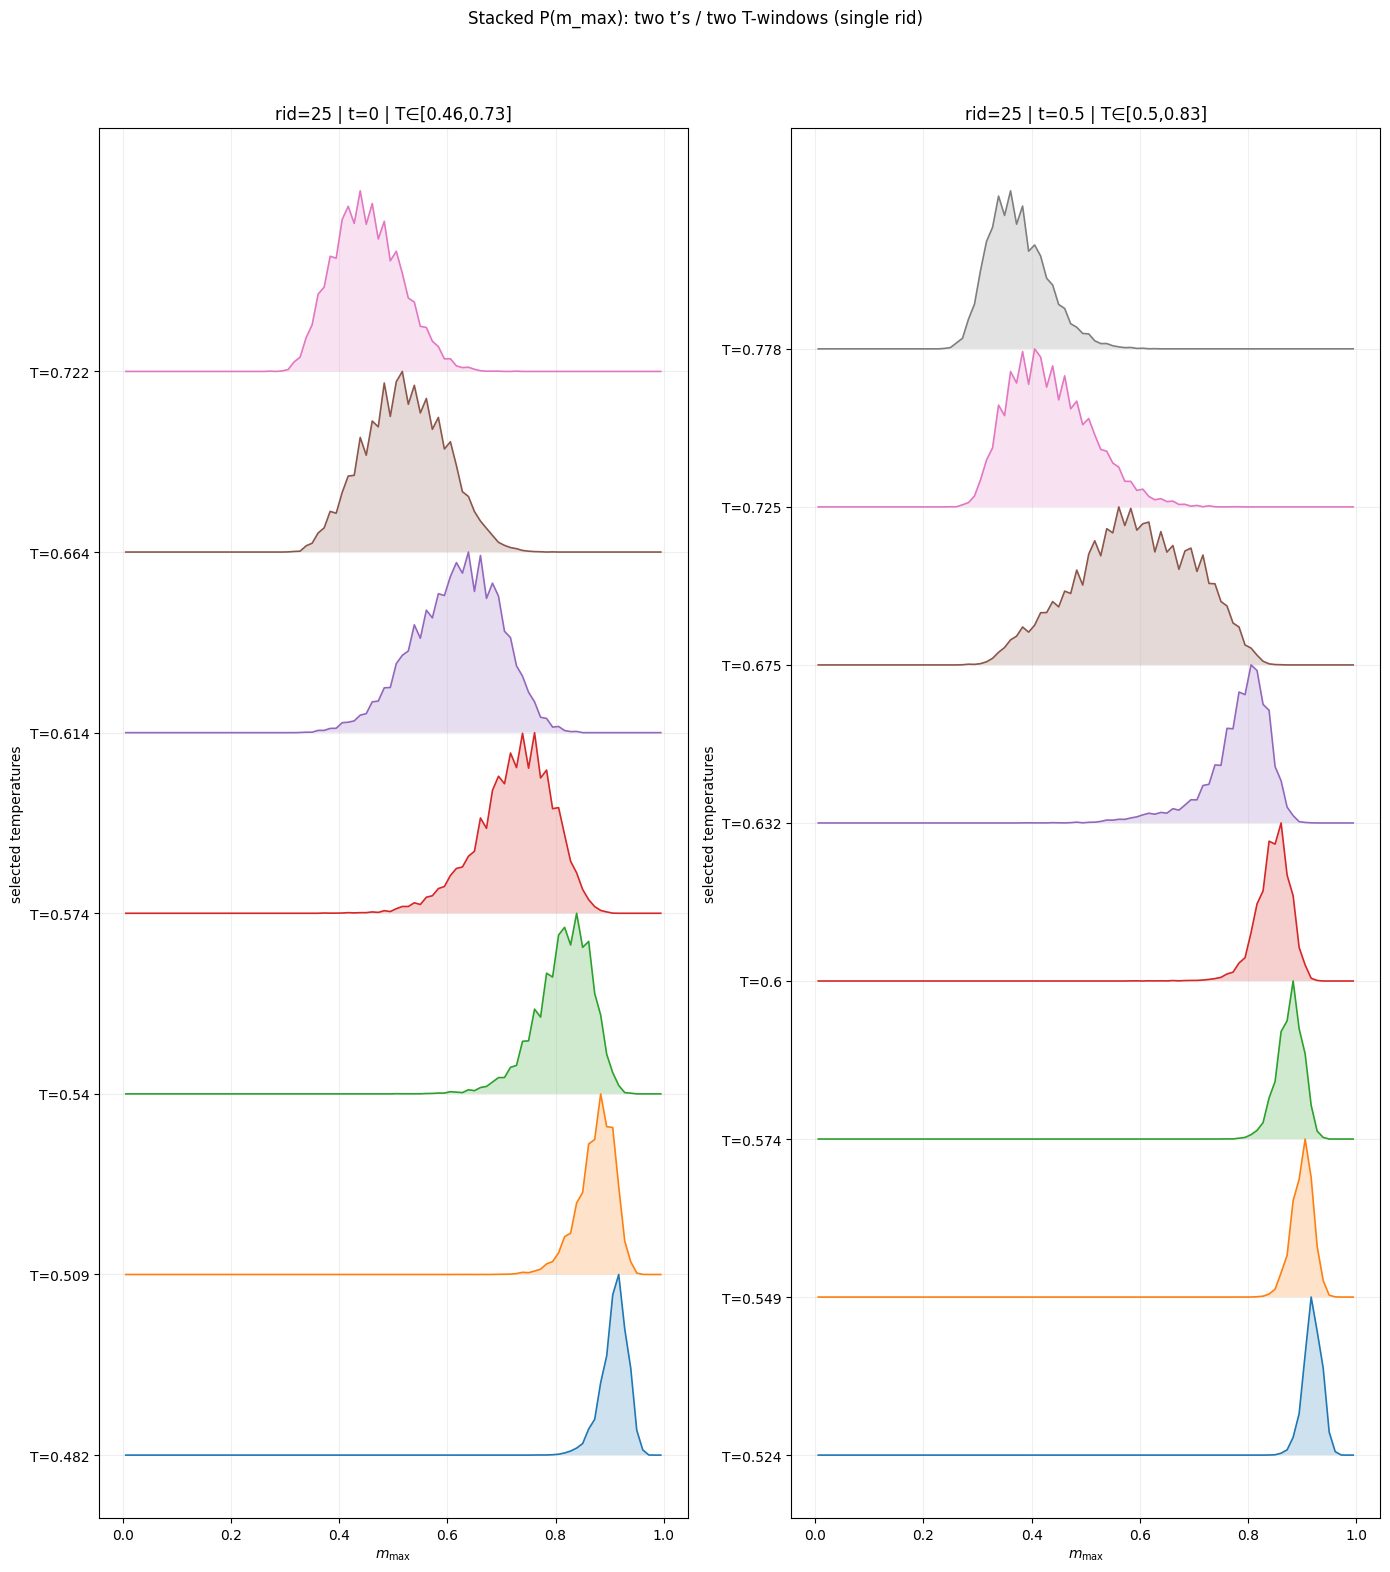

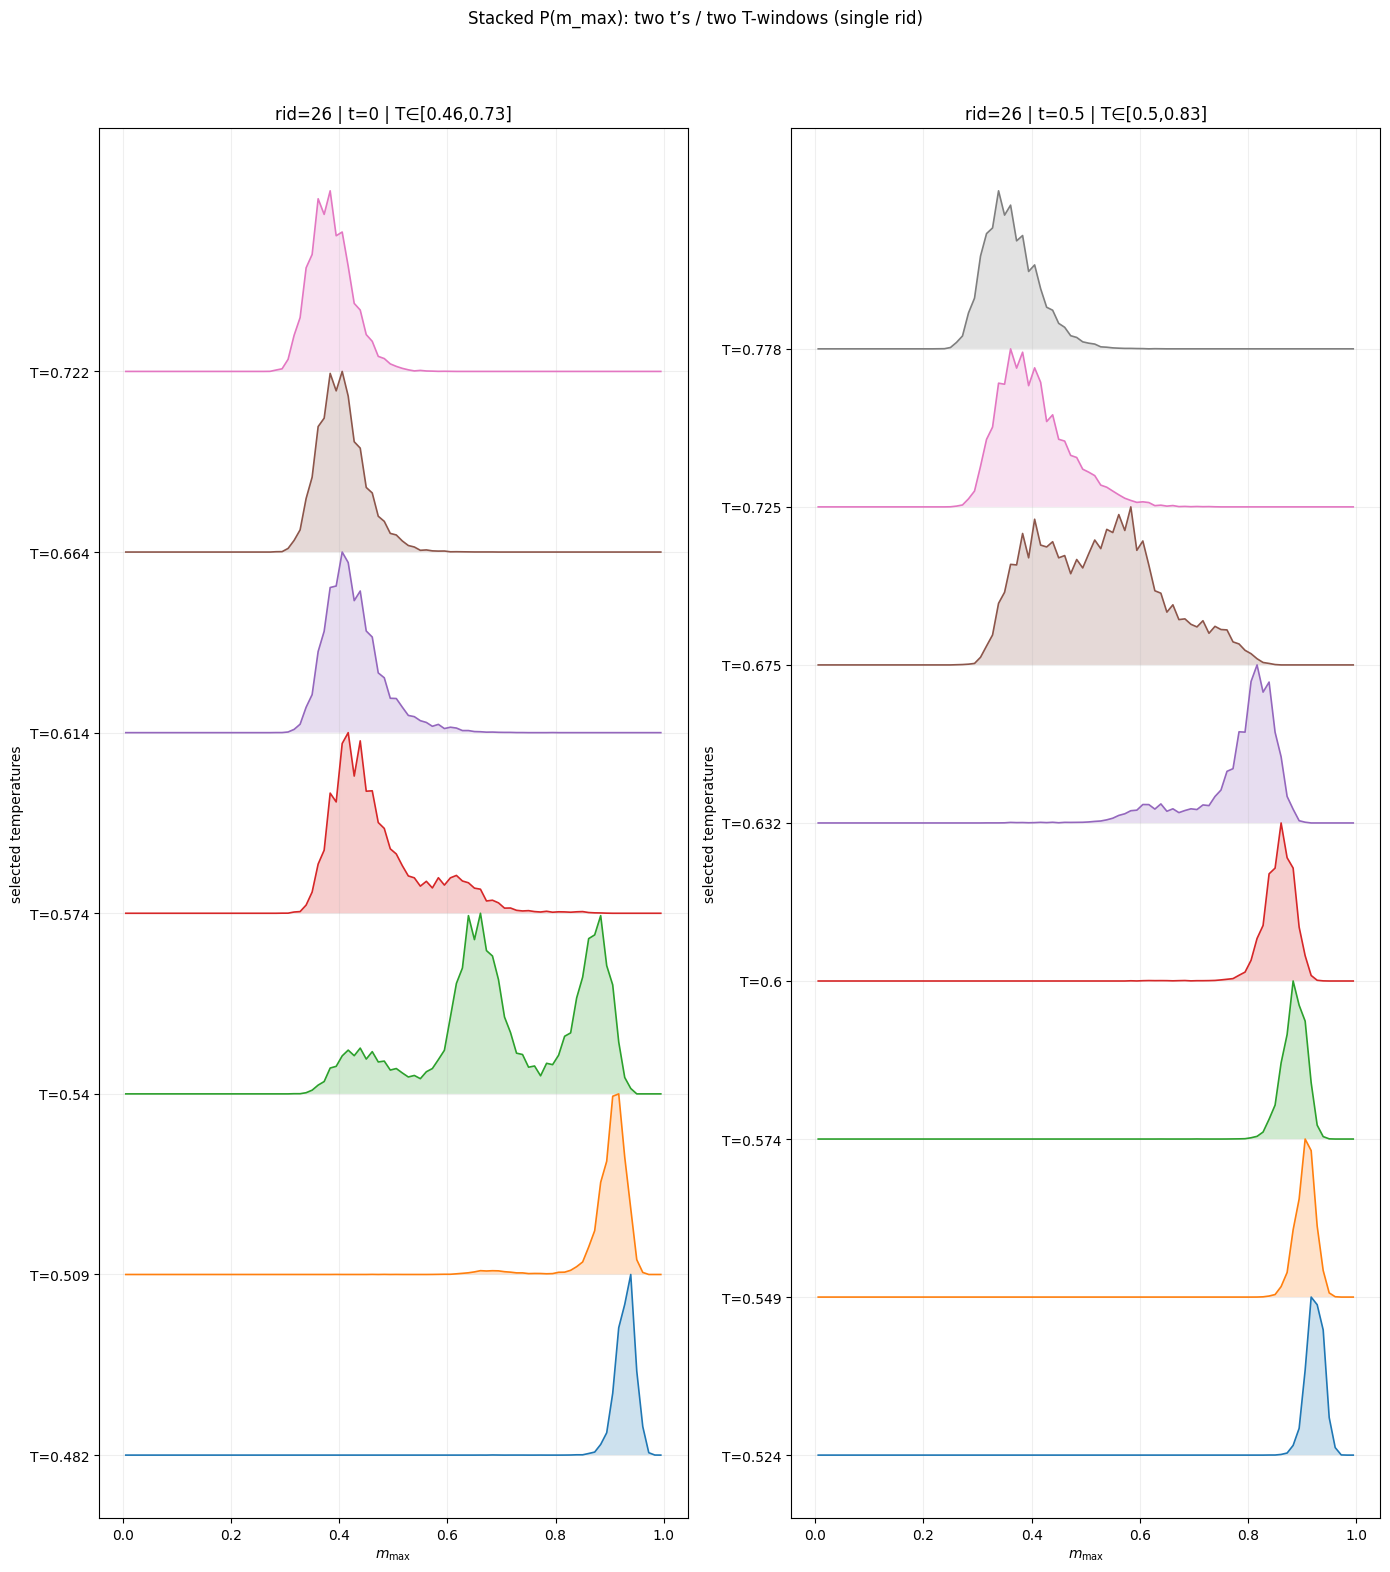

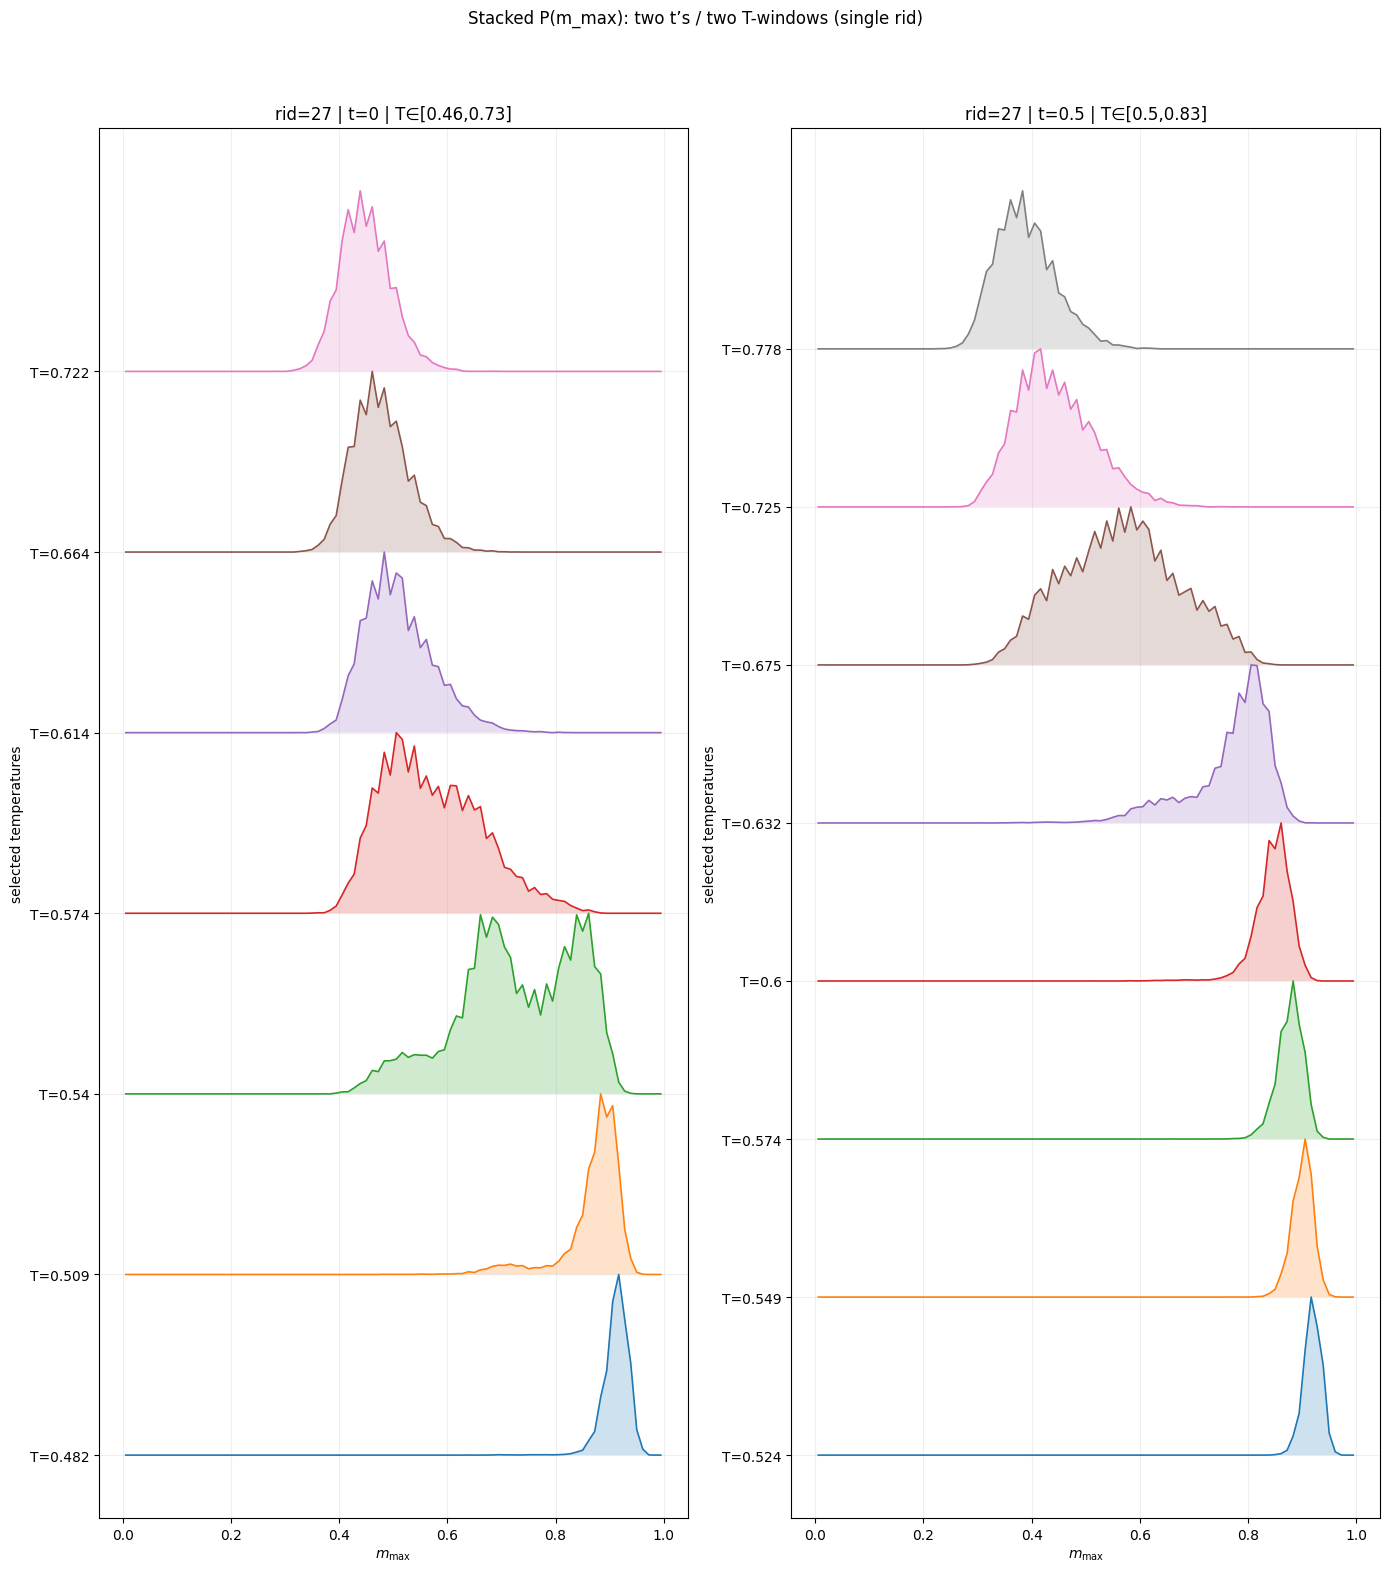

In [8]:

for rid in range(28):
    ax1, ax2 = plot_mmax_stacked_hist_compare_two_t_two_windows_single_rid(
        f, run_root,
        rid=rid,
        t_sel_a=0.0, T_min_a=0.46, T_max_a=0.73,
        t_sel_b=0.5, T_min_b=0.5, T_max_b=0.83,
        burn=0, thin=1,
        bins=90, m_range=(0, 1),
        density=True,
        chain_avg="mean",
        normalize_each=True,
        title="Stacked P(m_max): two t’s / two T-windows (single rid)",
    )


<Axes: title={'center': 'Binder U4(q) (n_disorders=28)'}, xlabel='Temperature T', ylabel='$U_4(q)=1-\\langle q^4\\rangle/(3\\langle q^2\\rangle^2)$'>

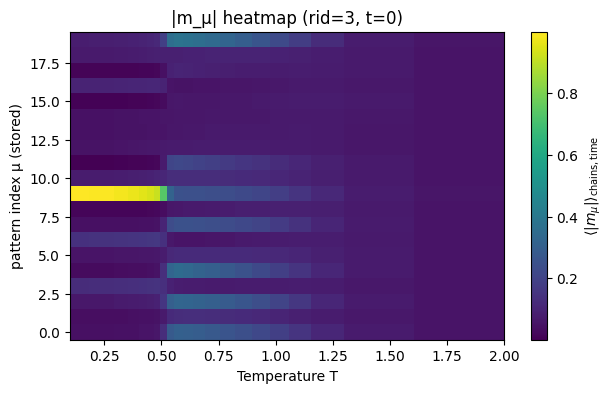

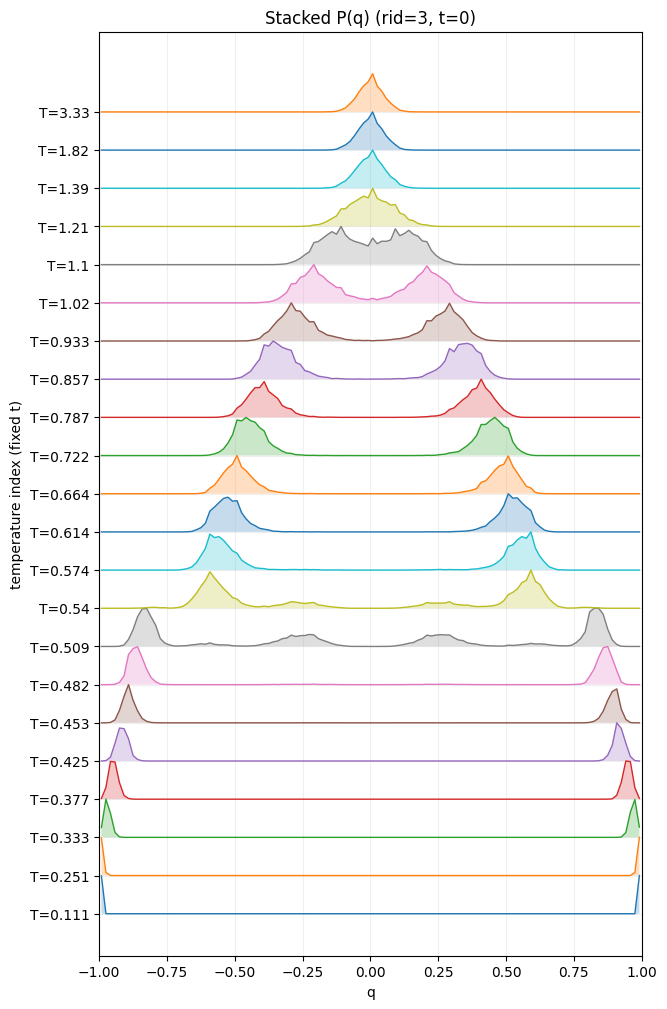

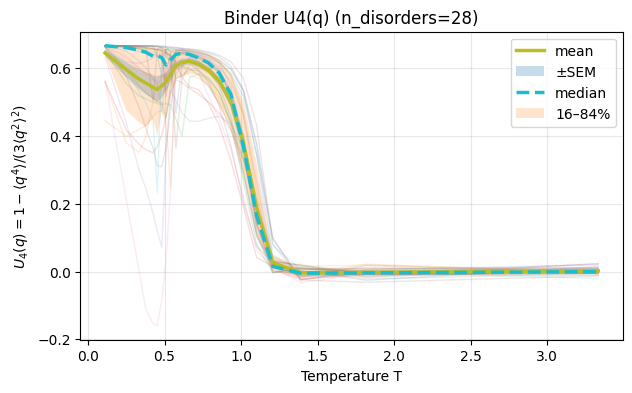

In [6]:
rid = 3
t_sel = 0                           # or t_sel = 2 (index into t_grid)

# 1) |m_mu| heatmap for one disorder
plot_mabs_heatmap(f, run_root, rid=rid, t_sel=t_sel, burn=0, thin=1)

# 2) stacked P(q) for one disorder (fixed t)
plot_Pq_stacked(f, run_root, rid=rid, t_sel=t_sel, burn=0, thin=1, bins=120, q_range=(-1,1))

# 3) Binder U4(q) aggregated across disorders
rids = list(range(32))  # whatever you have
res = analyze_q_binder(f, run_root, rids=rids, t_sel=t_sel, burn=0, thin=1)
plot_q_binder(res)

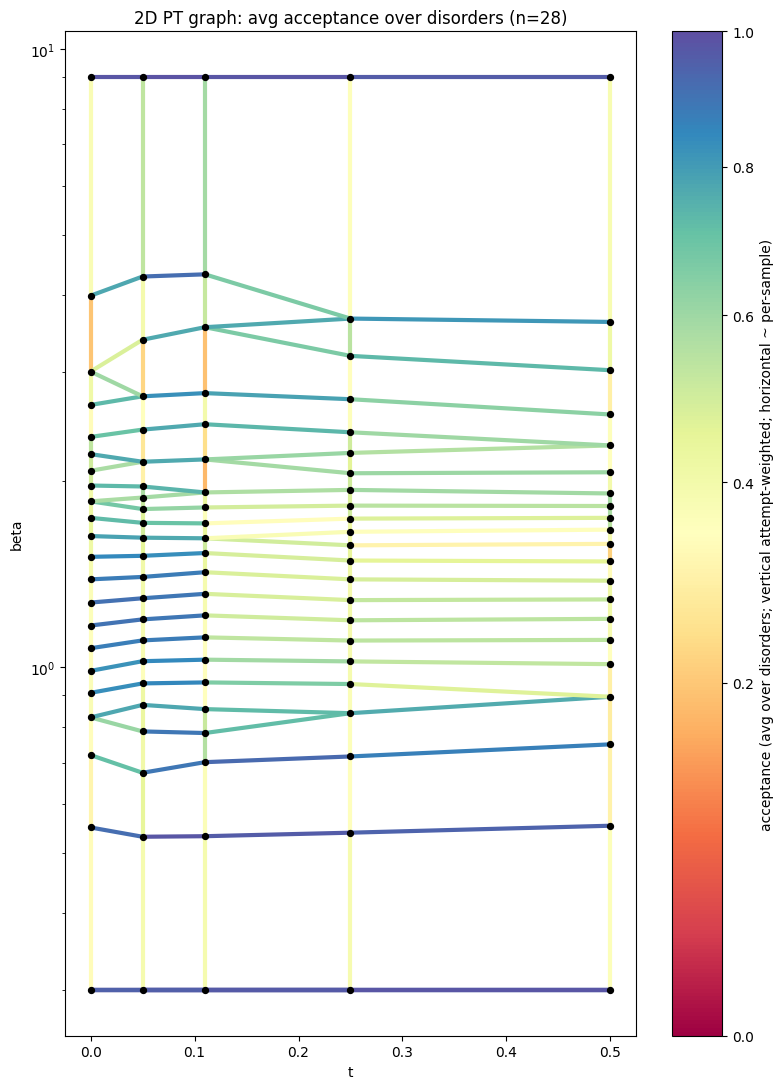

<Axes: title={'center': '2D PT graph: avg acceptance over disorders (n=28)'}, xlabel='t', ylabel='beta'>

In [ ]:

rids = range(0, 28)

plot_pt_graph_avg_acceptance(
    f, run_root, rids=rids,
    y_axis="beta", log_y=True, invert_y_for_T=False,
    gamma=0.75, cmap="Spectral",
)


In [8]:
rid = 0
t_sel = 1
burn = 0
thin = 1

(<Axes: title={'center': 'Pattern/sign switching vs T (rid=0, t=0.05)'}, ylabel='winner switch rate'>,
 <Axes: xlabel='Temperature T', ylabel='winner sign-flip rate'>)

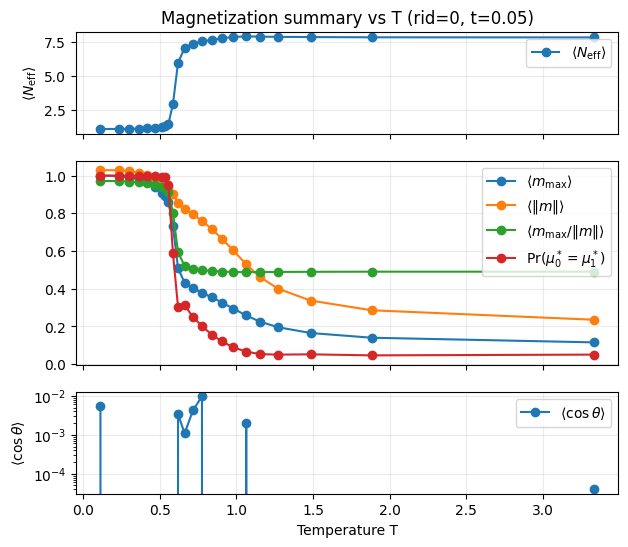

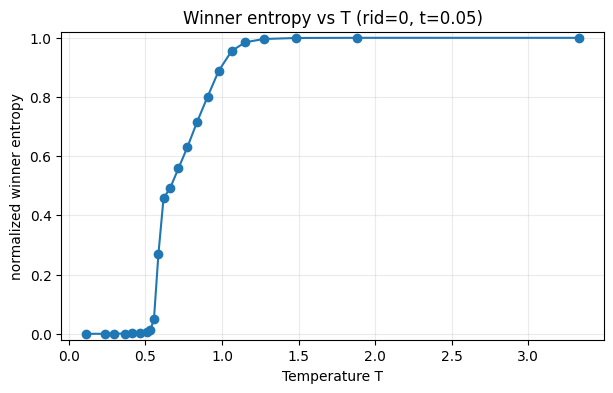

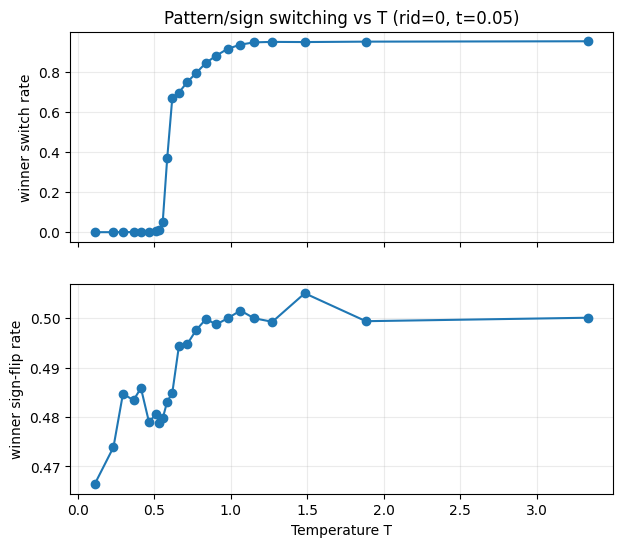

In [9]:
# 1) Summary (now 2 subplots)
plot_m_summary_vs_T(f, run_root, rid=rid, t_sel=t_sel, burn=burn, thin=thin, time_stat="mean")

# 2) Winner entropy
plot_winner_entropy_vs_T(f, run_root, rid=rid, t_sel=t_sel, burn=burn, thin=thin)

# 3) Switching rates (now 2 subplots)
plot_switching_rates_vs_T(f, run_root, rid=rid, t_sel=t_sel, burn=burn, thin=thin)

<Axes: title={'center': 'Stacked P(m_max) (rid=0, t=0.5)'}, xlabel='$m_{\\max}$', ylabel='temperature index (fixed t)'>

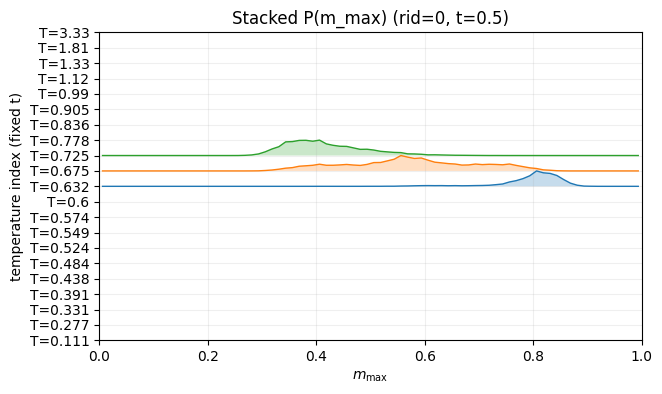

In [15]:
# 4) Heatmap time×T
#plot_mmax_time_T_heatmap(f, run_root, rid=rid, t_sel=t_sel, burn=burn, thin=thin)
t_sel=0.5
# 5) Stacked histograms P(m_max) (control bins + range)
plot_mmax_stacked_hist(f, run_root, rid=rid, t_sel=t_sel, burn=burn, thin=thin, bins=80, m_range=(0, 1),
                       T_range=(10,8))



<Axes: title={'center': 'P(m_max) at (rid=0, t=0.05, k=5, T=0.466)'}, xlabel='$m_{\\max}$', ylabel='density'>

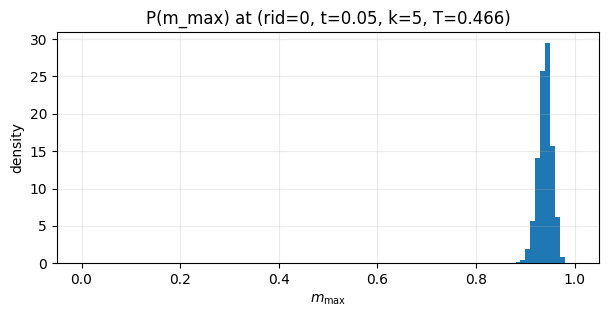

In [11]:
# Extra control at one temperature index k (T sorted ascending in that ladder)
k = 5
plot_mmax_hist_at_k(f, run_root, rid=rid, t_sel=t_sel, k=k, burn=burn, thin=thin, bins=100, m_range=(0, 1))

In [11]:
q_range=(-1, 1)
m_range=(0, 1)
extent = (q_range[0], q_range[1], m_range[0], m_range[1])
extent

(-1, 1, 0, 1)

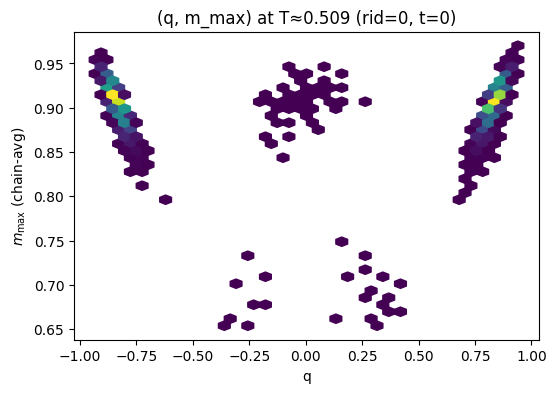

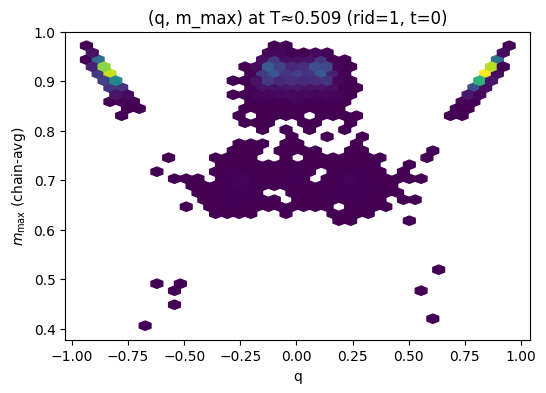

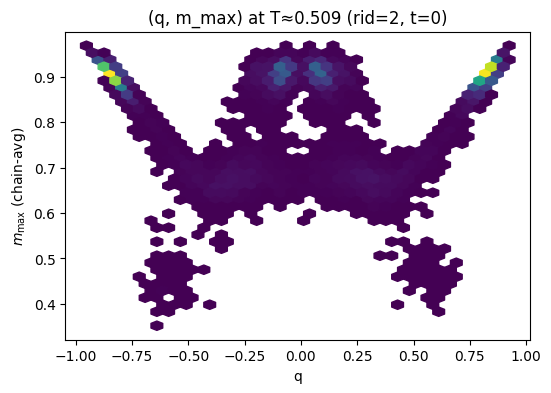

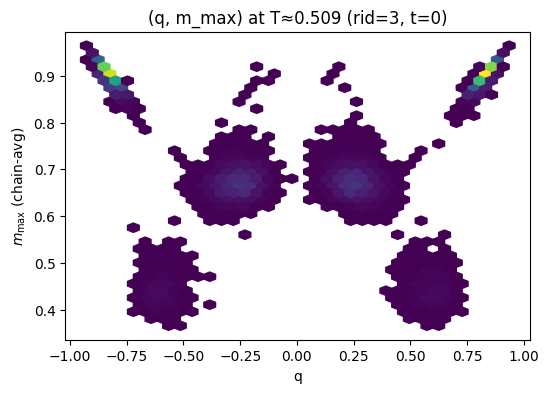

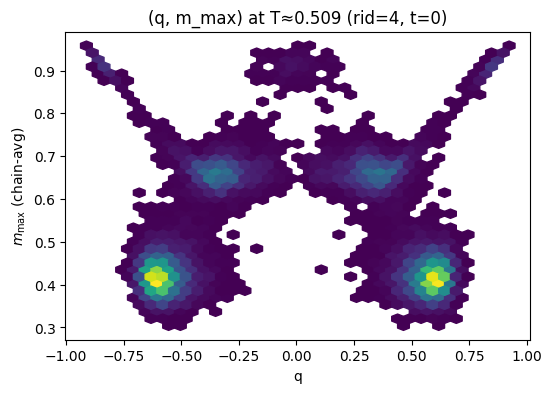

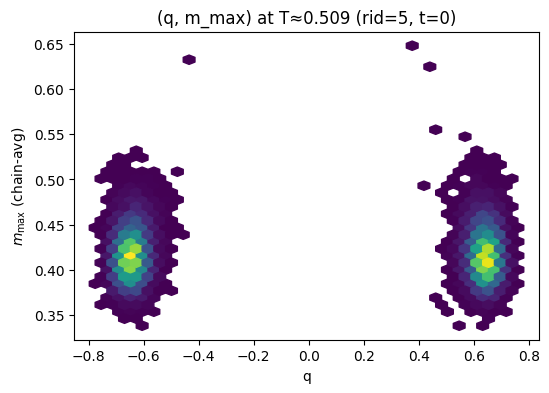

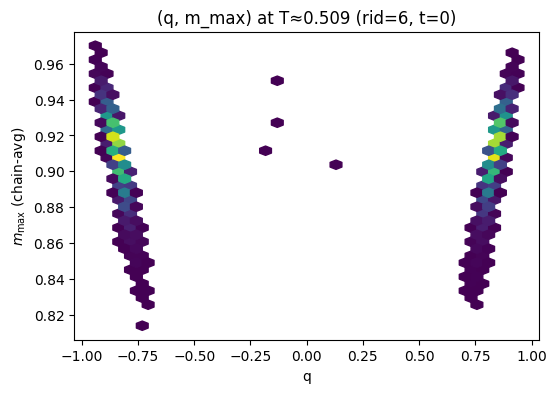

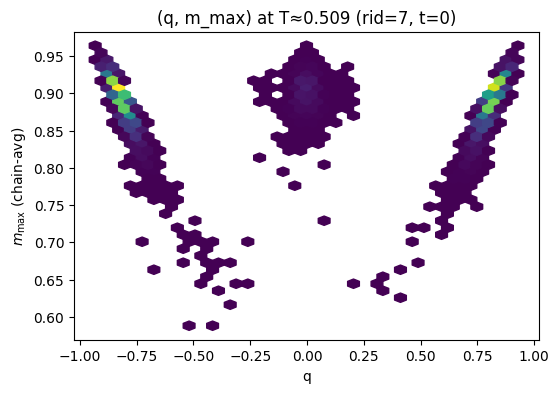

In [12]:
t_sel=0
for rid in range (8):
    # Joint plots at a chosen physical temperature (nearest)
    plot_joint_mmax_q(f, run_root, rid=rid, t_sel=t_sel, T_target=0.5, burn=burn, thin=thin, gridsize=36)
    #plot_joint_mmax_E(f, run_root, rid=rid, t_sel=t_sel, T_target=0.5, burn=burn, thin=thin, gridsize=36)

<Axes: title={'center': 'm_max across disorders (n=28), t = 0.5'}, xlabel='Temperature T', ylabel='$m_{\\max}$ (chain-avg, time-median per rid)'>

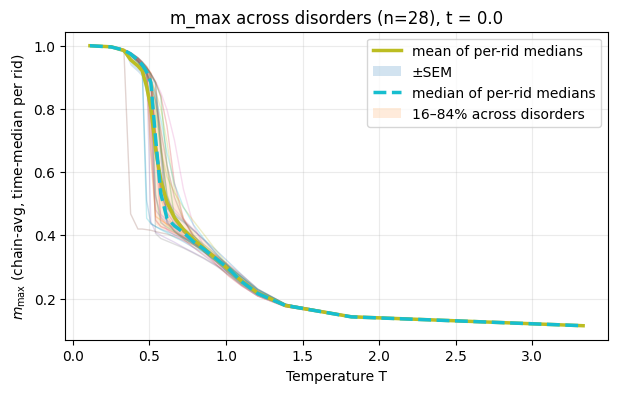

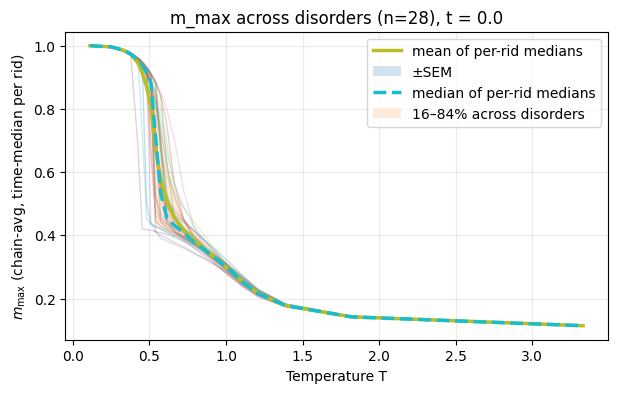

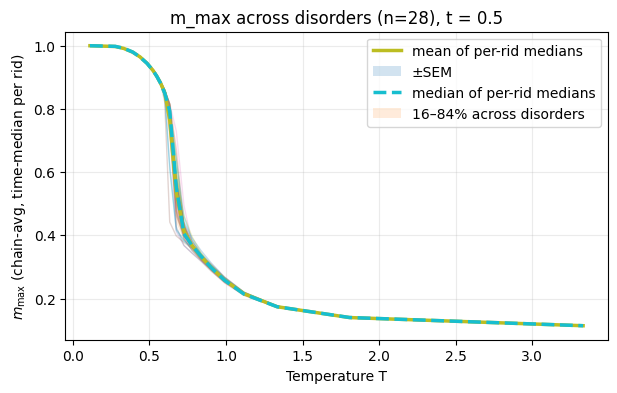

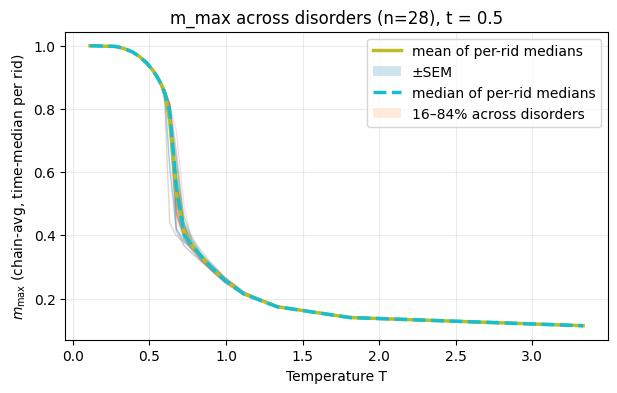

In [10]:
res = analyze_mmax_across_disorders(f, run_root_1d, rids=rids, t_sel=0, burn=0, thin=1)
plot_mmax_across_disorders(res,t_grid[0])
res = analyze_mmax_across_disorders(f, run_root_2d, rids=rids, t_sel=0, burn=0, thin=1)
plot_mmax_across_disorders(res,t_grid[0])
res = analyze_mmax_across_disorders(f, run_root_1d, rids=rids, t_sel=4, burn=0, thin=1)
plot_mmax_across_disorders(res,t_grid[4])
res = analyze_mmax_across_disorders(f, run_root_2d, rids=rids, t_sel=4, burn=0, thin=1)
plot_mmax_across_disorders(res,t_grid[4])

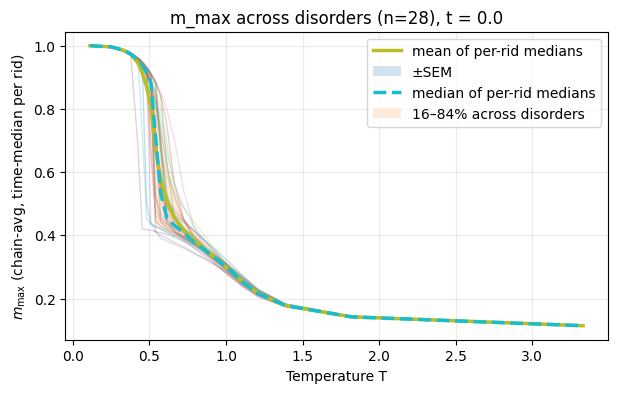

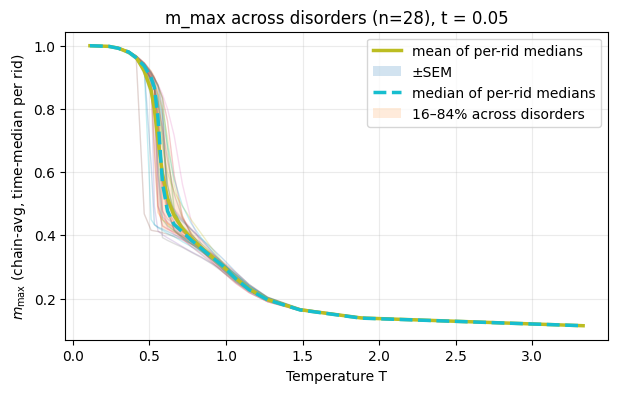

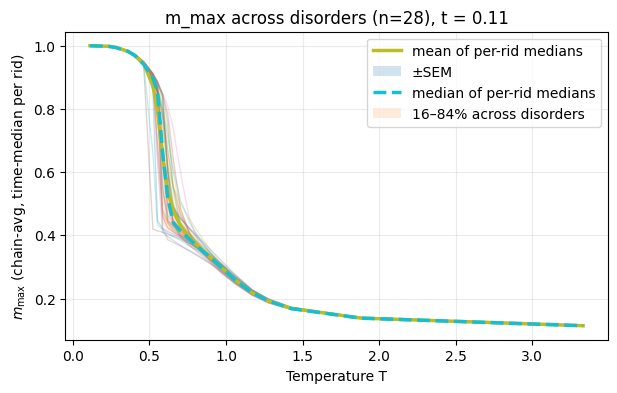

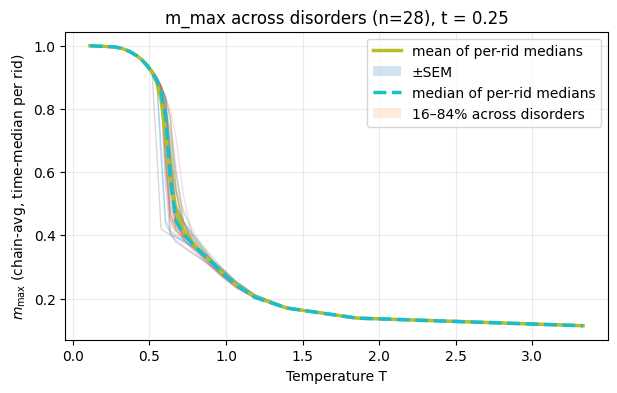

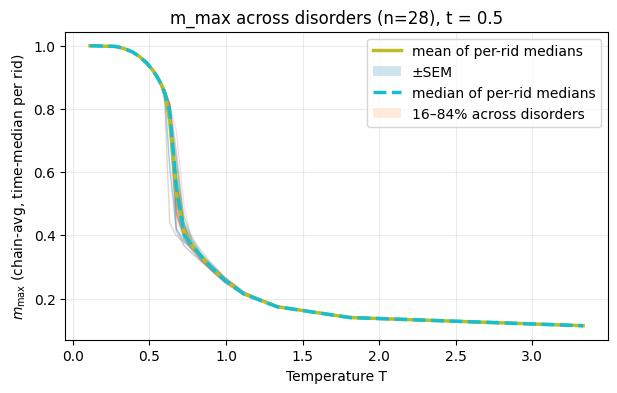

In [9]:
rids = list(range(28))
for b in range (5):
    # Across disorders (robust band)
    res = analyze_mmax_across_disorders(f, run_root, rids=rids, t_sel=b, burn=0, thin=1)
    plot_mmax_across_disorders(res,t_grid[b])



In [6]:

from dreamingnetz.viz import (
    analyze_m_summary_across_disorders, plot_m_summary_vs_T_across_disorders,
    analyze_winner_entropy_across_disorders, plot_winner_entropy_vs_T_across_disorders,
    analyze_switching_rates_across_disorders, plot_switching_rates_vs_T_across_disorders,
    analyze_mmax_hist_across_disorders, plot_mmax_stacked_hist_across_disorders,
    plot_joint_mmax_q_across_disorders_hexbin, plot_joint_mmax_E_across_disorders,
)

rids = list(range(28))
t_sel = 0.
burn = 0
thin = 1


(<Axes: title={'center': 'Magnetization summary across disorders (n=28)'}, ylabel='$\\langle N_{\\mathrm{eff}}\\rangle$'>,
 <Axes: xlabel='Temperature T'>)

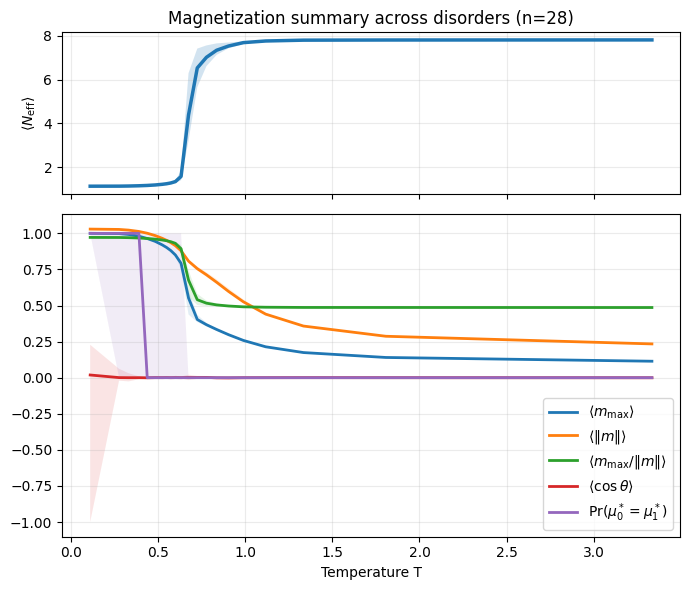

In [15]:

# 1) Summary across disorders
res_sum = analyze_m_summary_across_disorders(f, run_root, rids=rids, t_sel=t_sel, burn=burn, thin=thin, time_stat="median")
plot_m_summary_vs_T_across_disorders(res_sum, show_individual=False)


<Axes: title={'center': 'Winner entropy across disorders (n=28)'}, xlabel='Temperature T', ylabel='normalized winner entropy'>

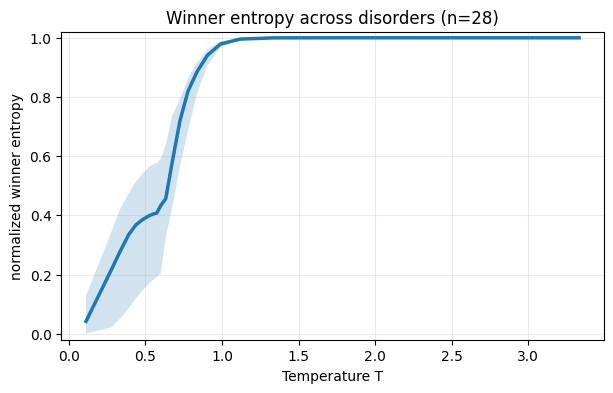

In [16]:

# 2) Winner entropy across disorders
res_ent = analyze_winner_entropy_across_disorders(f, run_root, rids=rids, t_sel=t_sel, burn=burn, thin=thin, alpha_smooth=0.5)
plot_winner_entropy_vs_T_across_disorders(res_ent, show_individual=False)


(<Axes: title={'center': 'Switching rates across disorders (n=28)'}, ylabel='winner switch rate'>,
 <Axes: xlabel='Temperature T', ylabel='winner sign-flip rate'>)

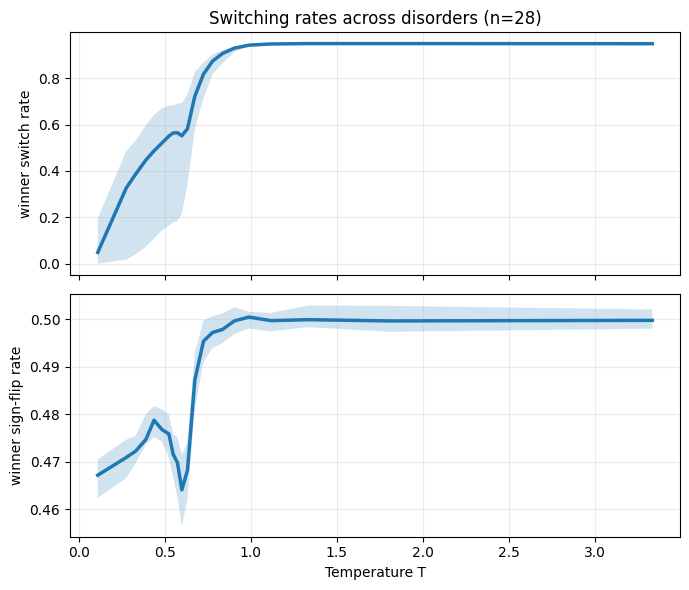

In [ ]:
# 3) Switching rates across disorders
res_sw = analyze_switching_rates_across_disorders(f, run_root, rids=rids, t_sel=t_sel, burn=burn, thin=thin)
plot_switching_rates_vs_T_across_disorders(res_sw, show_individual=False)

<Axes: title={'center': 'Stacked P(m_max) across disorders (n=28)'}, xlabel='$m_{\\max}$', ylabel='temperature index (fixed t)'>

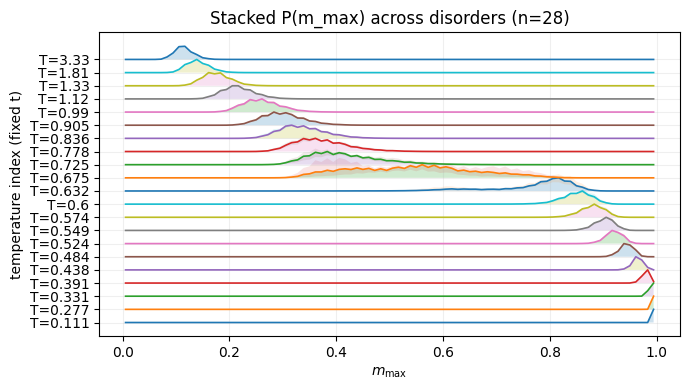

In [14]:
# 4) Stacked P(m_max) across disorders (control bins/range)
res_h = analyze_mmax_hist_across_disorders(f, run_root, rids=rids, t_sel=t_sel, burn=burn, thin=thin, bins=90, m_range=(0,1))
plot_mmax_stacked_hist_across_disorders(res_h, normalize_each=True, show_band=True)

<Axes: title={'center': 'Stacked P(m_max) across disorders (agg=mean, n=28, T∈[0.48,0.618])'}, xlabel='$m_{\\max}$', ylabel='selected temperatures (fixed t)'>

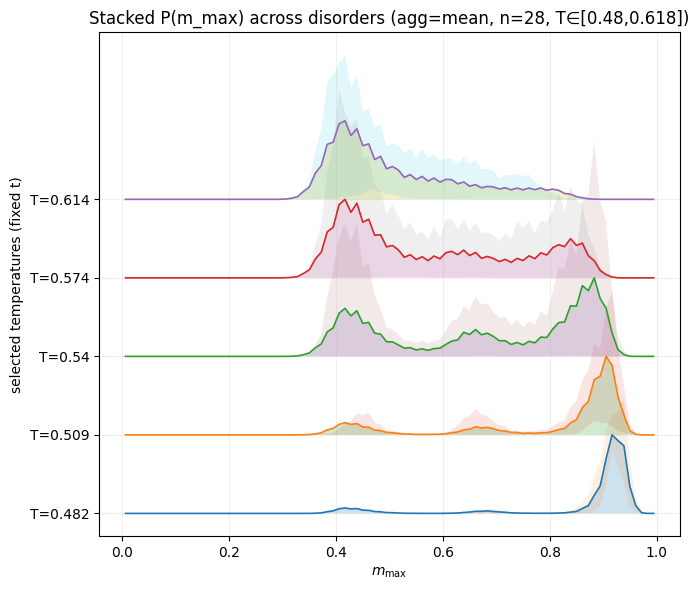

In [ ]:
from dreamingnetz.data_extraction import f
from dreamingnetz.viz import (
    analyze_mmax_hist_across_disorders_Twindow,
    plot_mmax_stacked_hist_across_disorders_Twindow,
)
rids = list(range(28))
t_sel = 0


res_h = analyze_mmax_hist_across_disorders_Twindow(
    f, run_root,
    rids=rids, t_sel=t_sel,
    T_min=0.48, T_max=0.618,      # pick your window
    burn=0, thin=1,
    bins=90, m_range=(0,1),
    density=True,
    chain_avg="mean",
    agg="mean",              # or "mean"
)


<Axes: title={'center': 'Stacked P(m_max) across disorders (agg=mean, n=28, T∈[0.48,0.618])'}, xlabel='$m_{\\max}$', ylabel='selected temperatures (fixed t)'>

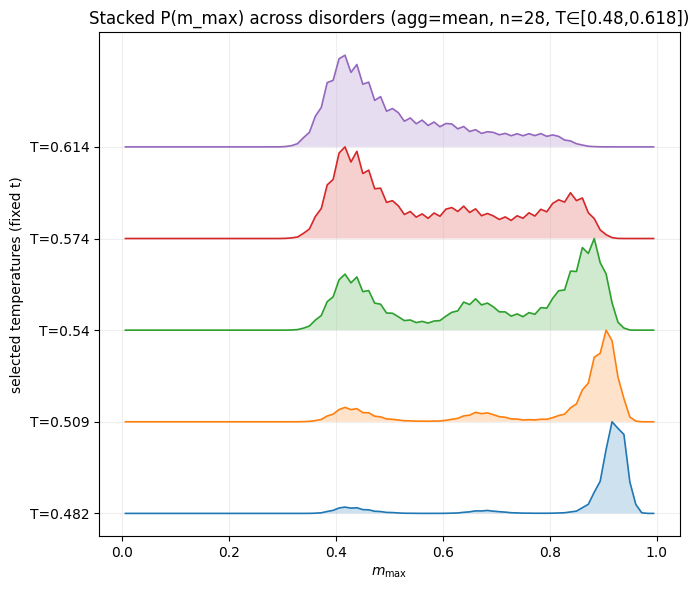

In [11]:
plot_mmax_stacked_hist_across_disorders_Twindow(res_h, normalize_each=True, show_band=False)

In [14]:
t_sel = 0.5


res_h = analyze_mmax_hist_across_disorders_Twindow(
    f, run_root,
    rids=rids, t_sel=t_sel,
    T_min=0.59, T_max=0.818,      # pick your window
    burn=0, thin=1,
    bins=90, m_range=(0,1),
    density=True,
    chain_avg="mean",
    agg="mean",              # or "mean"
)

<Axes: title={'center': 'Stacked P(m_max) across disorders (agg=mean, n=28, T∈[0.59,0.818])'}, xlabel='$m_{\\max}$', ylabel='selected temperatures (fixed t)'>

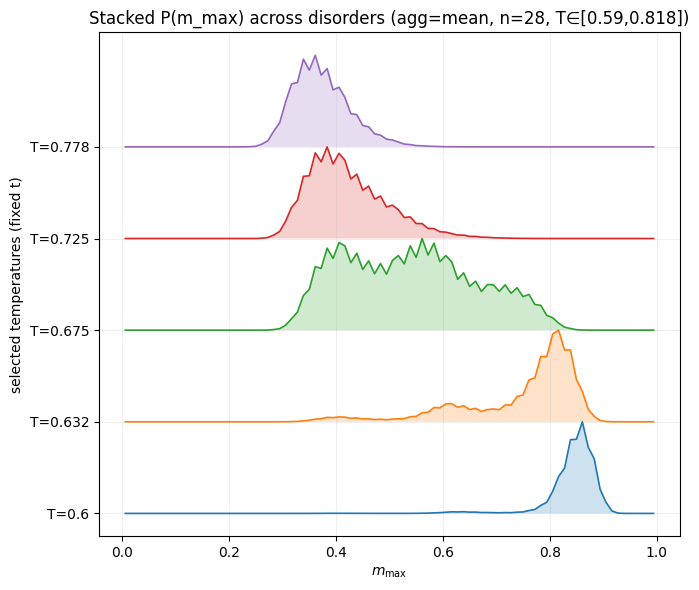

In [15]:
plot_mmax_stacked_hist_across_disorders_Twindow(res_h, normalize_each=True, show_band=False)

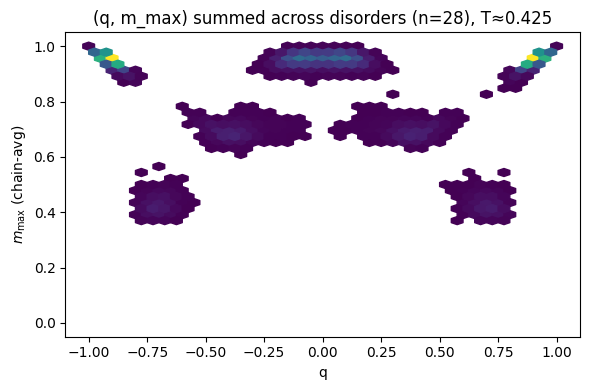

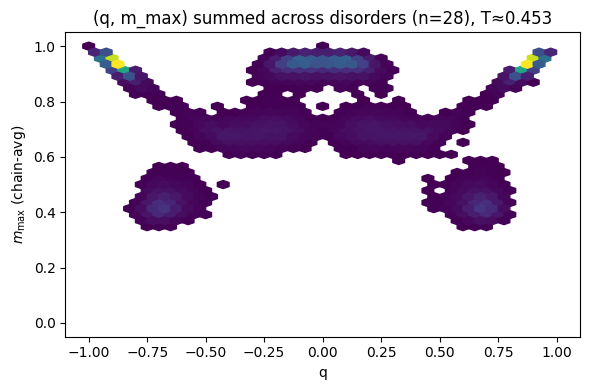

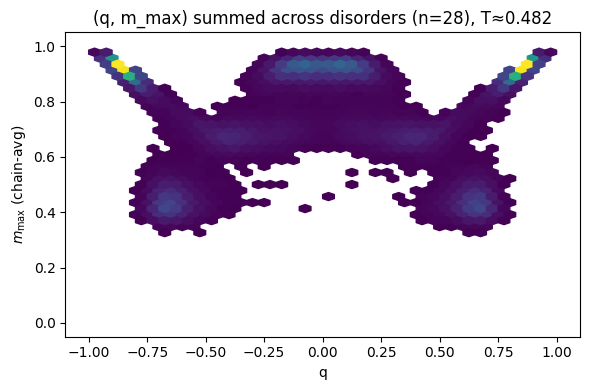

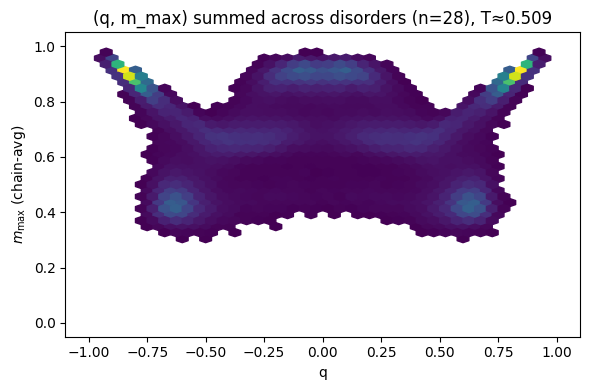

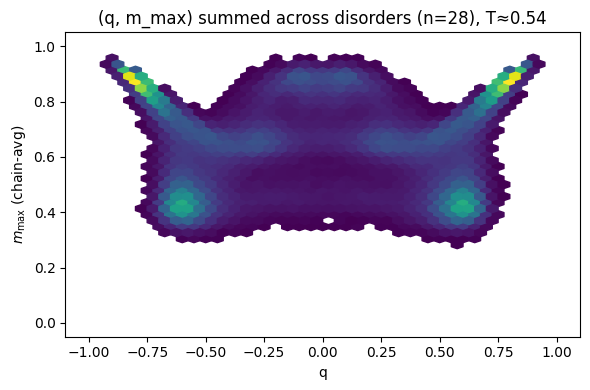

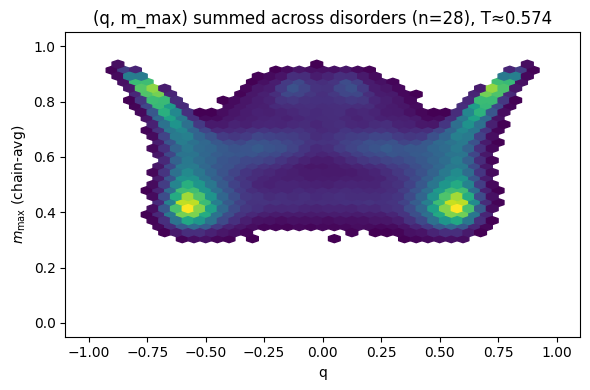

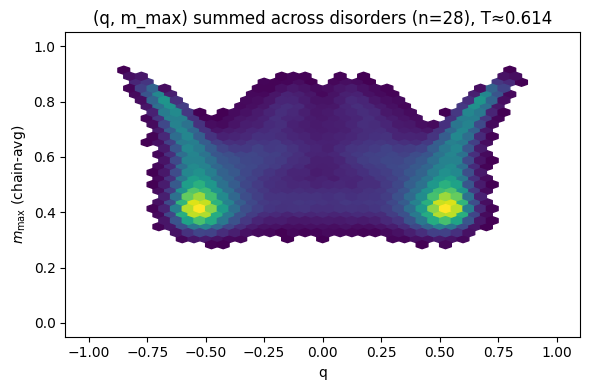

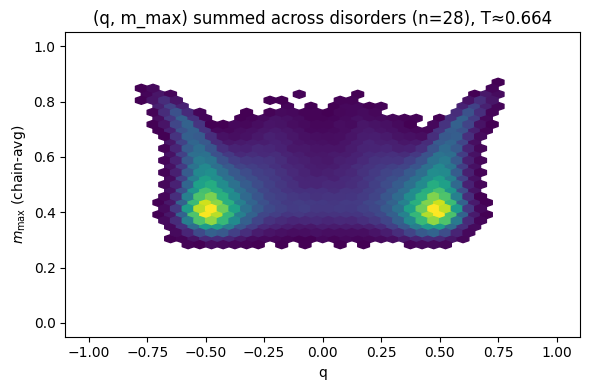

In [7]:
k=0
t_sel=0
for k in range(4,12):
    plot_joint_mmax_q_across_disorders_hexbin(
        f, run_root, rids=rids, t_sel=t_sel,
        k=k,
        gridsize=40,
        q_range=(-1,1), m_range=(0,1),
        burn=burn, thin=thin,
        per_rid_max_points=30000,  # equalize disorder weights
        mincnt=1,
    )

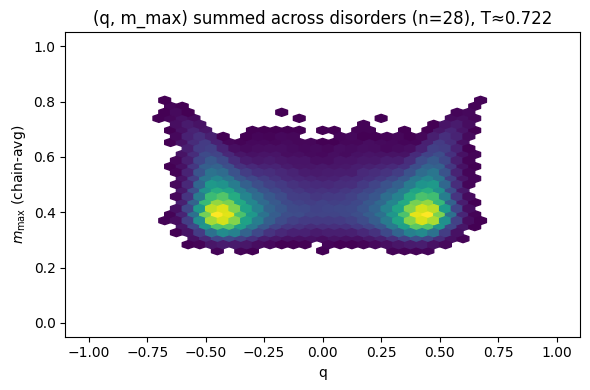

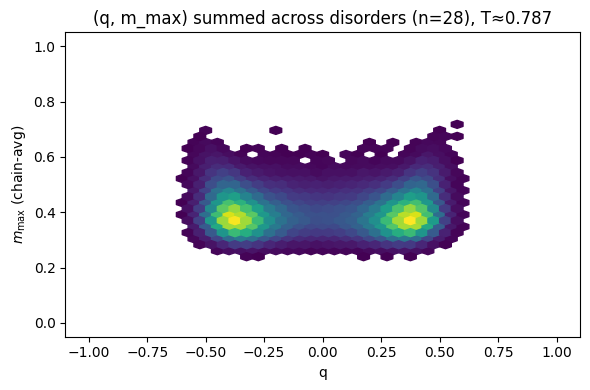

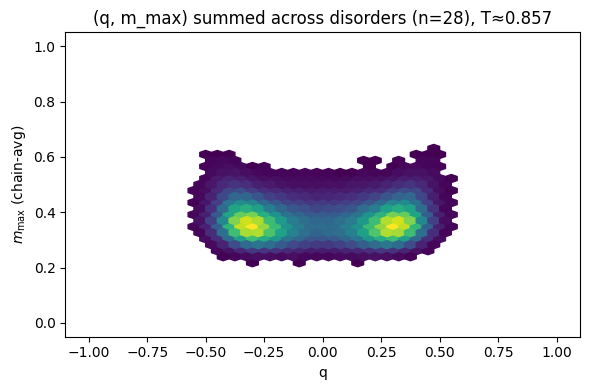

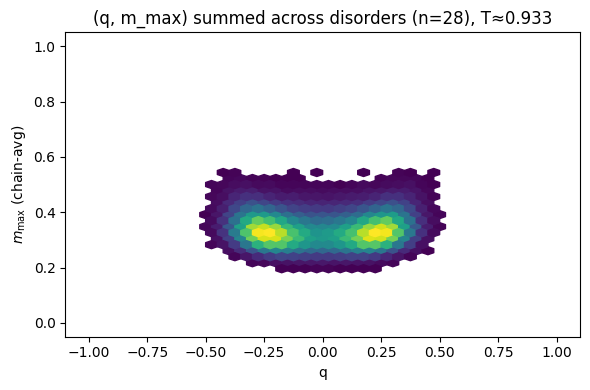

In [10]:
k=0
t_sel=0
for k in range(12,16):
    plot_joint_mmax_q_across_disorders_hexbin(
        f, run_root, rids=rids, t_sel=t_sel,
        k=k,
        gridsize=40,
        q_range=(-1,1), m_range=(0,1),
        burn=burn, thin=thin,
        per_rid_max_points=30000,  # equalize disorder weights
        mincnt=1,
    )

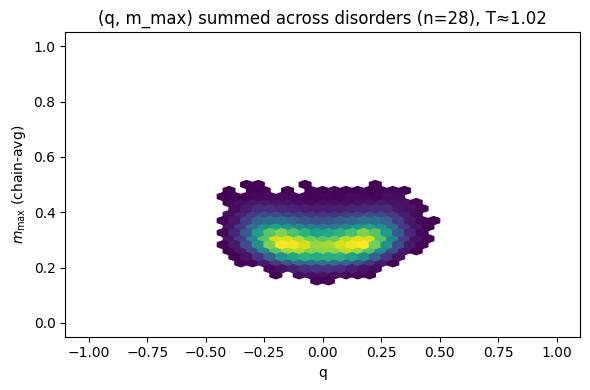

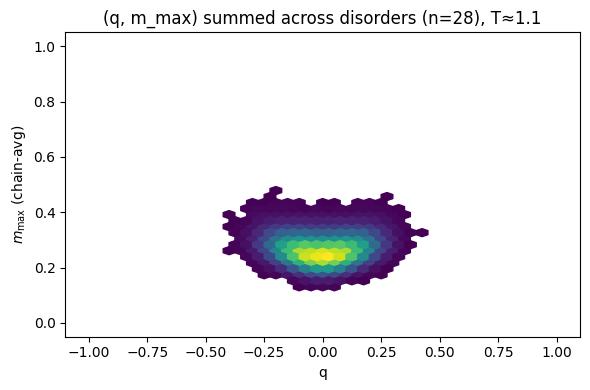

In [11]:
k=0
t_sel=0
for k in range(16,18):
    plot_joint_mmax_q_across_disorders_hexbin(
        f, run_root, rids=rids, t_sel=t_sel,
        k=k,
        gridsize=40,
        q_range=(-1,1), m_range=(0,1),
        burn=burn, thin=thin,
        per_rid_max_points=30000,  # equalize disorder weights
        mincnt=1,
    )

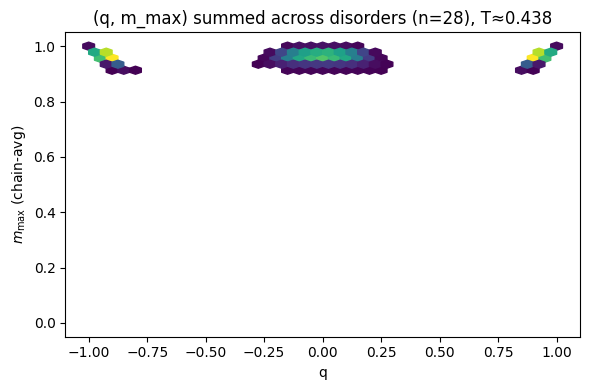

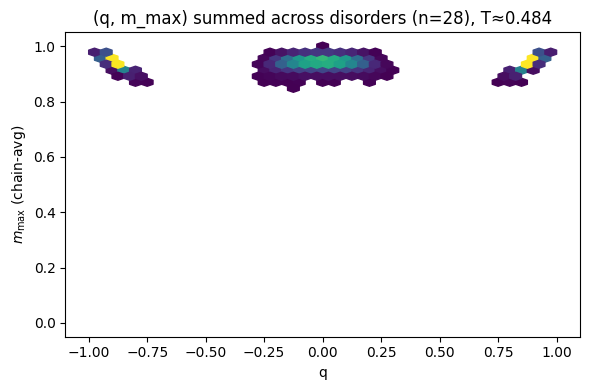

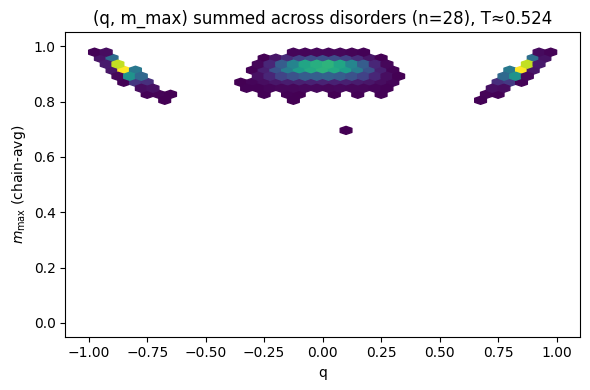

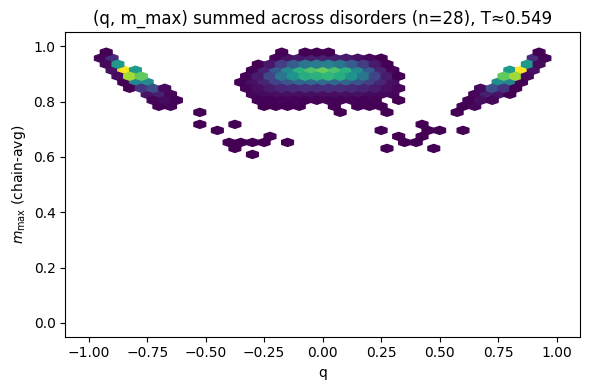

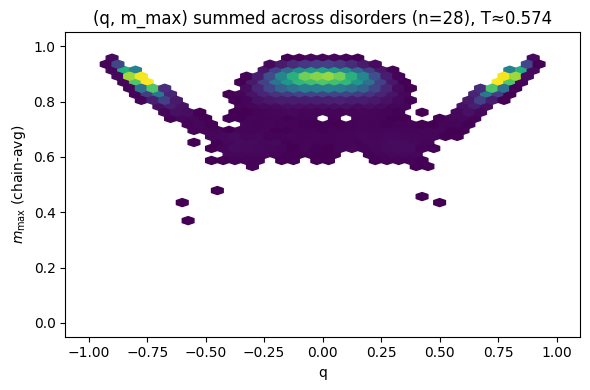

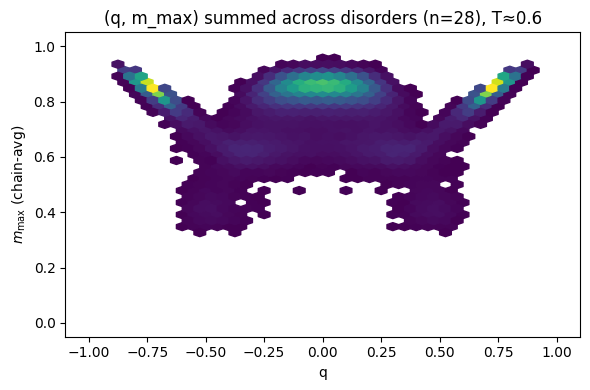

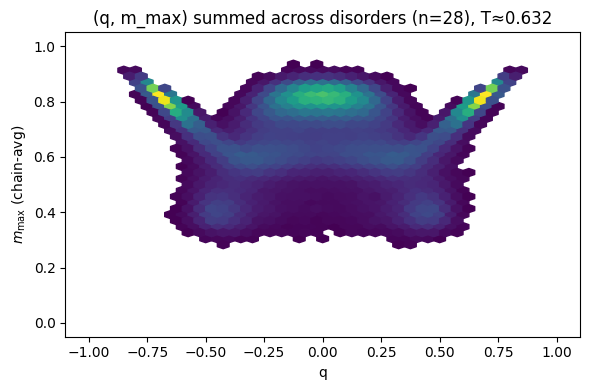

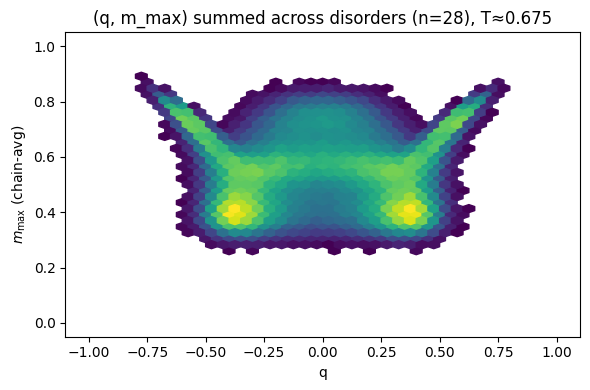

In [8]:
k=0
t_sel=0.5
for k in range(4,12):
    plot_joint_mmax_q_across_disorders_hexbin(
        f, run_root, rids=rids, t_sel=t_sel,
        k=k,
        gridsize=40,
        q_range=(-1,1), m_range=(0,1),
        burn=burn, thin=thin,
        per_rid_max_points=30000,  # equalize disorder weights
        mincnt=1,
    )

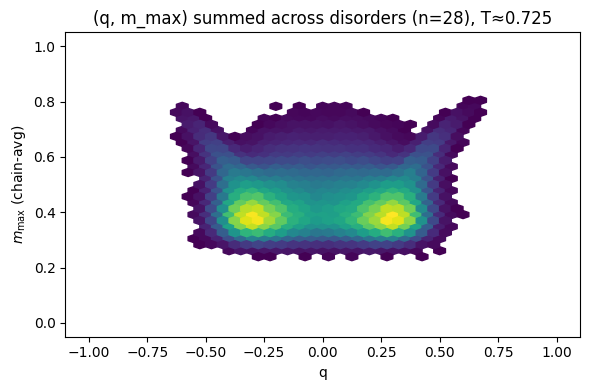

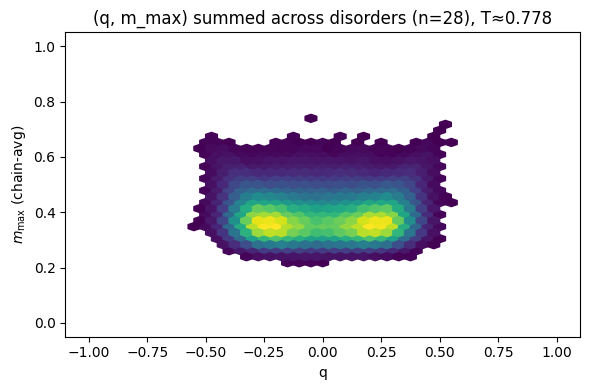

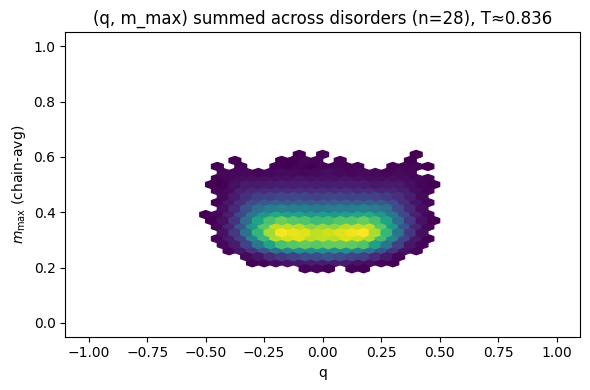

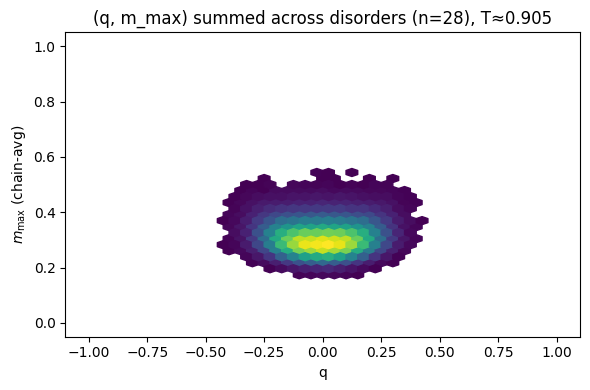

In [9]:
k=0
t_sel=0.5
for k in range(12,16):
    plot_joint_mmax_q_across_disorders_hexbin(
        f, run_root, rids=rids, t_sel=t_sel,
        k=k,
        gridsize=40,
        q_range=(-1,1), m_range=(0,1),
        burn=burn, thin=thin,
        per_rid_max_points=30000,  # equalize disorder weights
        mincnt=1,
    )

<Axes: title={'center': '(E, m_max) across disorders (n=28), T≈0.484'}, xlabel='E (chain-avg)', ylabel='$m_{\\max}$ (chain-avg)'>

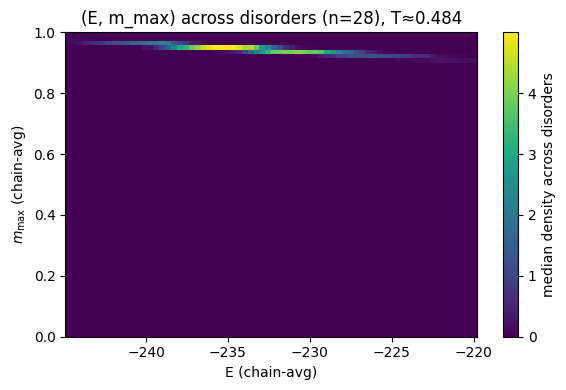

In [20]:

# 6) Joint (E, m_max) at chosen temperature (let it infer E_range or pass E_range=(...,...))
plot_joint_mmax_E_across_disorders(
    f, run_root, rids=rids, t_sel=t_sel, T_target=0.5,
    burn=burn, thin=thin,
    gridsize=70, m_range=(0,1),
    per_rid_max_points=4000,
    # E_range=(-1.2, -0.3),
)
